In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None) 
pd.set_option('display.max_colwidth', None) 

In [3]:
def color_style(value):
    
    if value>0:
        color= 'red'
    elif value==0:
        color='blue'
    else:
        color='green'
    return 'color: %s' % color

In [4]:
def null_prcnt_df(data):
    df= data.copy()
    missing = pd.DataFrame(100*df.isnull().sum()/len(df.index))
    missing.rename(columns={0:'Null_Percentage'}, inplace=True)
    missing = pd.DataFrame(missing.Null_Percentage).sort_values(by='Null_Percentage',ascending=False).style.applymap(color_style)
    return missing

In [5]:
from IPython.display import Markdown, display
def printbold(string):
    return display(Markdown(string))

In [6]:
def other_metrics_logistic_model(confusion):

     TP = confusion[1,1] # true positive 
     TN = confusion[0,0] # true negatives
     FP = confusion[0,1] # false positives
     FN = confusion[1,0] # false negatives

     sensitivity= round((TP) / (TP+FN),4) #sensitivity of our logistic regression model
     specificity= round((TN) / (TN+FP),4) #specificity  of our logistic regression model   
     FPR= round((FP) / (TN+FP),4)        #False Positive Rate - predicting churn when customer does not have churned
     positive_pred_val= round((TP) / (TP+FP),4)  #Positive predictive value
     negative_pred_val= round((TN) / (TN+ FN),4) #Negative predictive value
     misclass_rate = round((FN+FP)/(TP+TN+FP+FN),4)  #Misclassification rate 
    
     metric_list= ['Sensitivity', 'Specificity', 'False Positive Rate','Positive Predictive Value','Negative Predictive Value', 'Misclassification Rate']
     metric_val = [sensitivity, specificity, FPR, positive_pred_val, negative_pred_val, misclass_rate]
     evaluation_metrics_df=pd.DataFrame({'Evaluation Metrics':metric_list, 'Value': metric_val})
     evaluation_metrics_df.set_index('Evaluation Metrics', inplace= True)
     return evaluation_metrics_df
    

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):

    classes=['Not Churned','Churned']
    cmap=plt.cm.Reds
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize= 10)
    plt.xlabel('Predicted label', fontsize=10)


def print_model_metrics(y_test,y_pred,model_name):
    print(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()

In [8]:
import chardet
import os
file_path = os.path.join('telecom_churn_data.csv')
raw_data = open(file_path, 'rb').readline()

encoding = chardet.detect(raw_data)
print("File encoding details:\n", encoding)  

File encoding details:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [9]:
import pandas as pd

telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [10]:
telecom_df_orig = telecom_df.copy()

In [11]:
telecom_df.shape

(99999, 226)

In [12]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [13]:
telecom_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7'

In [14]:
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [15]:

def null_prcnt_df(df):
    
    null_percent = df.isnull().sum() * 100 / len(df)
    
    result = pd.DataFrame({
        'Column': df.columns,
        'Null Percentage': null_percent
    })
    
    return result
    
null_prcnt_df(telecom_df)

Column  Null Percentage
mobile_number                        mobile_number         0.000000
circle_id                                circle_id         0.000000
loc_og_t2o_mou                      loc_og_t2o_mou         1.018010
std_og_t2o_mou                      std_og_t2o_mou         1.018010
loc_ic_t2o_mou                      loc_ic_t2o_mou         1.018010
last_date_of_month_6          last_date_of_month_6         0.000000
last_date_of_month_7          last_date_of_month_7         0.601006
last_date_of_month_8          last_date_of_month_8         1.100011
last_date_of_month_9          last_date_of_month_9         1.659017
arpu_6                                      arpu_6         0.000000
arpu_7                                      arpu_7         0.000000
arpu_8                                      arpu_8         0.000000
arpu_9                                      arpu_9         0.000000
onnet_mou_6                            onnet_mou_6         3.937039
onnet_mou_7                            onnet_mou_7         3.859039
onnet_mou_8                            onnet_mou_8         5.378054
onnet_mou_9                            onnet_mou_9         7.745077
offnet_mou_6                          offnet_mou_6         3.937039
offnet_mou_7                          offnet_mou_7         3.859039
offnet_mou_8                          offnet_mou_8         5.378054
offnet_mou_9                          offnet_mou_9         7.745077
roam_ic_mou_6                        roam_ic_mou_6         3.937039
roam_ic_mou_7                        roam_ic_mou_7         3.859039
roam_ic_mou_8                        roam_ic_mou_8         5.378054
roam_ic_mou_9                        roam_ic_mou_9         7.745077
roam_og_mou_6                        roam_og_mou_6         3.937039
roam_og_mou_7                        roam_og_mou_7         3.859039
roam_og_mou_8                        roam_og_mou_8         5.378054
roam_og_mou_9                        roam_og_mou_9         7.745077
loc_og_t2t_mou_6                  loc_og_t2t_mou_6         3.937039
loc_og_t2t_mou_7                  loc_og_t2t_mou_7         3.859039
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         5.378054
loc_og_t2t_mou_9                  loc_og_t2t_mou_9         7.745077
loc_og_t2m_mou_6                  loc_og_t2m_mou_6         3.937039
loc_og_t2m_mou_7                  loc_og_t2m_mou_7         3.859039
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         5.378054
loc_og_t2m_mou_9                  loc_og_t2m_mou_9         7.745077
loc_og_t2f_mou_6                  loc_og_t2f_mou_6         3.937039
loc_og_t2f_mou_7                  loc_og_t2f_mou_7         3.859039
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         5.378054
loc_og_t2f_mou_9                  loc_og_t2f_mou_9         7.745077
loc_og_t2c_mou_6                  loc_og_t2c_mou_6         3.937039
loc_og_t2c_mou_7                  loc_og_t2c_mou_7         3.859039
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         5.378054
loc_og_t2c_mou_9                  loc_og_t2c_mou_9         7.745077
loc_og_mou_6                          loc_og_mou_6         3.937039
loc_og_mou_7                          loc_og_mou_7         3.859039
loc_og_mou_8                          loc_og_mou_8         5.378054
loc_og_mou_9                          loc_og_mou_9         7.745077
std_og_t2t_mou_6                  std_og_t2t_mou_6         3.937039
std_og_t2t_mou_7                  std_og_t2t_mou_7         3.859039
std_og_t2t_mou_8                  std_og_t2t_mou_8         5.378054
std_og_t2t_mou_9                  std_og_t2t_mou_9         7.745077
std_og_t2m_mou_6                  std_og_t2m_mou_6         3.937039
std_og_t2m_mou_7                  std_og_t2m_mou_7         3.859039
std_og_t2m_mou_8                  std_og_t2m_mou_8         5.378054
std_og_t2m_mou_9                  std_og_t2m_mou_9         7.745077
std_og_t2f_mou_6                  std_og_t2f_mou_6         3.937039
std_og_t2f_mou_7                

In [16]:
telecom_df = telecom_df.rename(columns= lambda x: x.strip(), inplace=False)

In [17]:
telecom_df = telecom_df.drop_duplicates()

In [18]:
last_day_rech_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

['last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9']

In [19]:
telecom_df = telecom_df.rename(columns= {'last_day_rch_amt_6':'last_day_rech_amt_6', 'last_day_rch_amt_7':'last_day_rech_amt_7',\
                                     'last_day_rch_amt_8':'last_day_rech_amt_8', 'last_day_rch_amt_9':'last_day_rech_amt_9'})
correct_last_day_rech_amt_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day')])
correct_last_day_rech_amt_cols

['last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8',
 'last_day_rech_amt_9']

In [20]:
rech_amt_data_cols = telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rech_amt_6',
       'last_day_rech_amt_7', 'last_day_rech_amt_8', 'last_day_rech_amt_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [21]:
rech_amt_data_df = telecom_df[rech_amt_data_cols]
null_prcnt_df(rech_amt_data_df)

Column  Null Percentage
total_rech_amt_6                  total_rech_amt_6         0.000000
total_rech_amt_7                  total_rech_amt_7         0.000000
total_rech_amt_8                  total_rech_amt_8         0.000000
total_rech_amt_9                  total_rech_amt_9         0.000000
max_rech_amt_6                      max_rech_amt_6         0.000000
max_rech_amt_7                      max_rech_amt_7         0.000000
max_rech_amt_8                      max_rech_amt_8         0.000000
max_rech_amt_9                      max_rech_amt_9         0.000000
last_day_rech_amt_6            last_day_rech_amt_6         0.000000
last_day_rech_amt_7            last_day_rech_amt_7         0.000000
last_day_rech_amt_8            last_day_rech_amt_8         0.000000
last_day_rech_amt_9            last_day_rech_amt_9         0.000000
date_of_last_rech_data_6  date_of_last_rech_data_6        74.846748
date_of_last_rech_data_7  date_of_last_rech_data_7        74.428744
date_of_last_rech_data_8  date_of_last_rech_data_8        73.660737
date_of_last_rech_data_9  date_of_last_rech_data_9        74.077741
total_rech_data_6                total_rech_data_6        74.846748
total_rech_data_7                total_rech_data_7        74.428744
total_rech_data_8                total_rech_data_8        73.660737
total_rech_data_9                total_rech_data_9        74.077741
max_rech_data_6                    max_rech_data_6        74.846748
max_rech_data_7                    max_rech_data_7        74.428744
max_rech_data_8                    max_rech_data_8        73.660737
max_rech_data_9                    max_rech_data_9        74.077741
av_rech_amt_data_6              av_rech_amt_data_6        74.846748
av_rech_amt_data_7              av_rech_amt_data_7        74.428744
av_rech_amt_data_8              av_rech_amt_data_8        73.660737
av_rech_amt_data_9              av_rech_amt_data_9        74.077741

In [22]:
rech_amt_data_df.describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       last_day_rech_amt_6  last_day_rech_amt_7  last_day_rech_amt_8  \
count         99999.000000         99999.000000         99999.000000   
mean             63.156252            59.385804            62.641716   
std              97.356649            95.915385           104.431816   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%              30.000000            30.000000            30.000000   
75%             110.000000           110.000000           130.000000   
max            4010.000000          4010.000000          4449.000000   

       last_day_rech_amt_9  total_rech_data_6  total_rech_data_7  \
count         99999.000000       25153.000000       25571.000000   
mean             43.901249           2.463802           2.666419   
std              90.809712           2.789128           3.031593   
min               0.000000           1.000000           1.000000   
25%               0.000000           1.000000           1.000000   
50%               0.000000           1.000000           1.000000   
75%              50.000000           3.000000           3.000000   
max            3399.000000          61.000000          54.000000   

       total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  \
count       26339.000000       25922.000000     25153.000000     25571.000000   
mean            2.651999           2.441170       126.393392       126.729459   
std             3.074987           2.516339       108.477235       109.765267   
min             1.000000           1.000000         1.000000         1.000000   
25%             1.000000           1.000000        25.000000        25.000000   
50%             1.000000           2.000000       145.000000       145.000000   
75%             3.000000           3.000000       177.000000       177.000000   
max            60.000000          84.000000      1555.000000      1555.000000   

       max_rech_data_8  max_rech_data_9  av_rech_amt_data_6  \
count     26339.000000      25922.00000        25153.000000   
mean        125.717301        124.94144          192.600982   
std         109.437851        111.36376          192.646318   
min           1.000000          1.00000            1.000000   
25%          25.000000         25.00000           82.000000   
50%         145.000000        145.00000          154.000000   
75%         179.000000        179.00000          252.000000   
max        1555.000000       1555.00000         7546.000000   

       av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_

In [23]:
telecom_df['av_rech_amt_data_6']= telecom_df['av_rech_amt_data_6'].fillna(0)
telecom_df['av_rech_amt_data_7']= telecom_df['av_rech_amt_data_7'].fillna(0)
telecom_df['av_rech_amt_data_8']= telecom_df['av_rech_amt_data_8'].fillna(0)
telecom_df['av_rech_amt_data_9']= telecom_df['av_rech_amt_data_9'].fillna(0)

telecom_df['total_rech_data_6']= telecom_df['total_rech_data_6'].fillna(0)
telecom_df['total_rech_data_7']= telecom_df['total_rech_data_7'].fillna(0)
telecom_df['total_rech_data_8']= telecom_df['total_rech_data_8'].fillna(0)
telecom_df['total_rech_data_9']= telecom_df['total_rech_data_9'].fillna(0)


In [24]:
telecom_df['total_rech_data_amt_6'] = (telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']) 
telecom_df['total_rech_data_amt_7'] = (telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']) 
telecom_df['total_rech_data_amt_8'] = (telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']) 
telecom_df['total_rech_data_amt_9'] = (telecom_df['av_rech_amt_data_9'] * telecom_df['total_rech_data_9'])

In [25]:
telecom_df['avg_total_rech_plus_data_amt_6_7'] = (telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_amt_6']+
                                                  telecom_df['total_rech_data_amt_7'] + telecom_df['total_rech_amt_7'])/2

In [26]:
avg_total_rech_plus_data_amt_6_7_70per =  telecom_df['avg_total_rech_plus_data_amt_6_7'].quantile(0.7)
avg_total_rech_plus_data_amt_6_7_70per

np.float64(478.0)

In [27]:
telecom_hv = telecom_df.loc[(telecom_df.avg_total_rech_plus_data_amt_6_7 > avg_total_rech_plus_data_amt_6_7_70per)]
telecom_hv.shape

(29953, 231)

In [28]:
churn_phase_cols = ['total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

churn_phase_cols_df = telecom_df[churn_phase_cols]
null_prcnt_df(churn_phase_cols_df)

Column  Null Percentage
total_og_mou_9  total_og_mou_9              0.0
total_ic_mou_9  total_ic_mou_9              0.0
vol_2g_mb_9        vol_2g_mb_9              0.0
vol_3g_mb_9        vol_3g_mb_9              0.0

In [29]:
import numpy as np  # Add this import statement at the beginning

telecom_hv['total_usage_col_9'] = (telecom_hv['total_og_mou_9'] + telecom_hv['total_ic_mou_9'] + 
                                   telecom_hv['vol_2g_mb_9'] + telecom_hv['vol_3g_mb_9'])

##Tagging churners based on 'total_usage_col_9' 
telecom_hv['churn'] = np.where(telecom_hv['total_usage_col_9']== 0, 1, 0)  
#(A value in 'total_usage_col_9' column indicates presence of calling and/or internet in 9th month; if absent i.e. total=0 implies churn i.e. 1)

print("Tagging churners [No. of Records]\n(churn=1, else 0):")
telecom_hv['churn'].value_counts()

Tagging churners [No. of Records]
(churn=1, else 0):


churn
0    27520
1     2433
Name: count, dtype: int64

In [30]:
print("\nTagging churners (% of total)\n(churn=1, else 0):")
round(100*telecom_hv['churn'].value_counts()/len(telecom_hv.index),3)


Tagging churners (% of total)
(churn=1, else 0):


churn
0    91.877
1     8.123
Name: count, dtype: float64

In [31]:
churn_rate = round(100*telecom_hv['churn'].sum()/len(telecom_hv.index),3)
print('Churn Rate(%):',churn_rate)
print("High-Valued Customers Dataset shape: ",telecom_hv.shape)

Churn Rate(%): 8.123
High-Valued Customers Dataset shape:  (29953, 233)


In [32]:
attributes_9 = list(telecom_hv.columns[telecom_hv.columns.str.contains('_9')])

##Also considering 'sep_vbc_3g' as this column also belongs to the churn phase (month 9: September)
attributes_9.append('sep_vbc_3g')

##Dropping churn phase (month 9) columns (except churn column)
telecom_hv.drop(attributes_9, axis=1, inplace=True)

telecom_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

In [33]:
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    print('Columns that are dropped are:\n{0}'.format(list_uniq_svcol))
    print('\nNumber of columns dropped:\n{0}'.format(len(list_uniq_svcol)))
    return df_newsingle

telecom_hv= remove_single_val_uniq_col(telecom_hv)

Columns that are dropped are:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Number of columns dropped:
13


In [34]:
date_columns_list= list(telecom_hv.columns[telecom_hv.columns.str.contains('date')])
date_columns_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [35]:
telecom_hv.drop(date_columns_list, axis=1, inplace=True)
telecom_hv.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [36]:
telecom_hv.shape

(29953, 157)

In [37]:
##Unique count dataframe
import pandas as pd
import numpy as np

def hv_categorical_cols_unique(data):
    df = data.copy()
    
    unique_count = []
    unique_val = []
    col_list = []
    data_type = []
    
    for col in df.columns:
        if len(df[col].unique()) < 20:  ##Set a threshold to check for the distinct values of potential categorical datatype columns
            col_list.append(col)
            data_type.append(df[col].dtype)
            unique_count.append(len(df[col].unique()))
            unique_val.append(list(df[col].unique()))  # Convert to list instead of numpy array
    
    # Create DataFrame without using numpy arrays
    unique_df = pd.DataFrame({
        'Features': col_list,
        'Data Type': data_type,
        'Unique Count': unique_count,
        'Unique Values': unique_val  # This will now be stored as Python objects, not numpy arrays
    })
    
    unique_df.set_index('Features', inplace=True)
    sorted_df = unique_df.sort_values(by='Unique Count', ascending=True)
    return sorted_df


print("**Checking for potential categorical datatype columns:**")  

hv_categorical_cols_unique(data=telecom_hv)

**Checking for potential categorical datatype columns:**


Data Type  Unique Count  \
Features                                   
churn                int64             2   
night_pck_user_6   float64             3   
night_pck_user_7   float64             3   
night_pck_user_8   float64             3   
fb_user_6          float64             3   
fb_user_7          float64             3   
fb_user_8          float64             3   
monthly_2g_6         int64             5   
monthly_2g_7         int64             6   
monthly_2g_8         int64             6   
monthly_3g_6         int64            12   
monthly_3g_8         int64            12   
monthly_3g_7         int64            15   

                                                       Unique Values  
Features                                                              
churn                                                         [1, 0]  
night_pck_user_6                                     [0.0, nan, 1.0]  
night_pck_user_7                                     [0.0, nan, 1.0]  
night_pck_user_8                                     [0.0, nan, 1.0]  
fb_user_6                                            [1.0, nan, 0.0]  
fb_user_7                                            [1.0, nan, 0.0]  
fb_user_8                                            [1.0, nan, 0.0]  
monthly_2g_6                                         [0, 2, 1, 3, 4]  
monthly_2g_7                                      [0, 1, 2, 5, 4, 3]  
monthly_2g_8                                      [0, 1, 2, 5, 3, 4]  
monthly_3g_6                  [1, 0, 4, 2, 3, 5, 7, 6, 9, 8, 11, 14]  
monthly_3g_8                  [1, 0, 2, 7, 3, 4, 6, 5, 8, 10, 9, 16]  
monthly_3g_7      [1, 0, 2, 5, 3, 8, 4, 7, 6, 9, 11, 12, 14, 10, 16]

In [38]:
telecom_hv.describe(percentiles= [0,0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.995300e+04  29953.000000  29953.000000  29953.000000  29411.000000   
mean    7.001206e+09    558.820058    561.160547    508.890301    265.708886   
std     6.908102e+05    460.868223    480.028497    502.136278    462.692744   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
0%      7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.272400      0.726000      0.000000      0.000000   
10%     7.000251e+09    171.795000    177.973000     84.302800      1.650000   
25%     7.000609e+09    310.142000    310.071000    231.615000     19.250000   
50%     7.001203e+09    482.354000    481.496000    427.604000     88.140000   
75%     7.001804e+09    700.240000    698.829000    661.753000    297.490000   
90%     7.002165e+09    994.408600    996.170600    977.546400    765.090000   
95%     7.002285e+09   1241.649400   1261.885600   1255.086400   1145.670000   
99%     7.002386e+09   1985.394360   1999.521120   1986.739600   2164.130000   
99.9%   7.002408e+09   3888.323616   4116.035304   3978.343672   4146.482100   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29417.000000  28781.000000  29411.000000  29417.000000  28781.000000   
mean     272.935850    243.888097    380.688975    385.124799    348.769656   
std      483.282132    465.505577    484.441095    501.024091    486.836956   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.406000      0.650000     16.610000     15.578000      9.030000   
25%       18.180000     14.280000     78.550000     76.180000     58.760000   
50%       86.890000     72.990000    229.630000    227.130000    197.690000   
75%      298.380000    255.310000    494.755000    500.480000    455.440000   
90%      795.266000    686.940000    907.460000    924.888000    843.760000   
95%     1199.146000   1099.440000   1266.600000   1284.544000   1186.980000   
99%     2217.410800   2189.418000   2342.745000   2434.321200   2225.636000   
99.9%   4394.056800   4254.583600   4179.641400   4562.020240   4485.747000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29411.000000   29417.000000   28781.000000   29411.000000   
mean       16.421142      12.876567      13.021785      27.086158   
std        77.012820      76.501945      75.630647     117.284108   
min         0.000000       0.000000       0.000000       0.000000   
0%          0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        28.590000      14.780000      16.530000      52.130000   
95%        86.960000      56.844000      59.490000     148.425000   
99%       347.830000     286.161200     288.310000     536.398000   
99.9%     941.352100    1044.285840     928.755000    1460.447600   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29417.000000   28781.000000      29411.000000      29417.000000   
mean       20.522376      20.699213         86.132694         87.325499   
std        96.967183     106.833757        230.772468        242.604091   
min         0.000000       0.000000          0.000000   

In [39]:
def plot_boxplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()
    
    plt.subplot(1,3,1)
    ax_11= sns.boxplot(data=df, y=feature+"_6", x="churn", hue="churn", showfliers= False, palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    
    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,2)
    ax_22= sns.boxplot(data=df, y=feature+"_7",x="churn",hue="churn", showfliers= False, palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    
    plt.subplot(1,3,3)
    ax_33= sns.boxplot(data=df, y=feature+"_8",x="churn",hue="churn", showfliers= False, palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

In [40]:
rech_amt_cols = telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt')]  ##For 6, 7 and 8 months
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')

In [41]:
rech_amt_df = telecom_hv[rech_amt_cols]
null_prcnt_df(rech_amt_df)

Column  Null Percentage
total_rech_amt_6            total_rech_amt_6              0.0
total_rech_amt_7            total_rech_amt_7              0.0
total_rech_amt_8            total_rech_amt_8              0.0
max_rech_amt_6                max_rech_amt_6              0.0
max_rech_amt_7                max_rech_amt_7              0.0
max_rech_amt_8                max_rech_amt_8              0.0
last_day_rech_amt_6      last_day_rech_amt_6              0.0
last_day_rech_amt_7      last_day_rech_amt_7              0.0
last_day_rech_amt_8      last_day_rech_amt_8              0.0
av_rech_amt_data_6        av_rech_amt_data_6              0.0
av_rech_amt_data_7        av_rech_amt_data_7              0.0
av_rech_amt_data_8        av_rech_amt_data_8              0.0
total_rech_data_amt_6  total_rech_data_amt_6              0.0
total_rech_data_amt_7  total_rech_data_amt_7              0.0
total_rech_data_amt_8  total_rech_data_amt_8              0.0

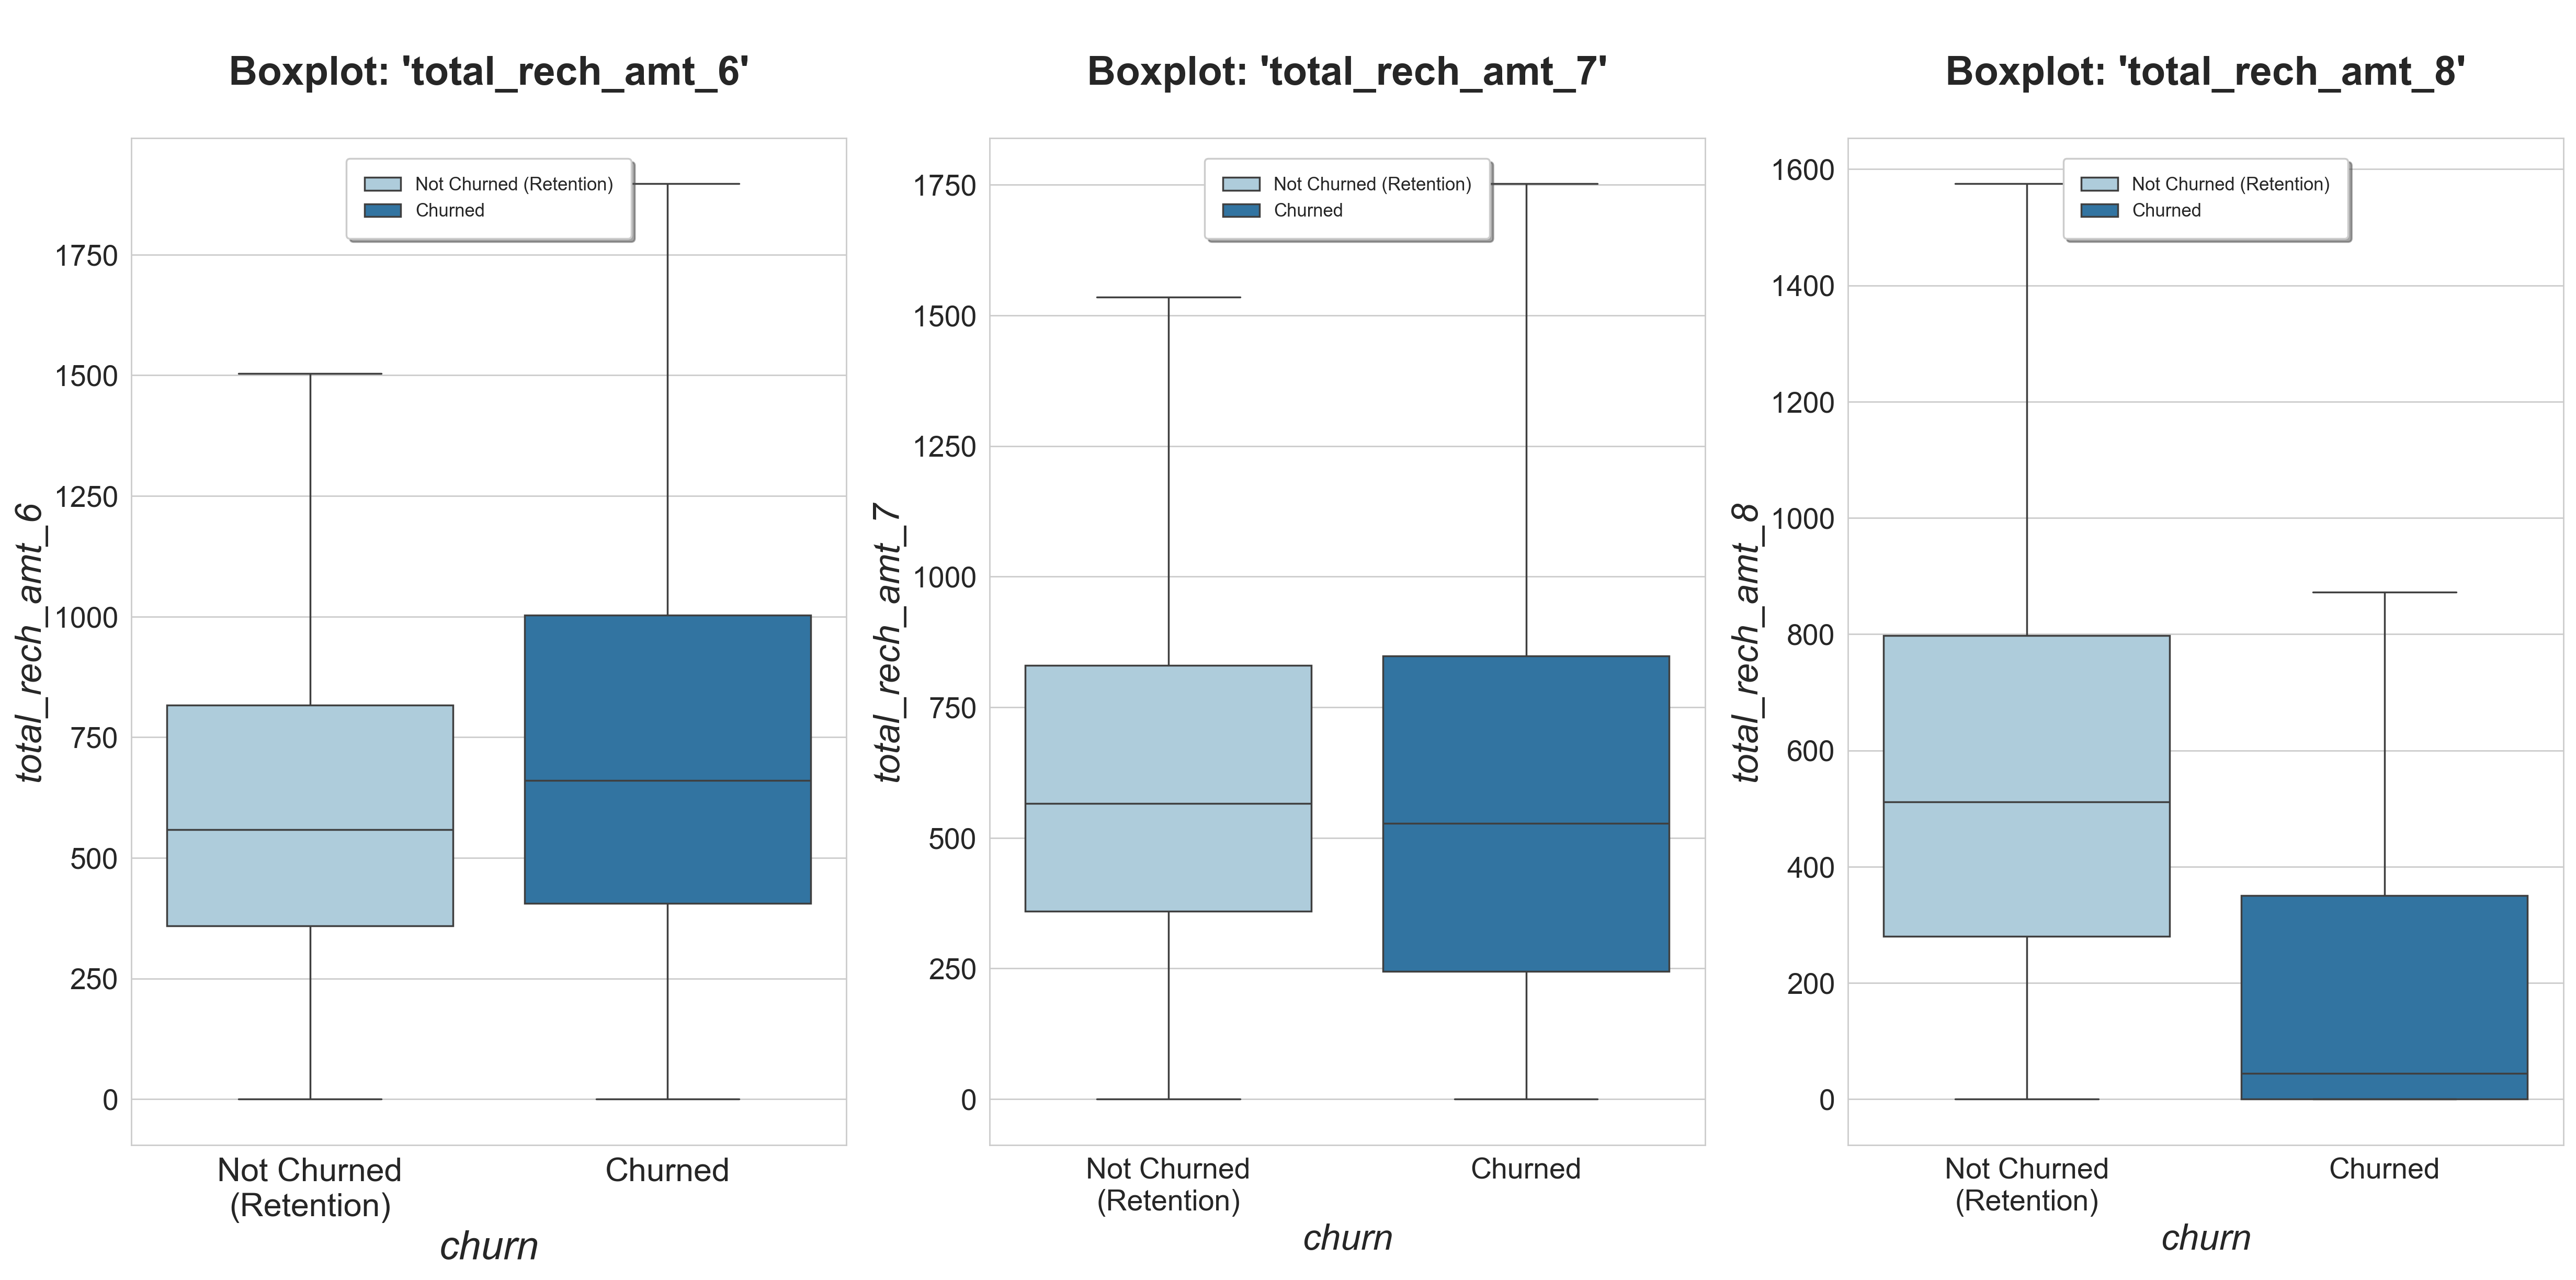

In [42]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Import seaborn as sns
import seaborn as sns

# Now you can use the function with plt and sns available
plot_boxplots_6_7_8('total_rech_amt')

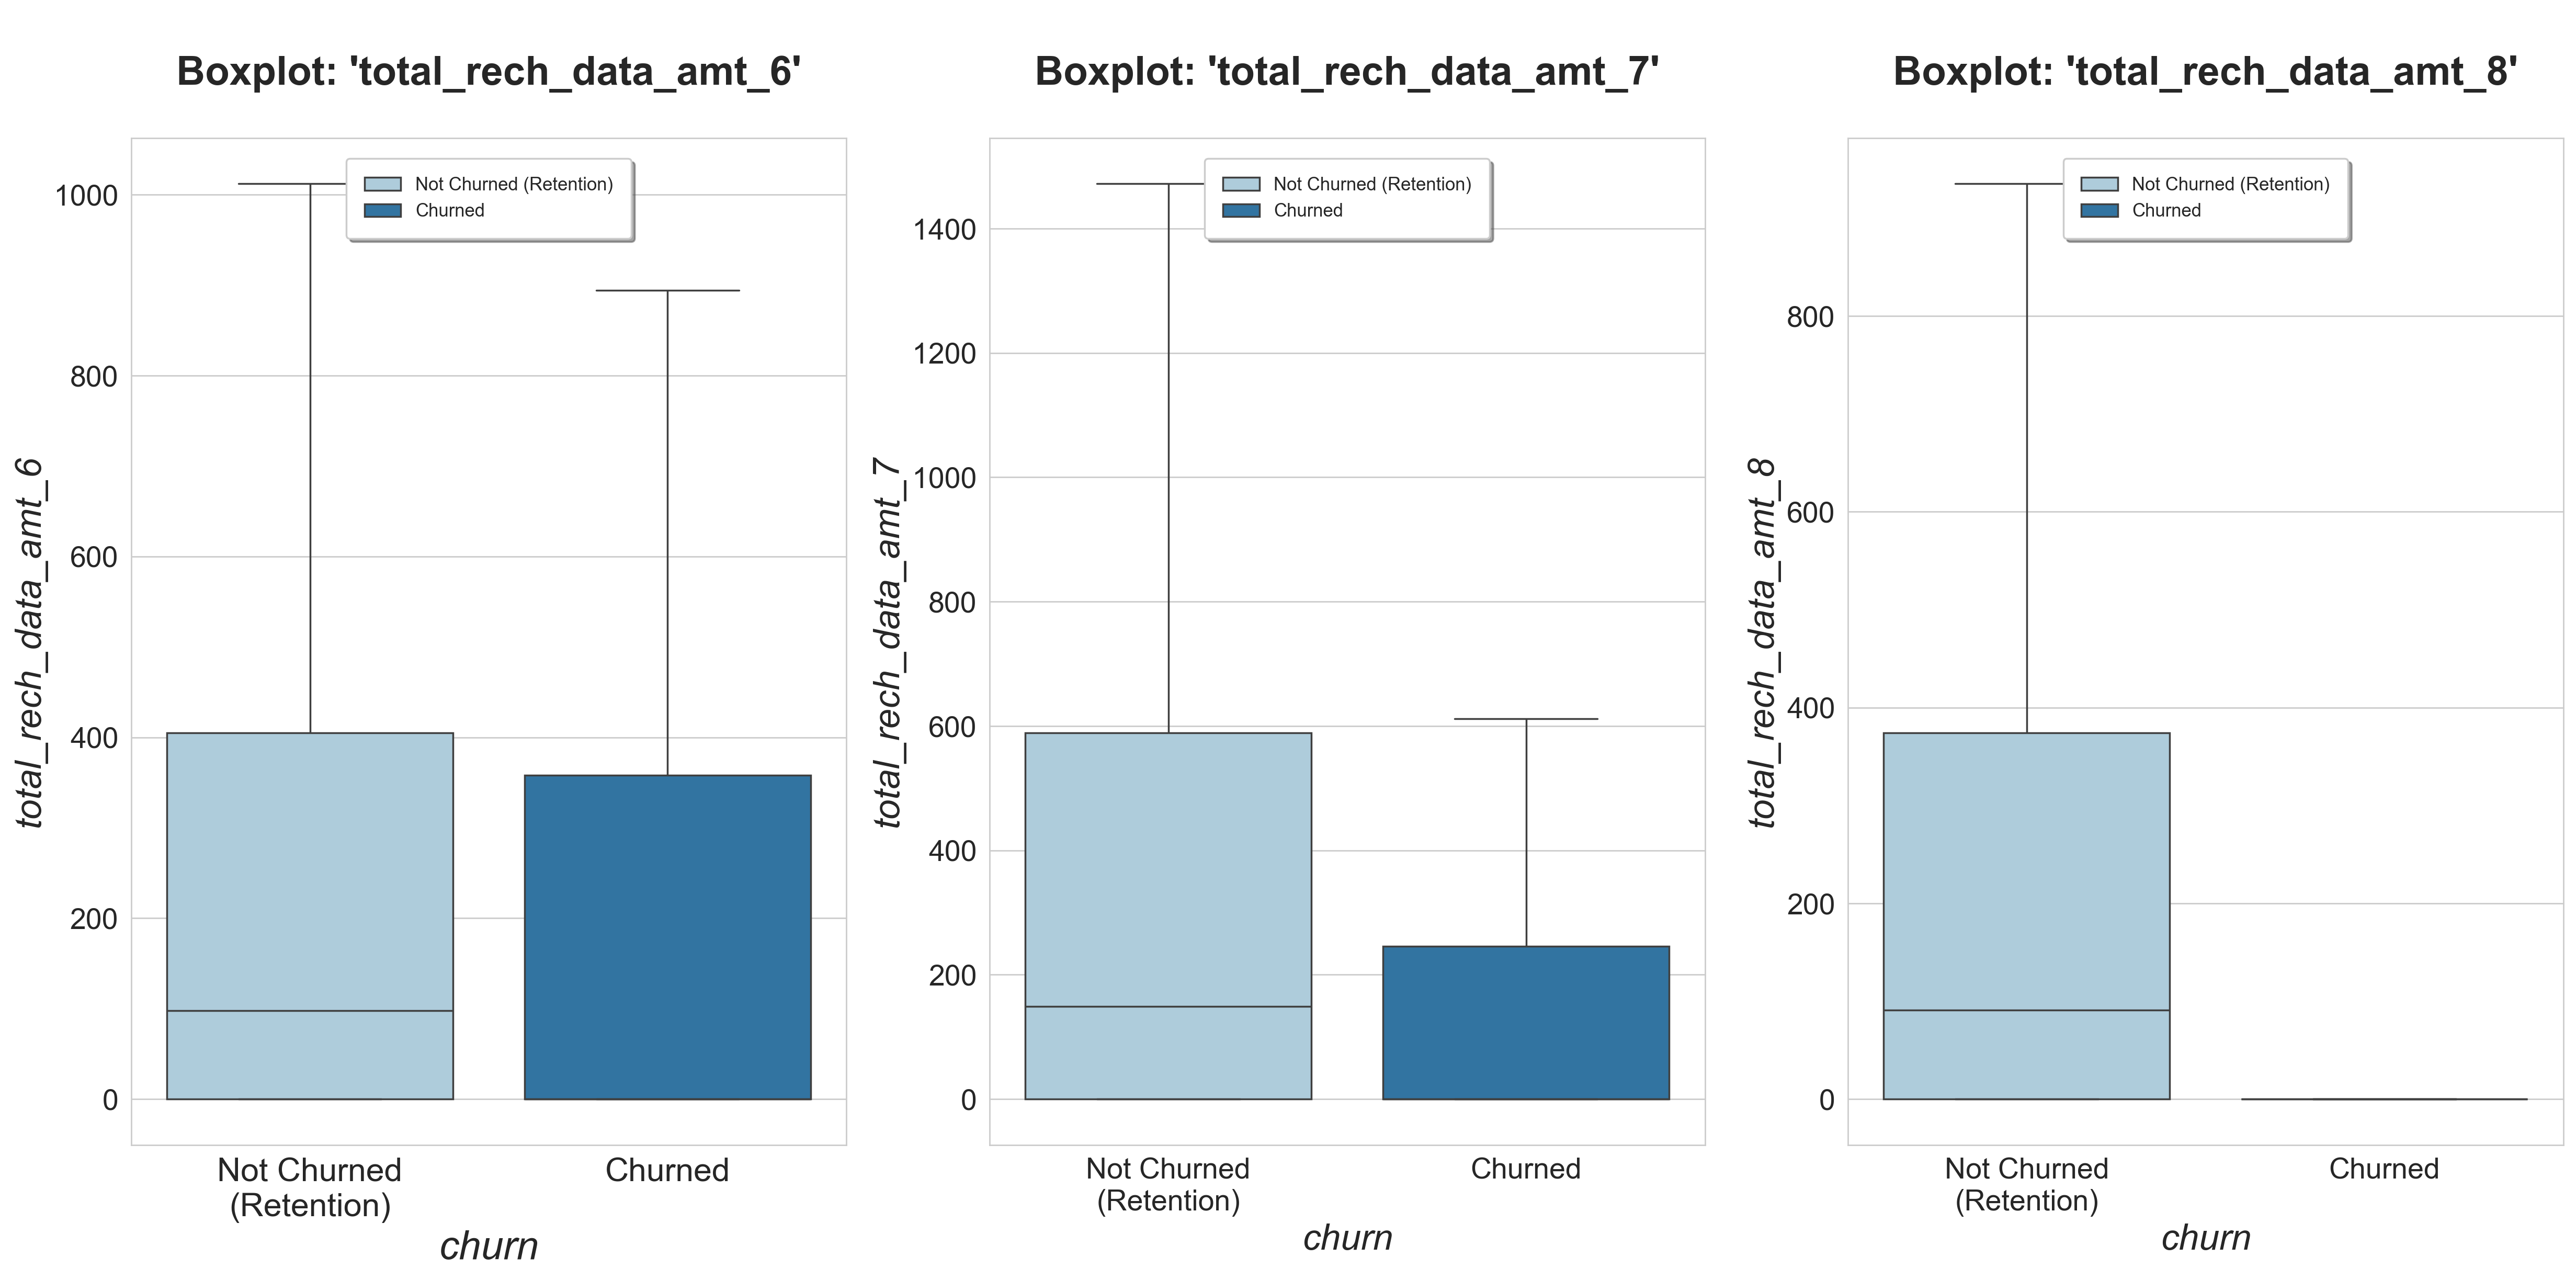

In [43]:
plot_boxplots_6_7_8('total_rech_data_amt')

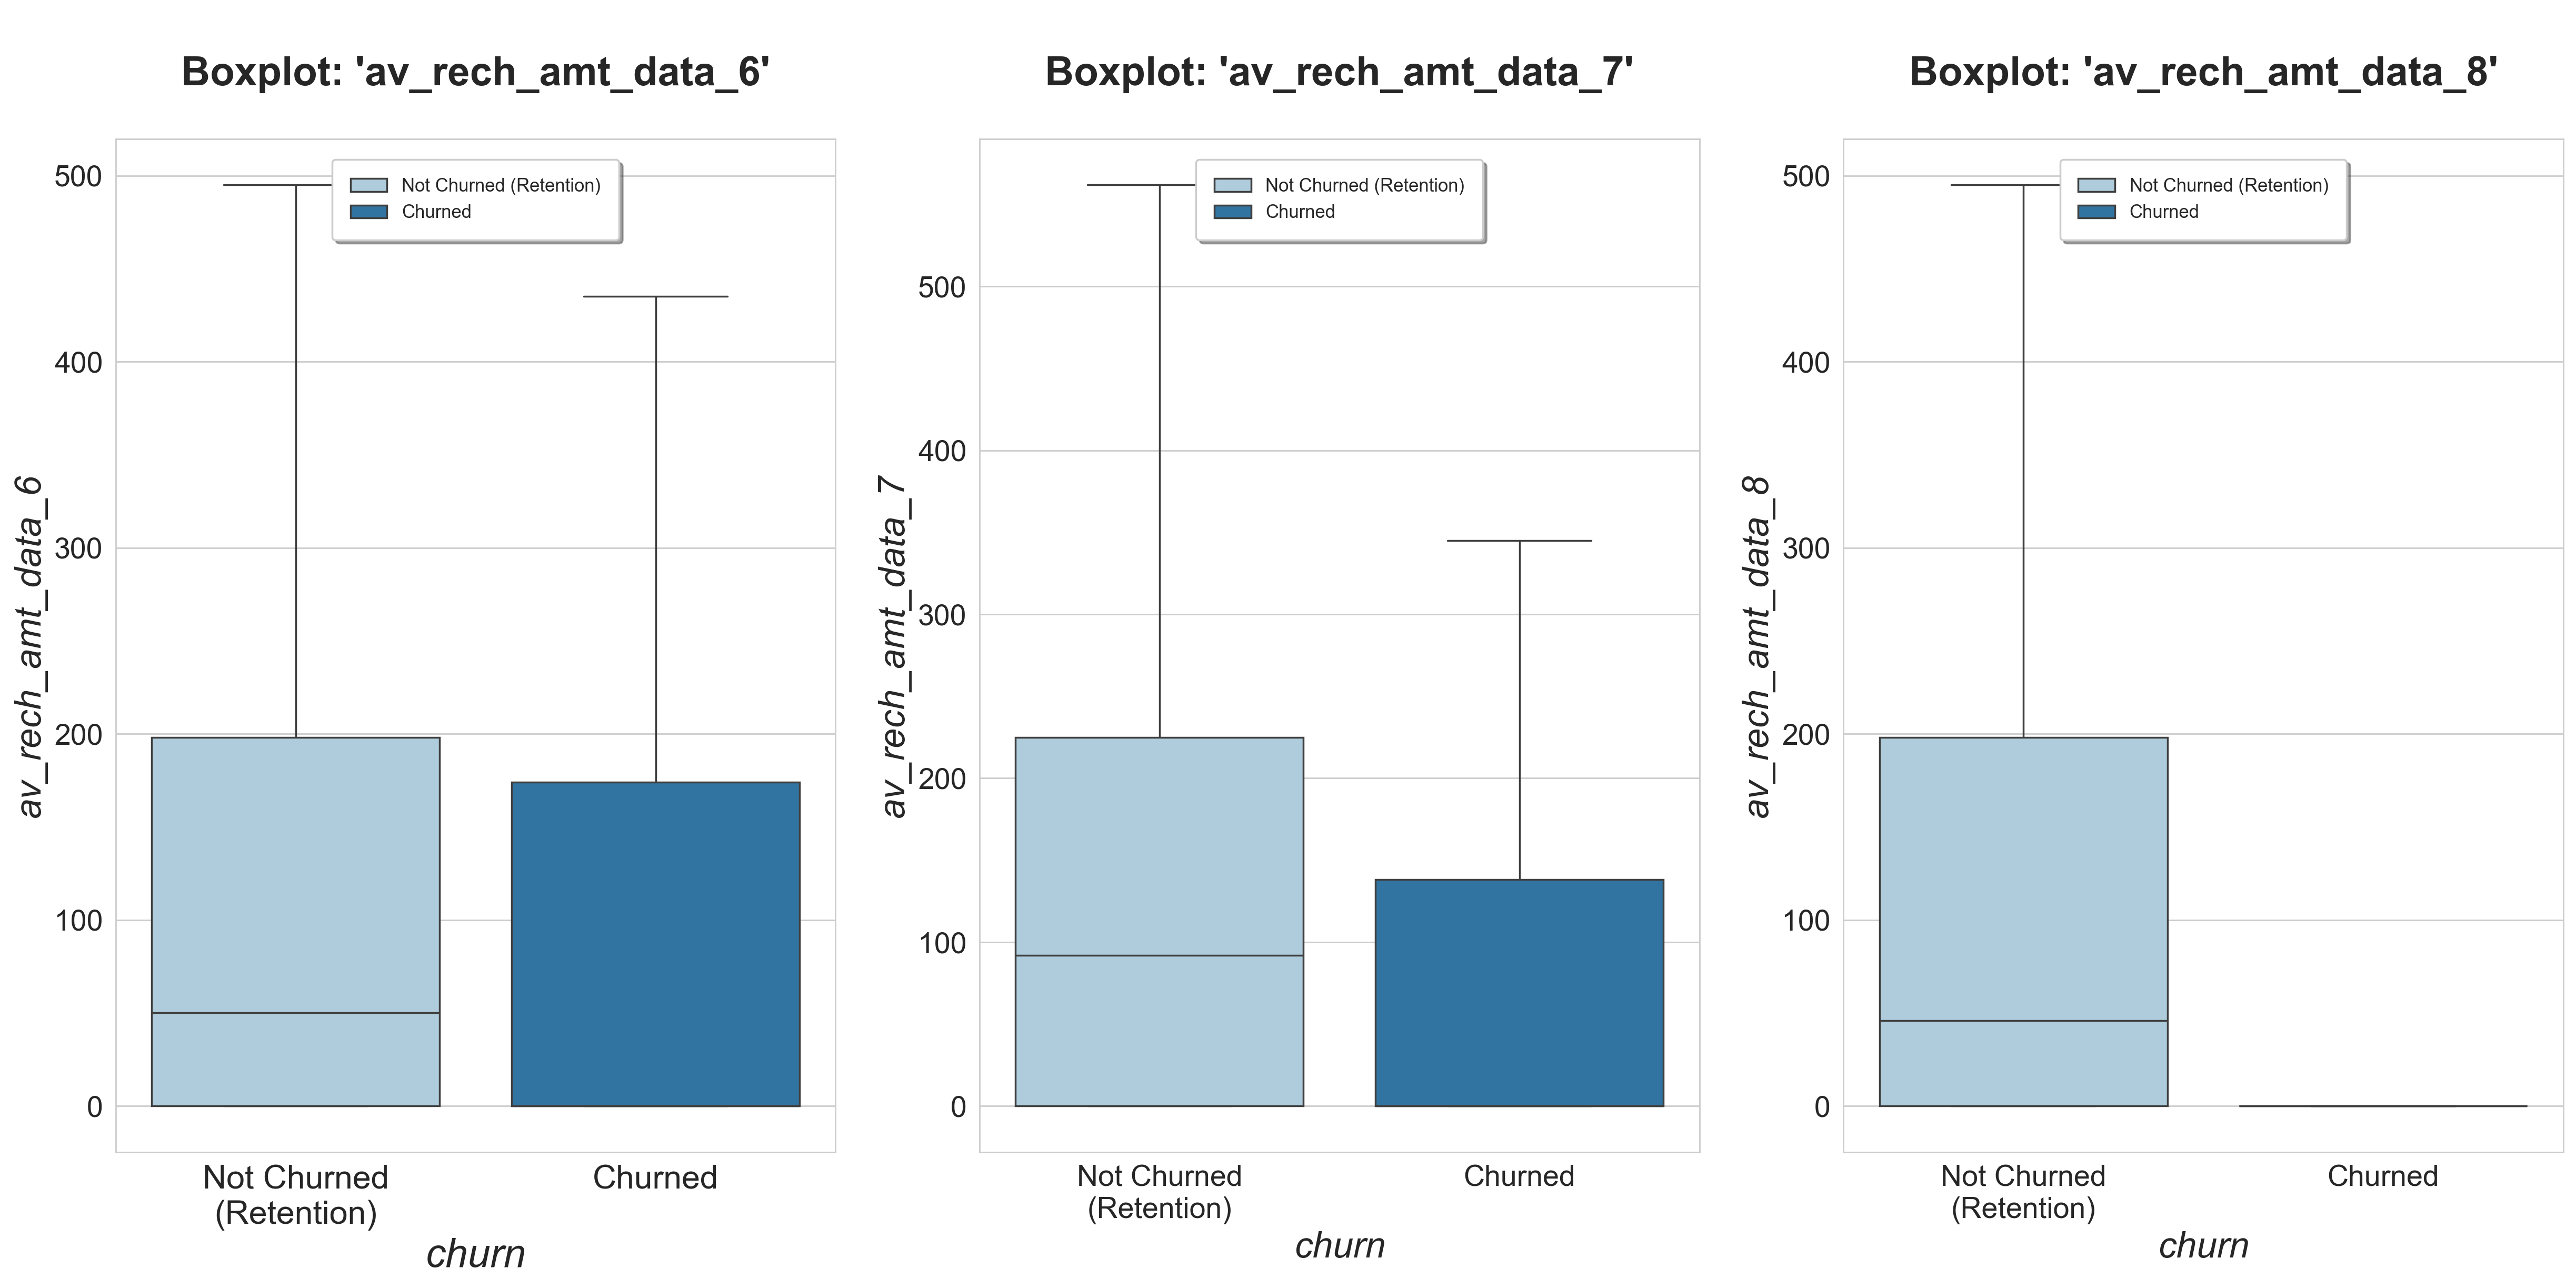

In [44]:
plot_boxplots_6_7_8('av_rech_amt_data')

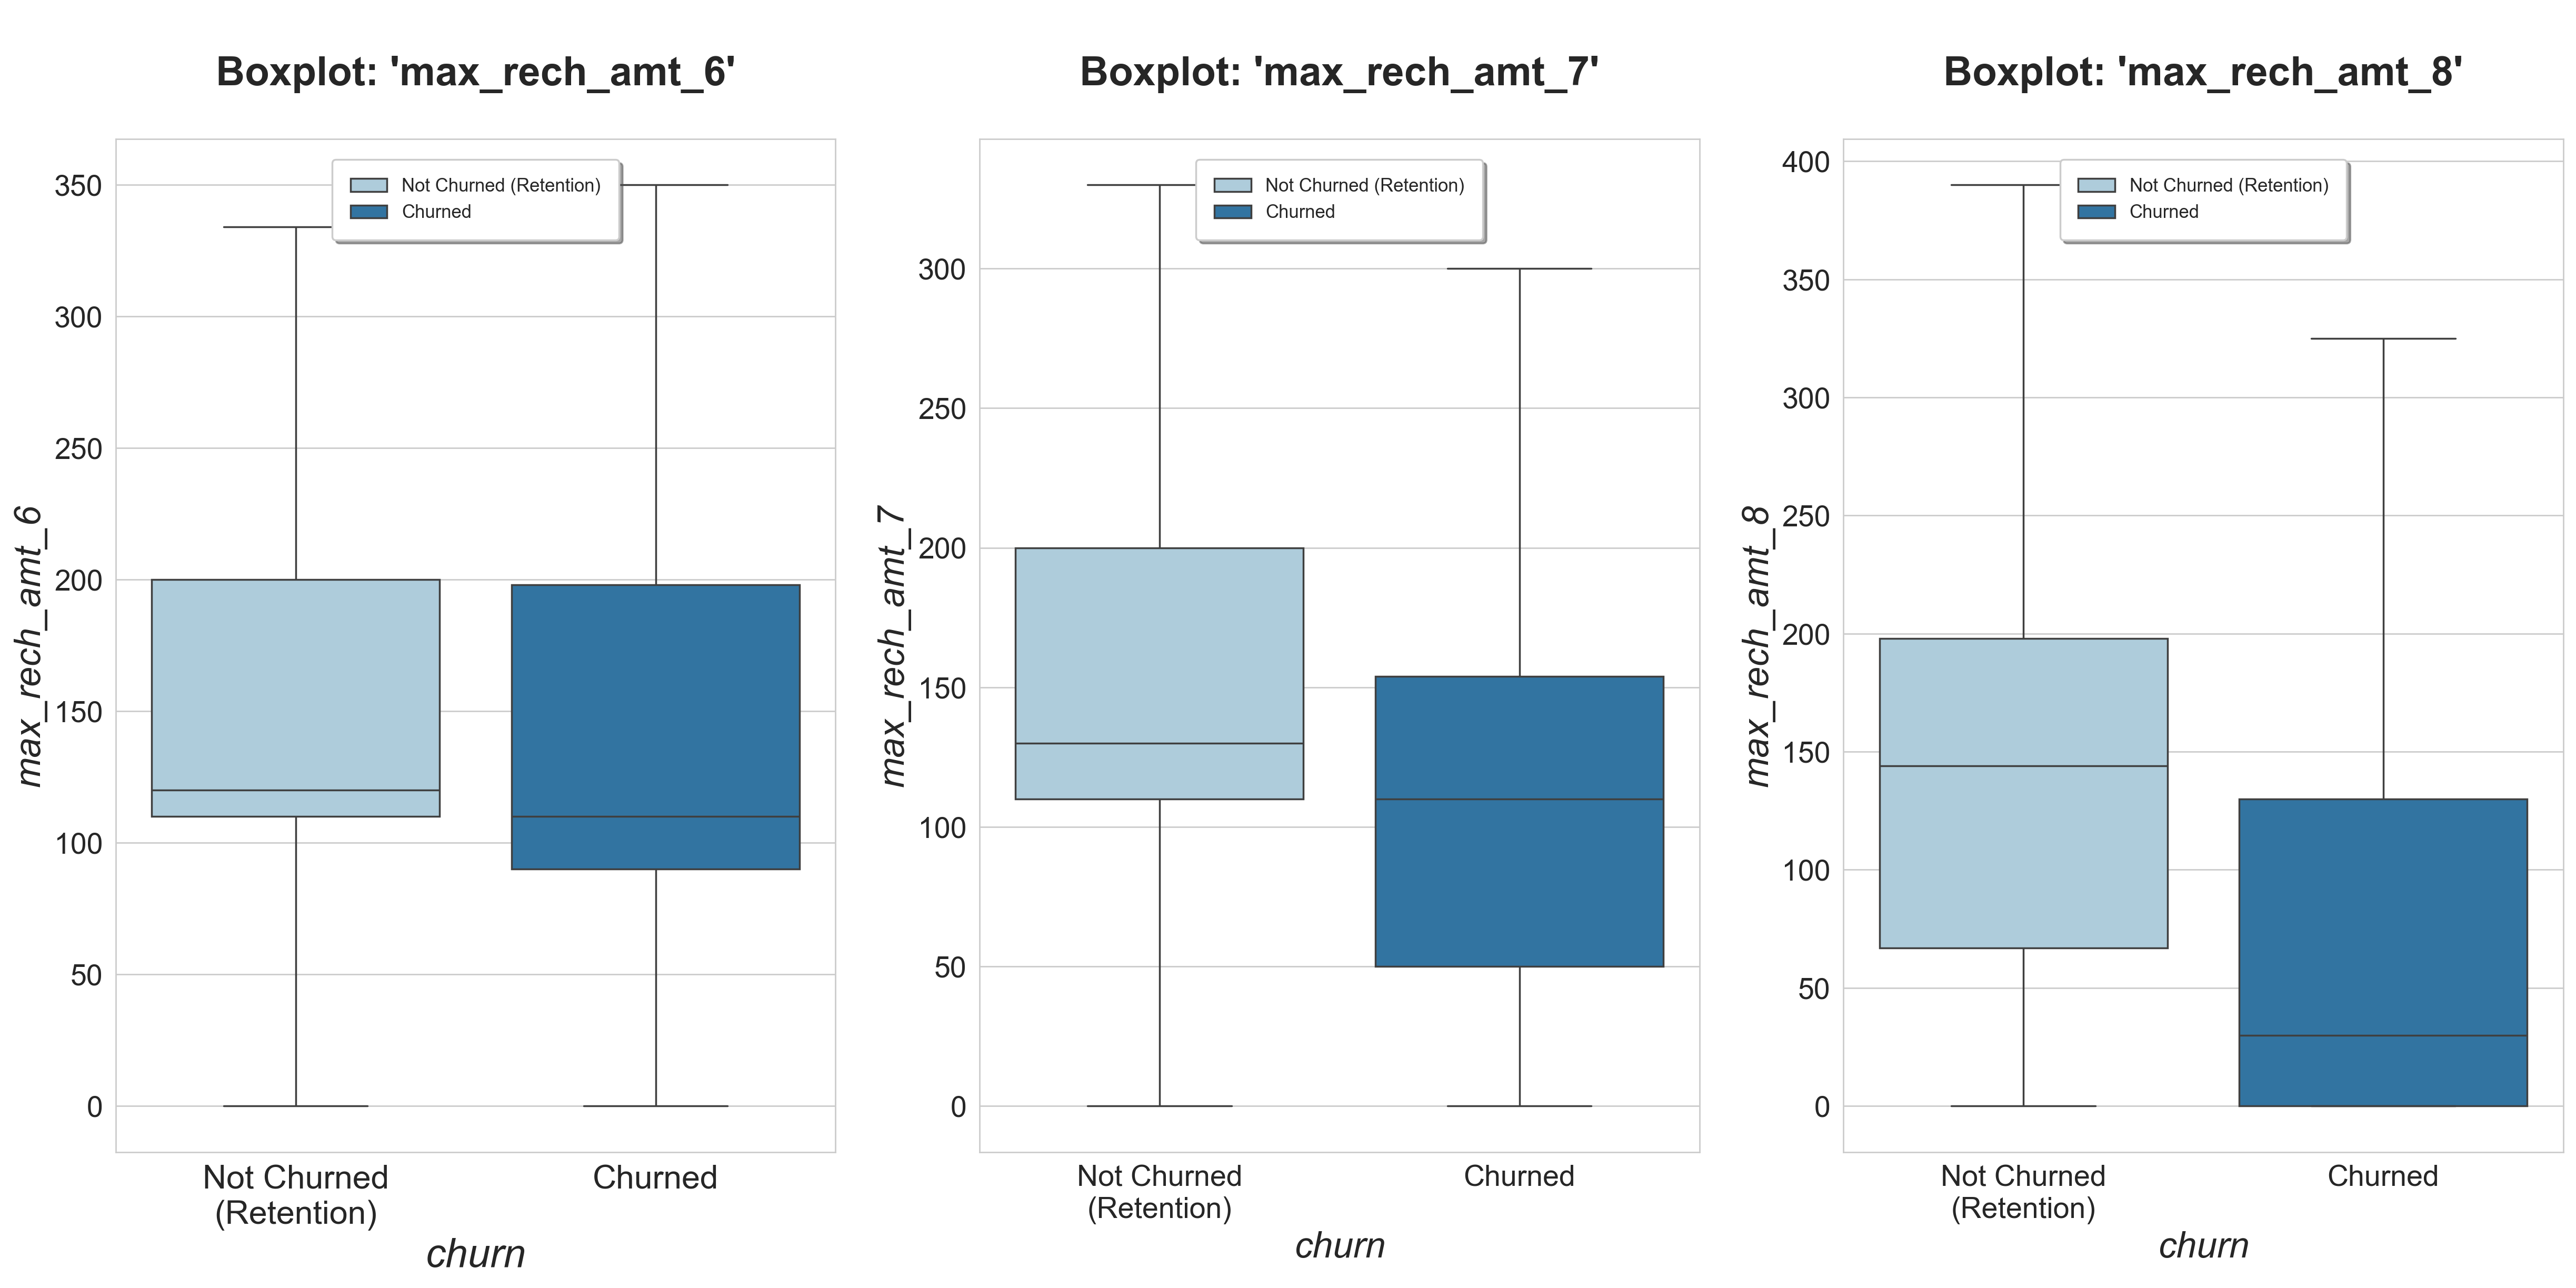

In [45]:
plot_boxplots_6_7_8('max_rech_amt')

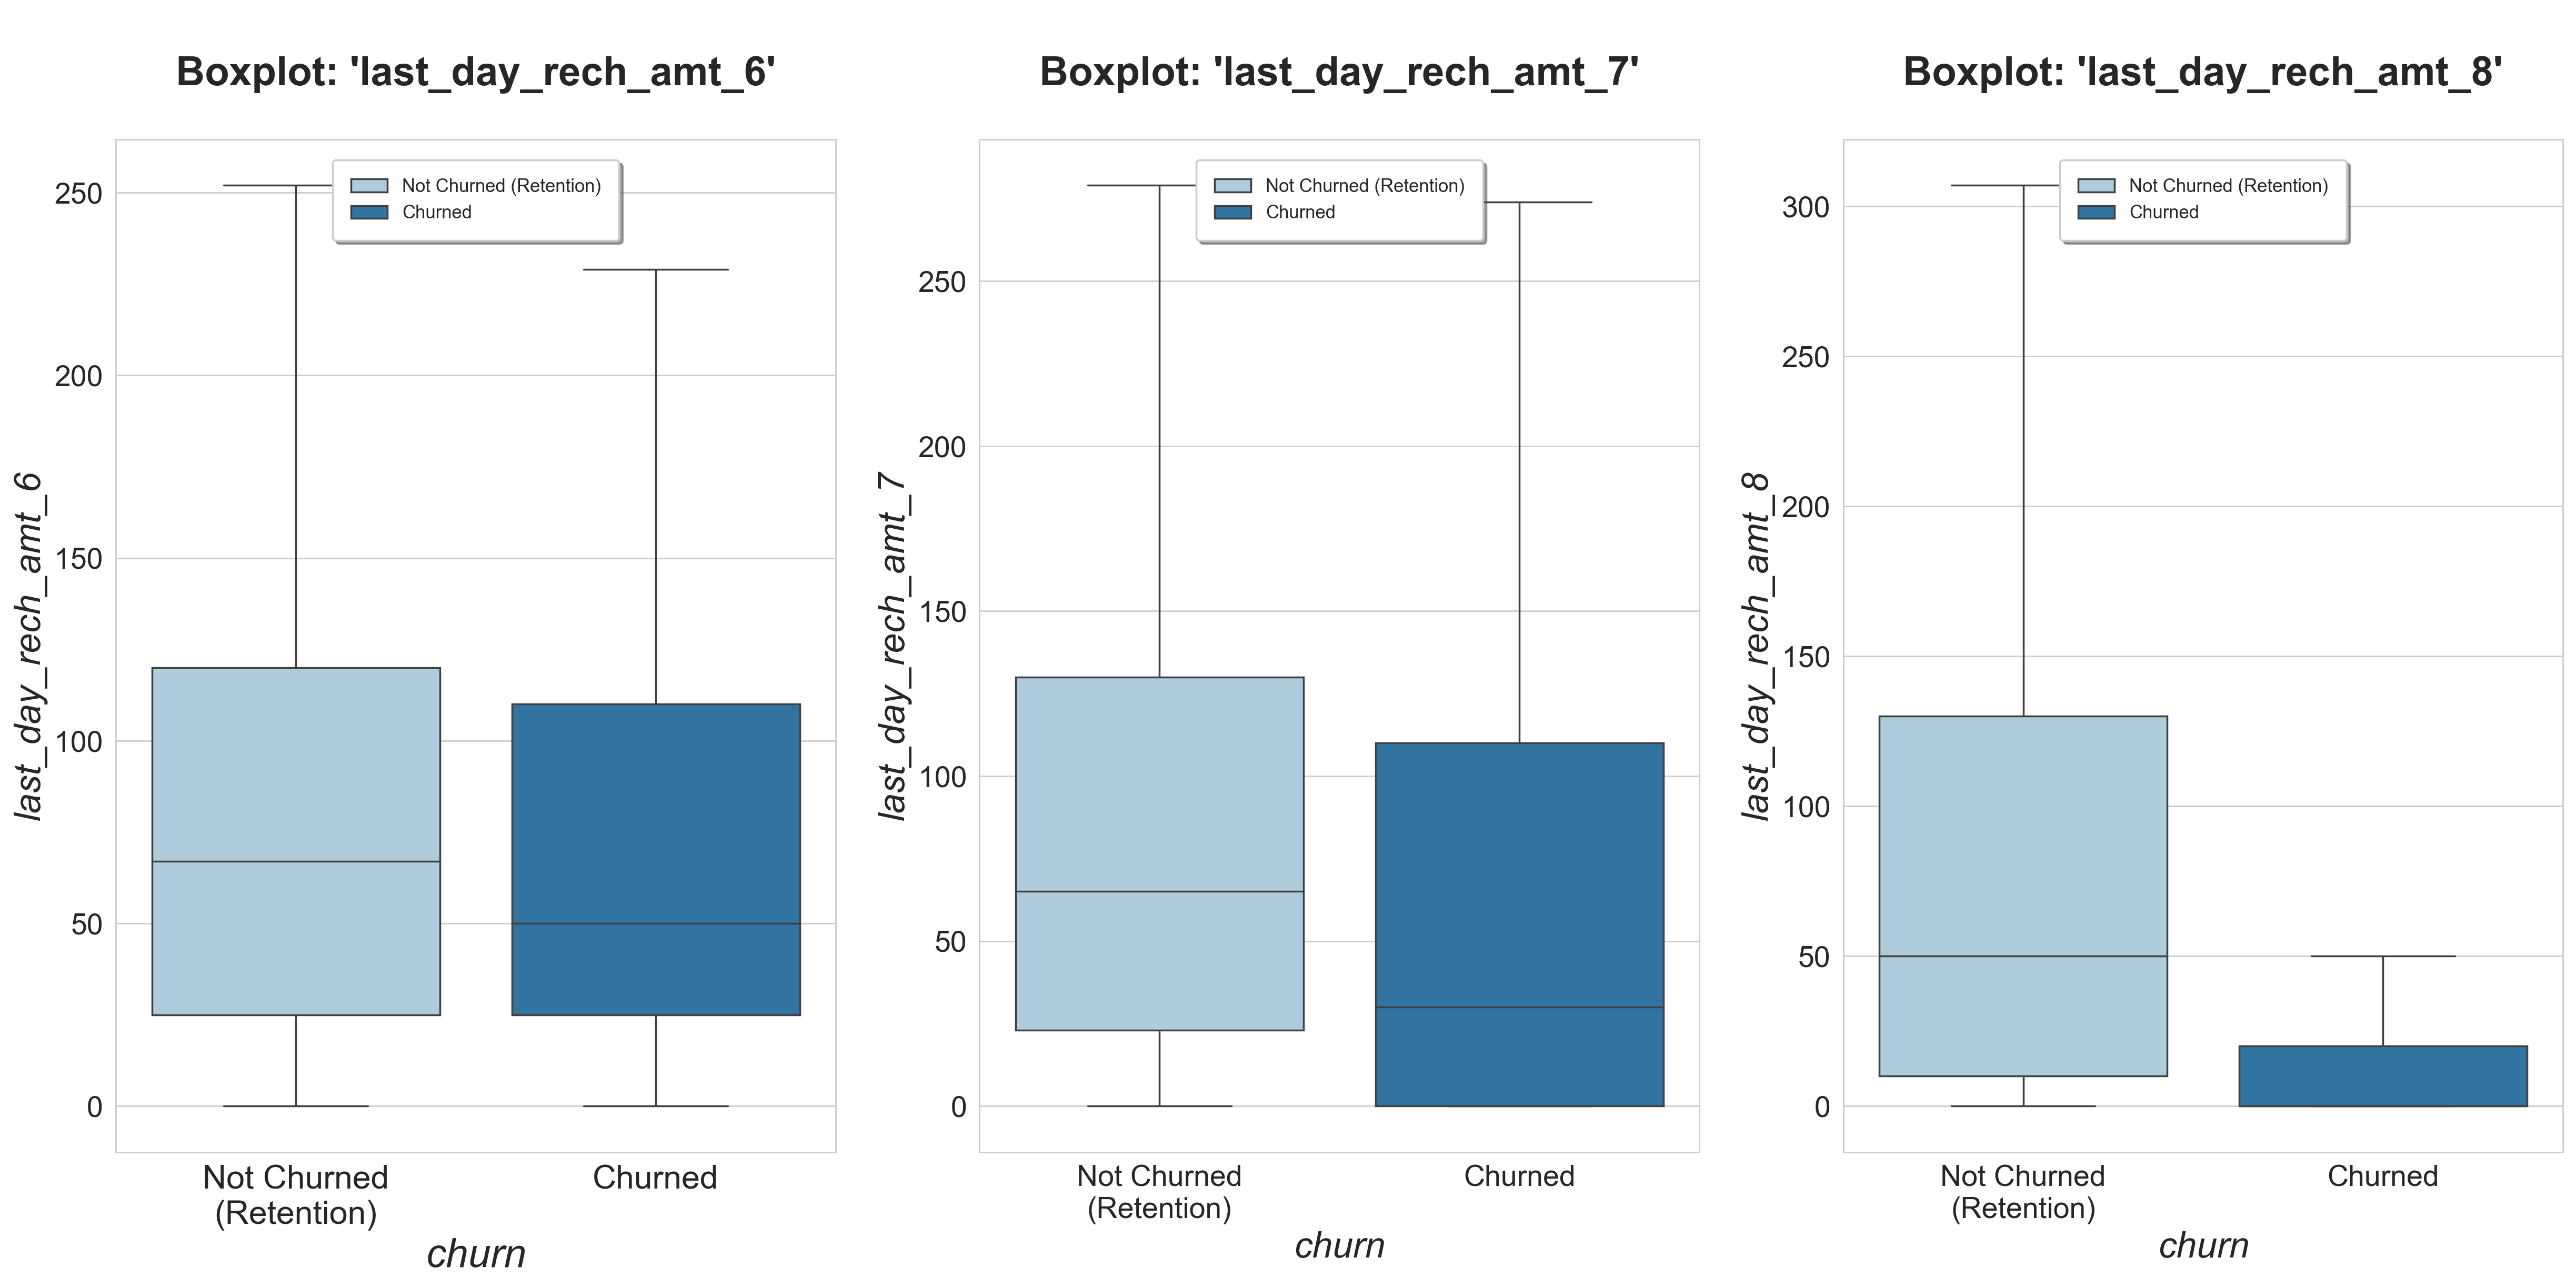

In [46]:
plot_boxplots_6_7_8('last_day_rech_amt')

In [47]:
other_rech = telecom_hv.columns[telecom_hv.columns.str.contains('rech_num|max_rech_data',regex=True)]
other_rech

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [48]:
other_rech_df = telecom_hv[other_rech]
null_prcnt_df(other_rech_df)

Column  Null Percentage
total_rech_num_6  total_rech_num_6         0.000000
total_rech_num_7  total_rech_num_7         0.000000
total_rech_num_8  total_rech_num_8         0.000000
max_rech_data_6    max_rech_data_6        44.112443
max_rech_data_7    max_rech_data_7        43.117551
max_rech_data_8    max_rech_data_8        46.799987

In [49]:
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16740.000000     17038.000000     15935.000000
mean        139.804002       140.444712       136.353373
std         118.892926       120.295284       119.571138
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

In [50]:
telecom_hv[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_hv[['max_rech_data_6','max_rech_data_7',\
                                                                                  'max_rech_data_8']].replace(np.nan, 0)

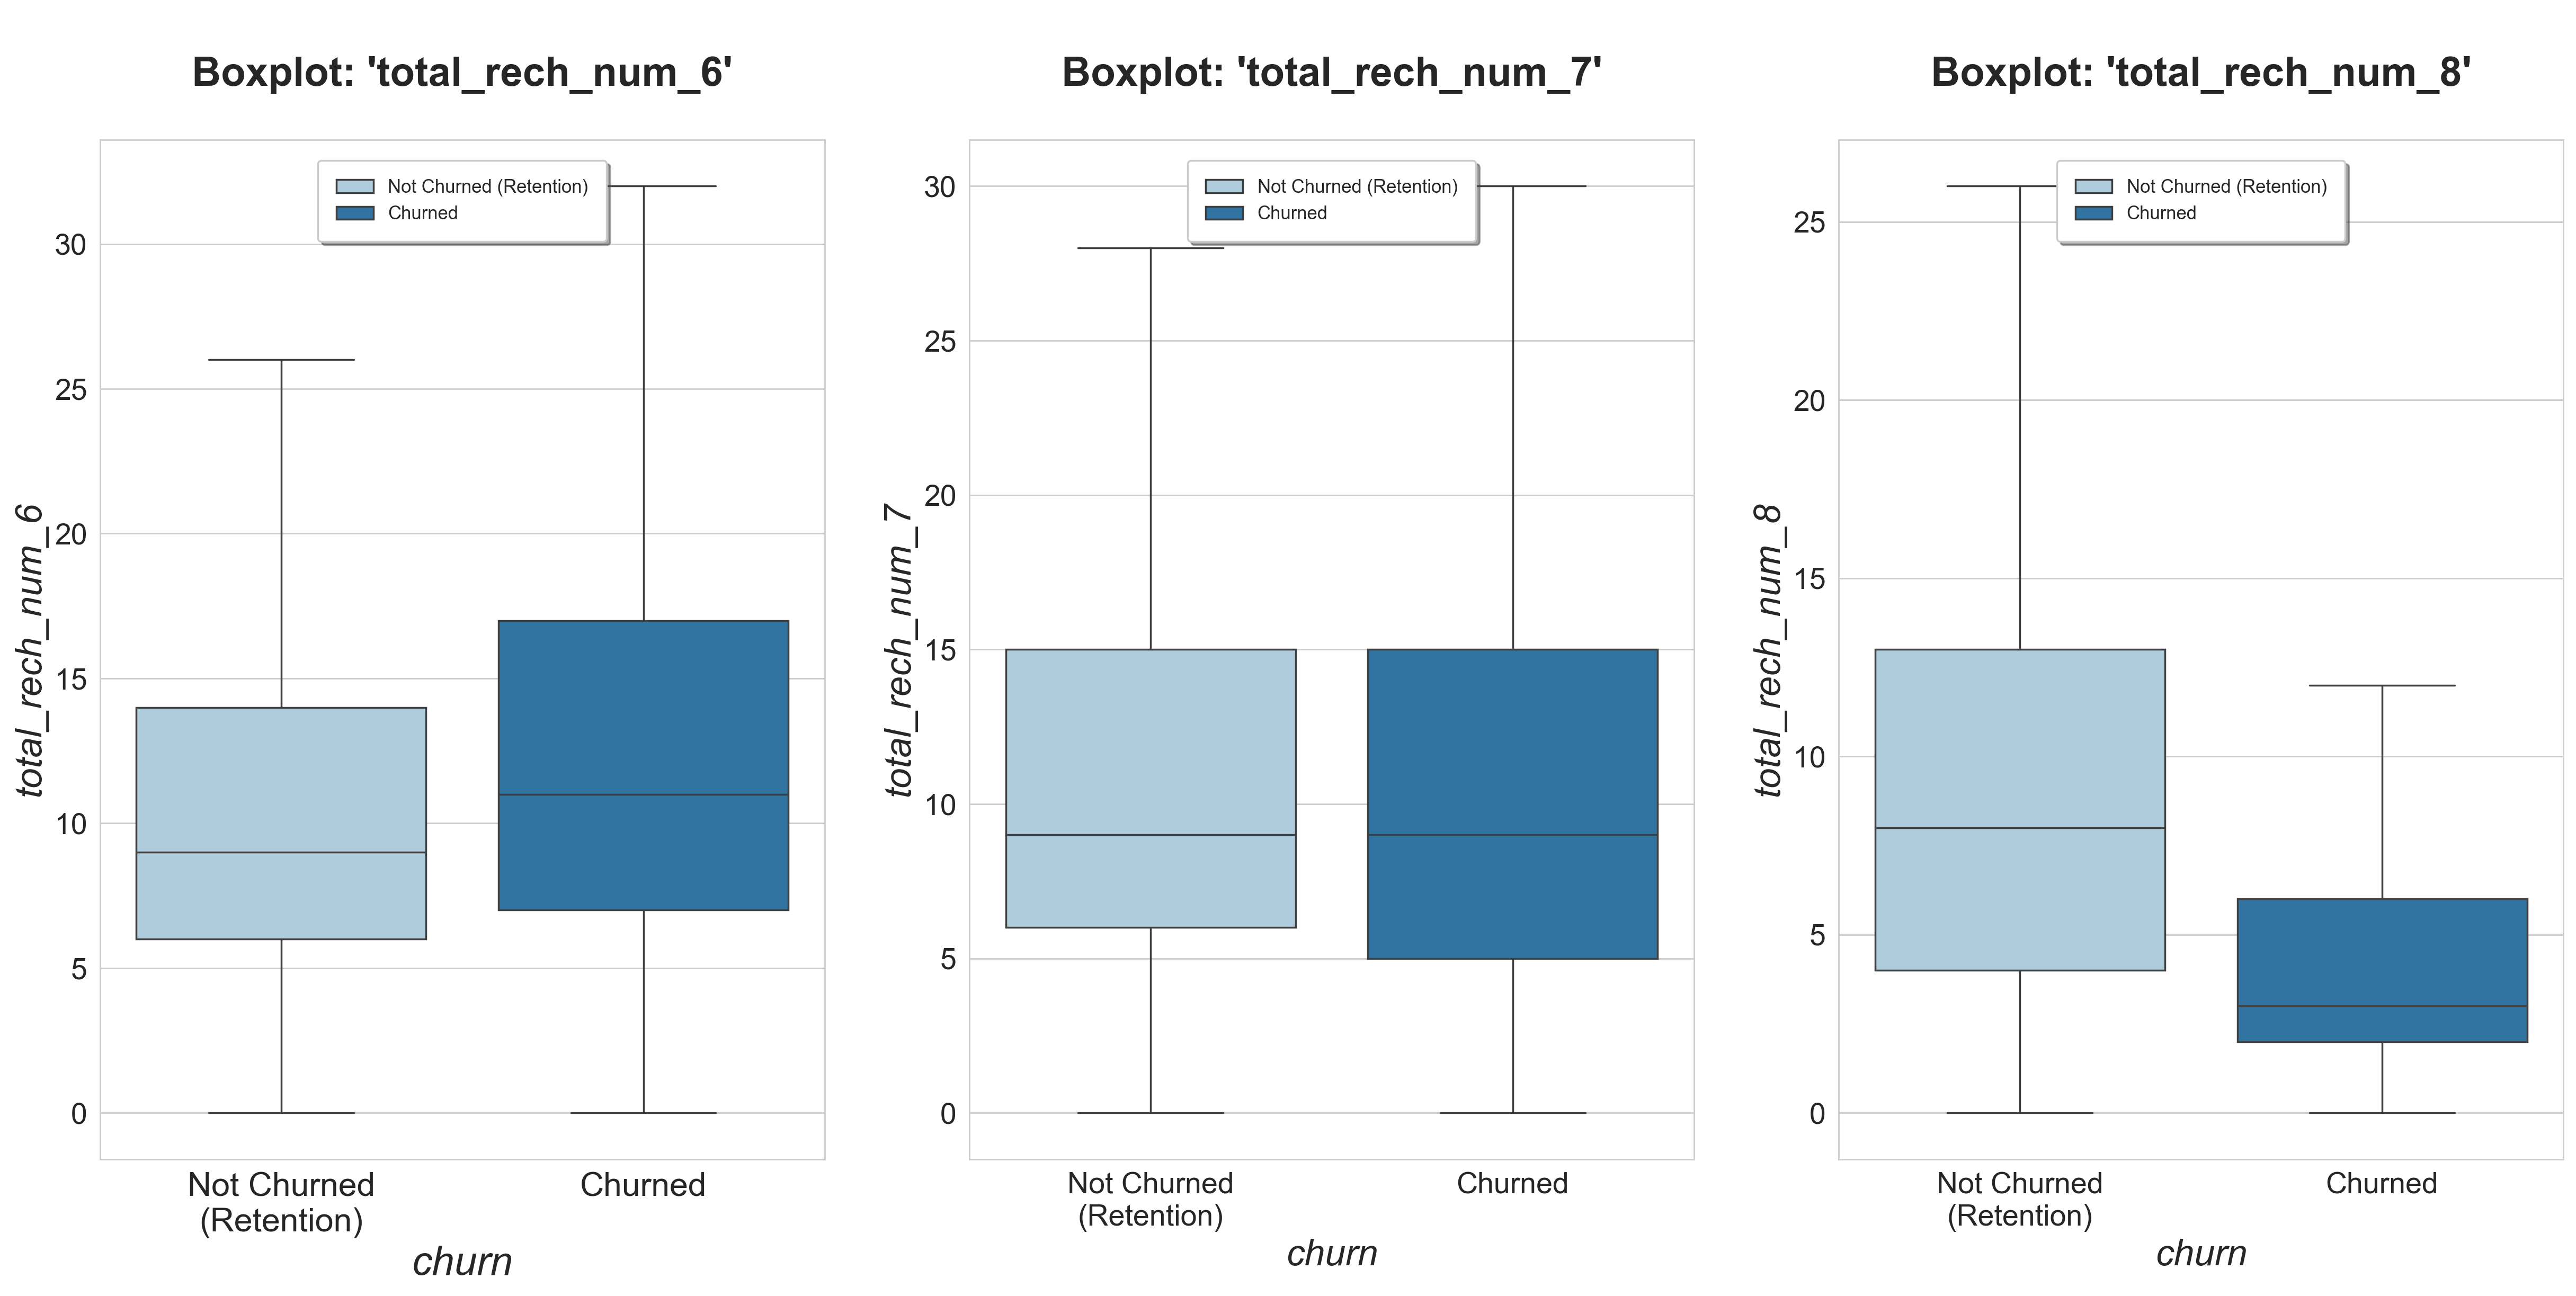

In [51]:
plot_boxplots_6_7_8('total_rech_num')

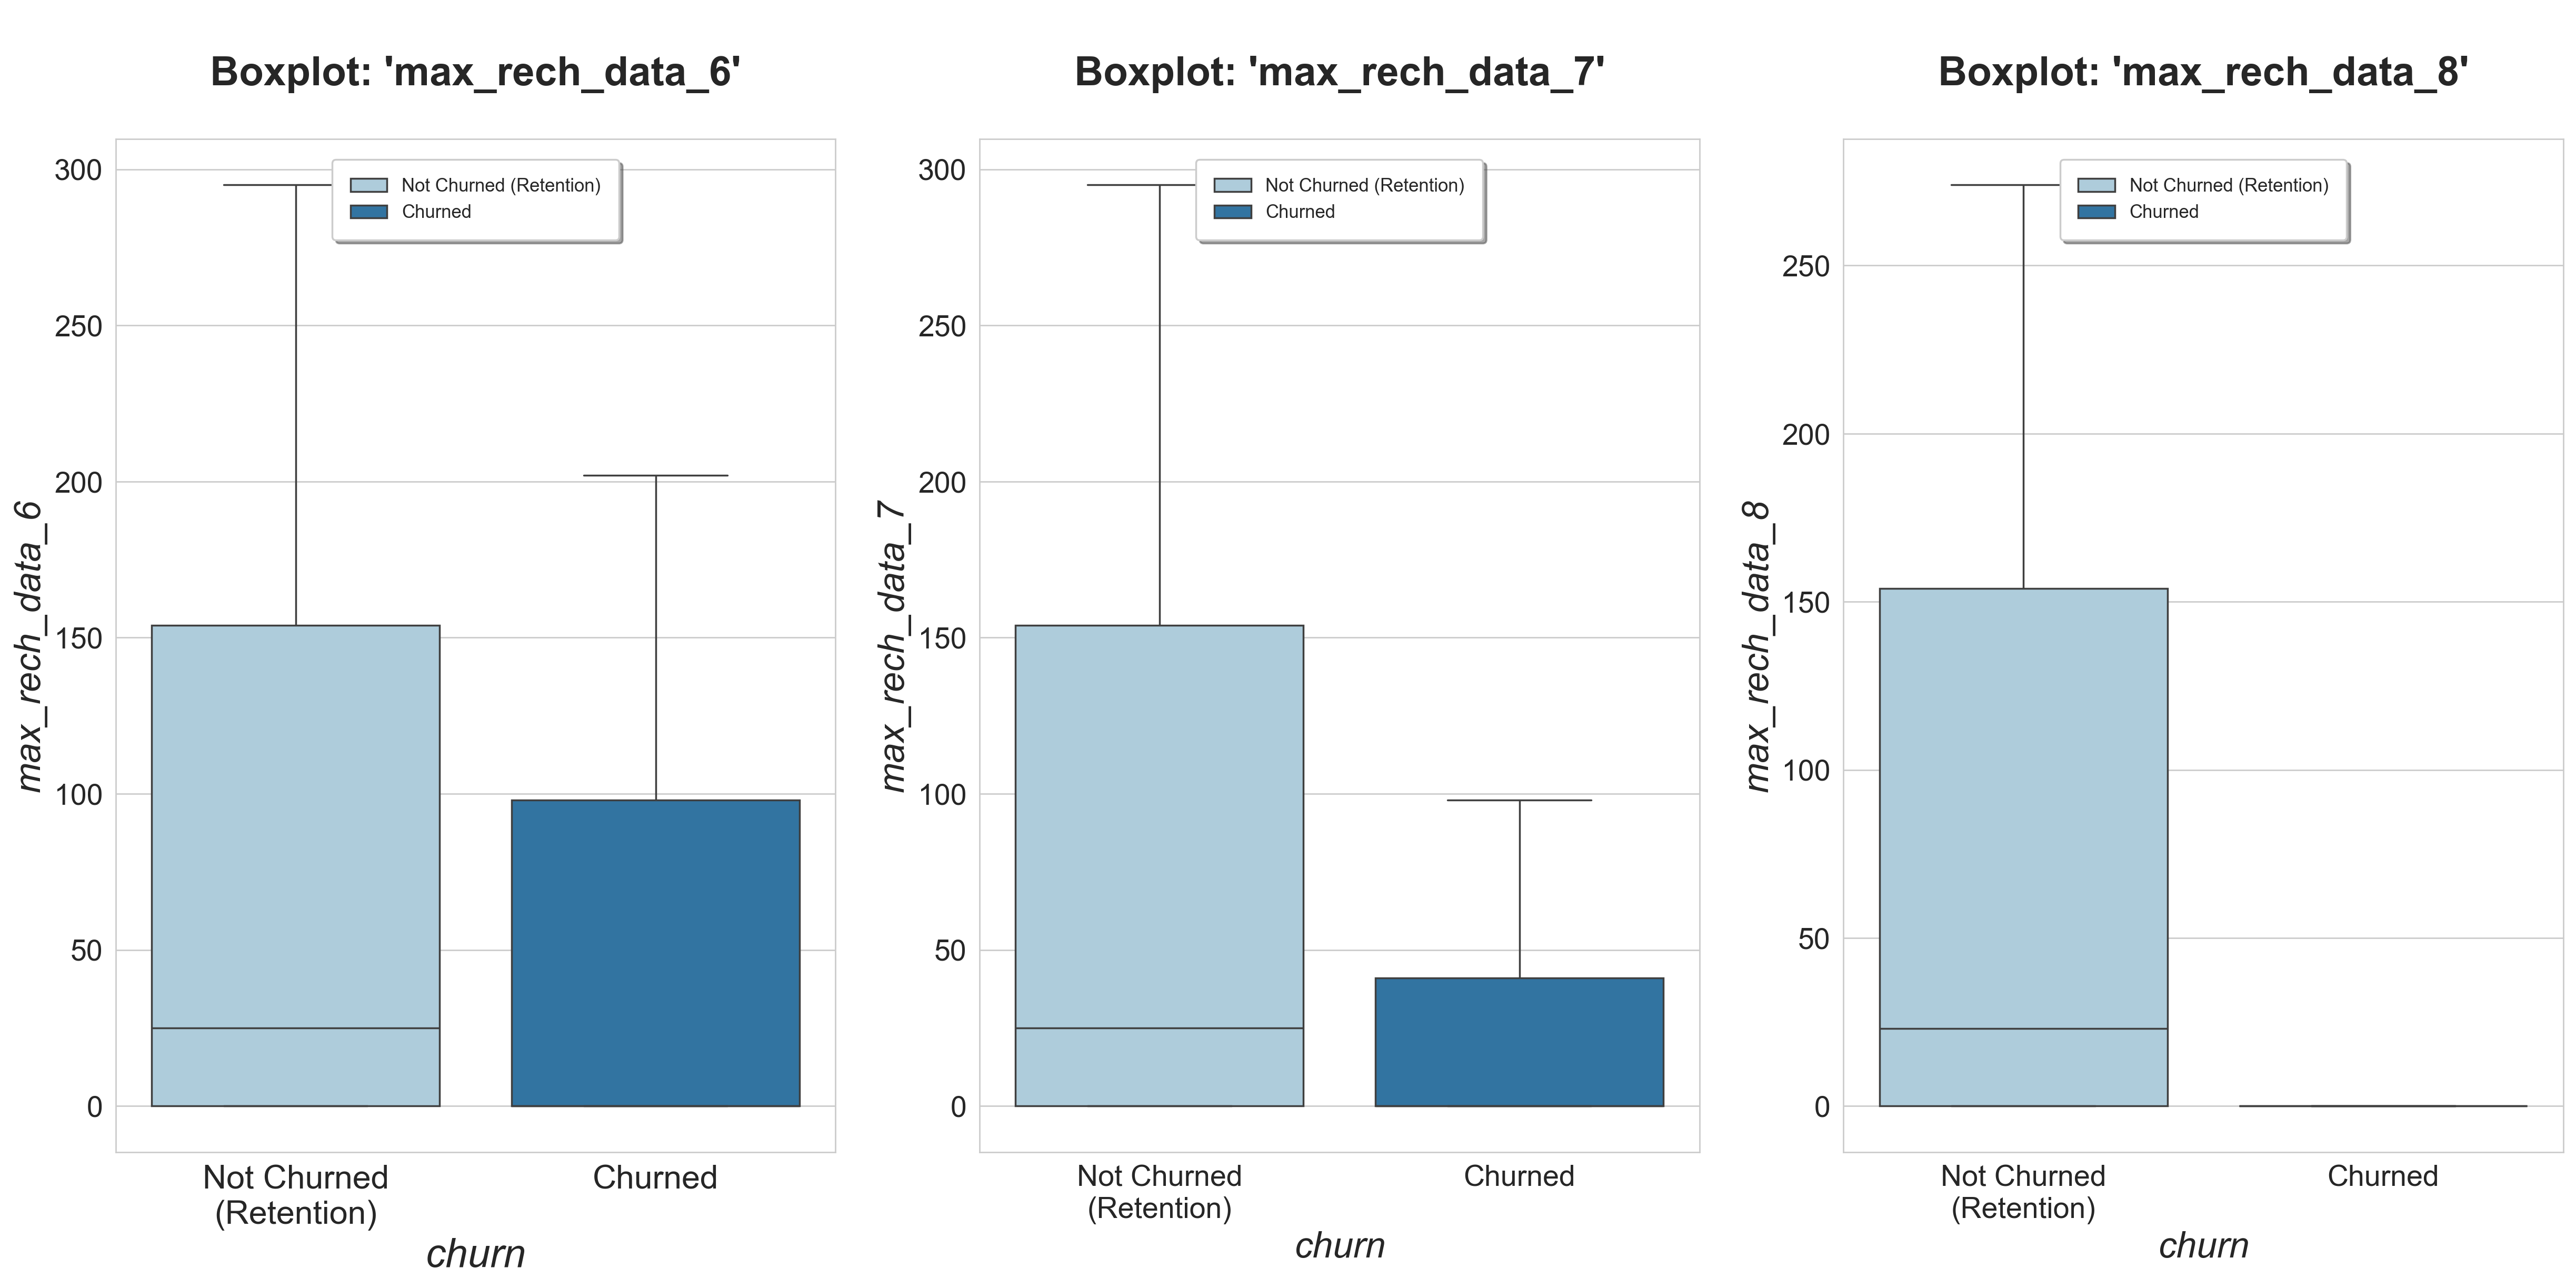

In [52]:
plot_boxplots_6_7_8('max_rech_data')

In [53]:
all_rech_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')])  ##Excluding 2g_3g
all_rech = telecom_hv[all_rech_vars]
null_prcnt_df(all_rech)

Column  Null Percentage
total_rech_num_6            total_rech_num_6              0.0
total_rech_num_7            total_rech_num_7              0.0
total_rech_num_8            total_rech_num_8              0.0
total_rech_amt_6            total_rech_amt_6              0.0
total_rech_amt_7            total_rech_amt_7              0.0
total_rech_amt_8            total_rech_amt_8              0.0
max_rech_amt_6                max_rech_amt_6              0.0
max_rech_amt_7                max_rech_amt_7              0.0
max_rech_amt_8                max_rech_amt_8              0.0
last_day_rech_amt_6      last_day_rech_amt_6              0.0
last_day_rech_amt_7      last_day_rech_amt_7              0.0
last_day_rech_amt_8      last_day_rech_amt_8              0.0
max_rech_data_6              max_rech_data_6              0.0
max_rech_data_7              max_rech_data_7              0.0
max_rech_data_8              max_rech_data_8              0.0
av_rech_amt_data_6        av_rech_amt_data_6              0.0
av_rech_amt_data_7        av_rech_amt_data_7              0.0
av_rech_amt_data_8        av_rech_amt_data_8              0.0
total_rech_data_amt_6  total_rech_data_amt_6              0.0
total_rech_data_amt_7  total_rech_data_amt_7              0.0
total_rech_data_amt_8  total_rech_data_amt_8              0.0

In [54]:
usage_2g_3g_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('2g|3g',regex=True)])
usage_2g_3g_vars

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [55]:
usage_2g_3g = telecom_hv[usage_2g_3g_vars]
null_prcnt_df(usage_2g_3g)

Column  Null Percentage
count_rech_2g_6  count_rech_2g_6        44.112443
count_rech_2g_7  count_rech_2g_7        43.117551
count_rech_2g_8  count_rech_2g_8        46.799987
count_rech_3g_6  count_rech_3g_6        44.112443
count_rech_3g_7  count_rech_3g_7        43.117551
count_rech_3g_8  count_rech_3g_8        46.799987
vol_2g_mb_6          vol_2g_mb_6         0.000000
vol_2g_mb_7          vol_2g_mb_7         0.000000
vol_2g_mb_8          vol_2g_mb_8         0.000000
vol_3g_mb_6          vol_3g_mb_6         0.000000
vol_3g_mb_7          vol_3g_mb_7         0.000000
vol_3g_mb_8          vol_3g_mb_8         0.000000
arpu_3g_6              arpu_3g_6        44.112443
arpu_3g_7              arpu_3g_7        43.117551
arpu_3g_8              arpu_3g_8        46.799987
arpu_2g_6              arpu_2g_6        44.112443
arpu_2g_7              arpu_2g_7        43.117551
arpu_2g_8              arpu_2g_8        46.799987
monthly_2g_6        monthly_2g_6         0.000000
monthly_2g_7        monthly_2g_7         0.000000
monthly_2g_8        monthly_2g_8         0.000000
sachet_2g_6          sachet_2g_6         0.000000
sachet_2g_7          sachet_2g_7         0.000000
sachet_2g_8          sachet_2g_8         0.000000
monthly_3g_6        monthly_3g_6         0.000000
monthly_3g_7        monthly_3g_7         0.000000
monthly_3g_8        monthly_3g_8         0.000000
sachet_3g_6          sachet_3g_6         0.000000
sachet_3g_7          sachet_3g_7         0.000000
sachet_3g_8          sachet_3g_8         0.000000
aug_vbc_3g            aug_vbc_3g         0.000000
jul_vbc_3g            jul_vbc_3g         0.000000
jun_vbc_3g            jun_vbc_3g         0.000000

In [56]:
drop_vars = list(telecom_hv.columns[telecom_hv.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
telecom_hv.drop(drop_vars, axis=1, inplace=True)

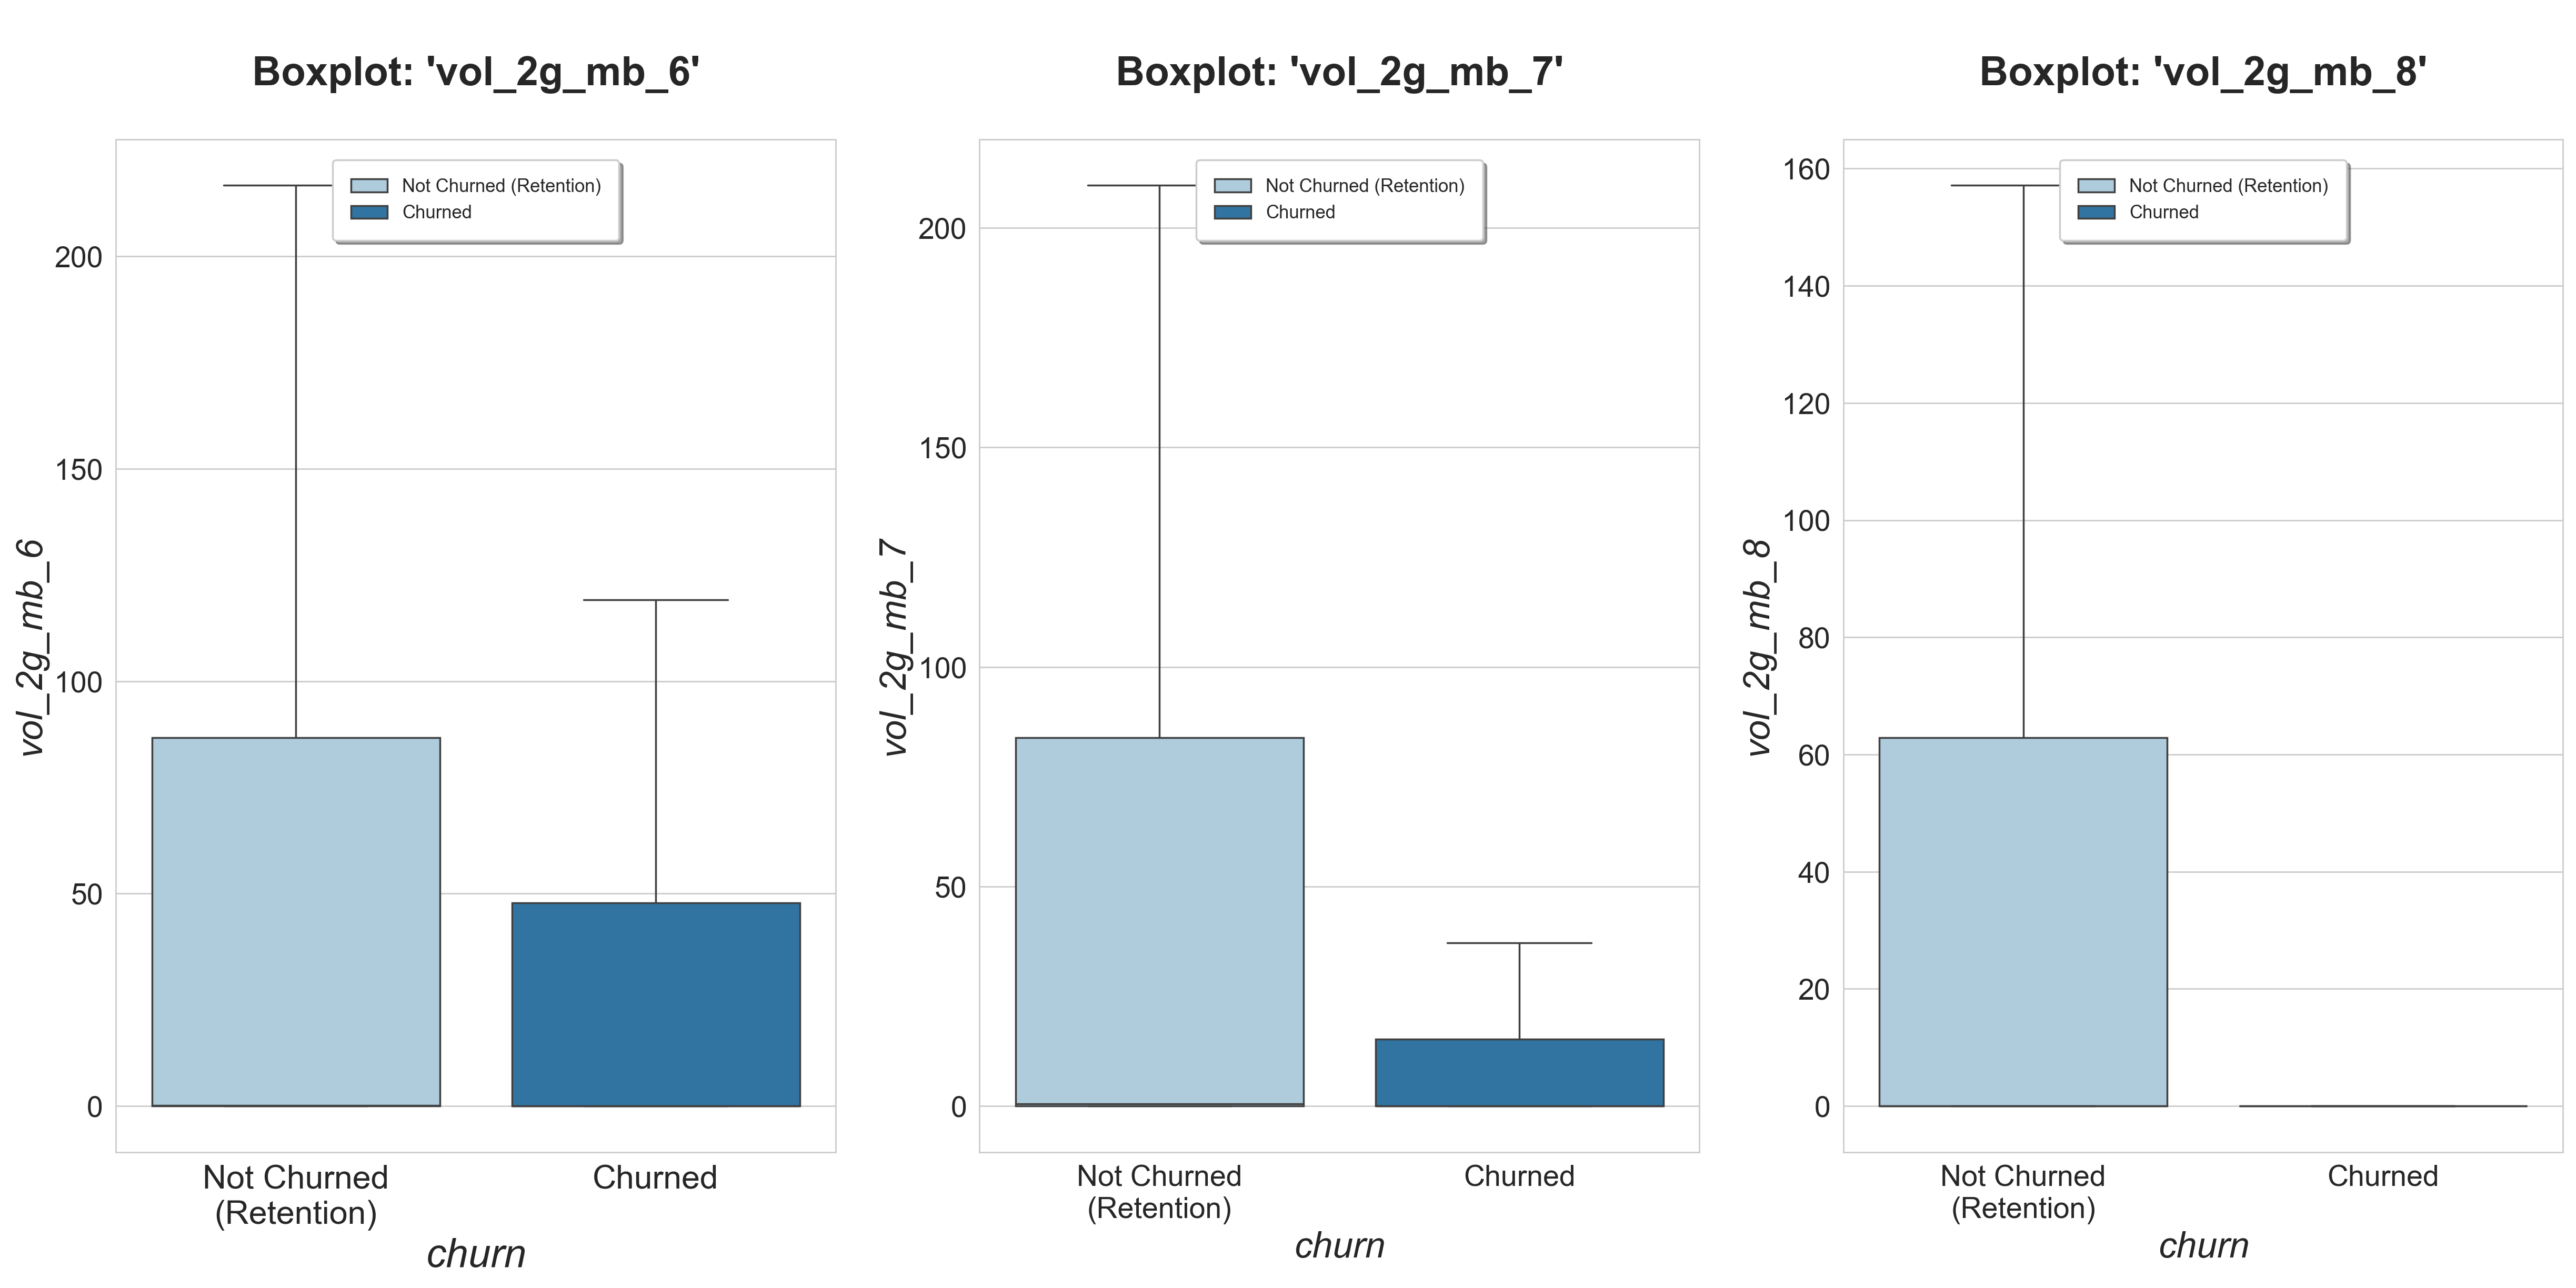

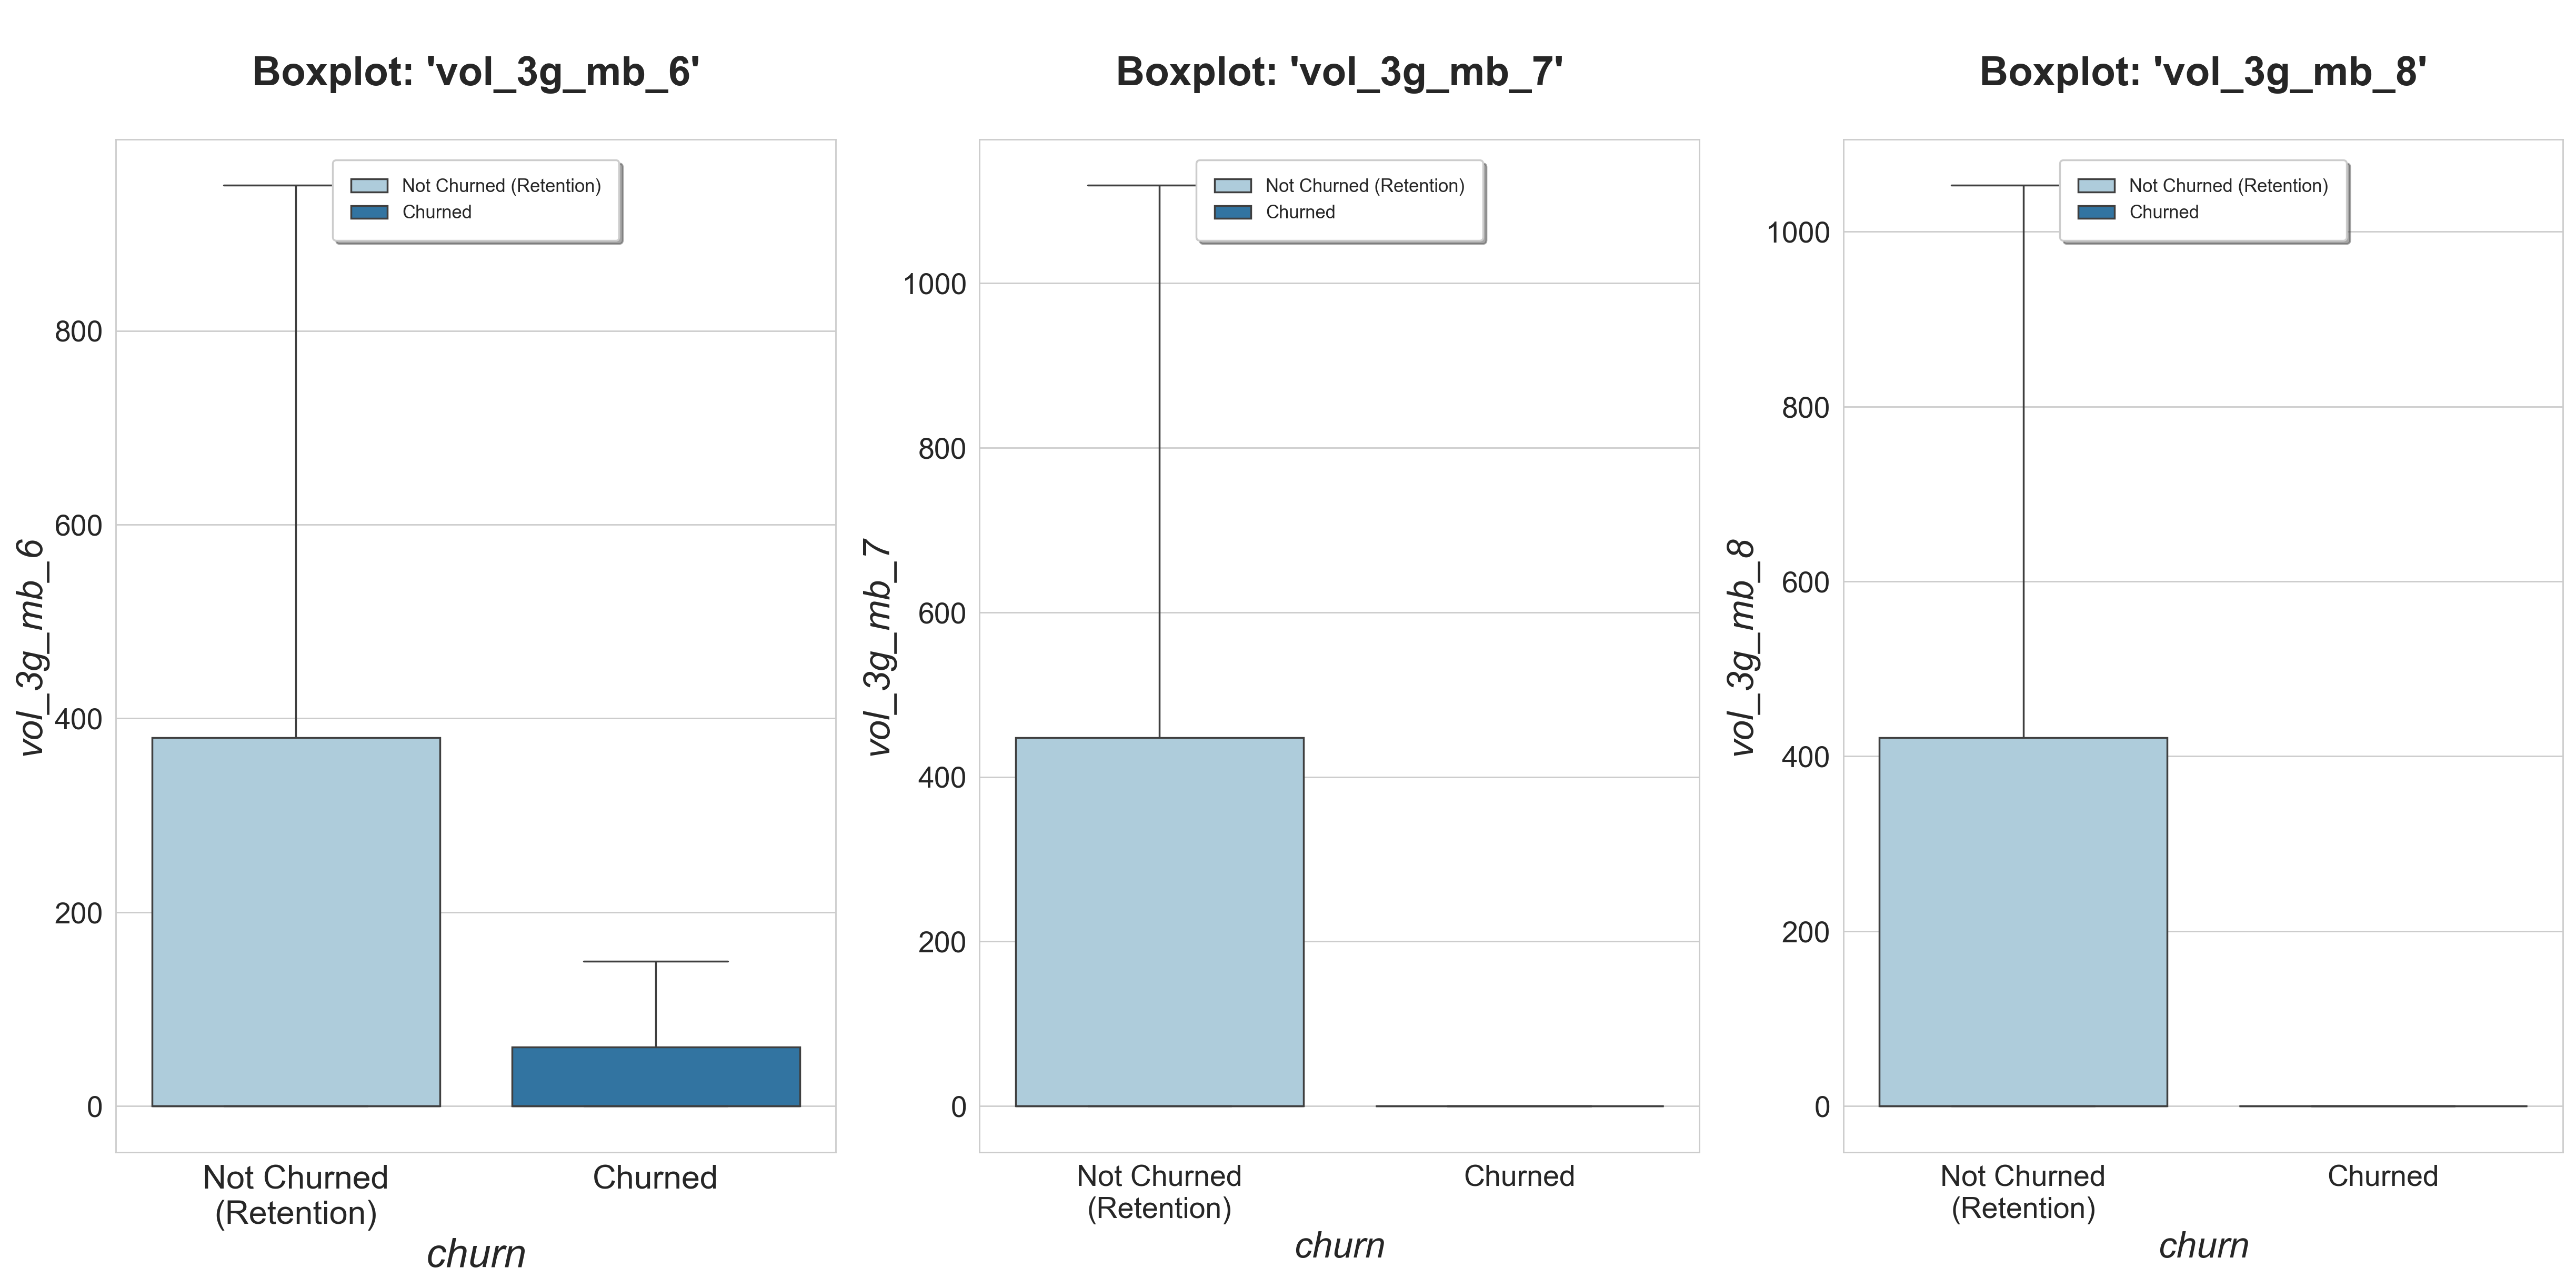

In [57]:
##Plotting volume of 2G data usage features:
plot_boxplots_6_7_8('vol_2g_mb')

##Plotting volume of 3G data usage features:
plot_boxplots_6_7_8('vol_3g_mb')

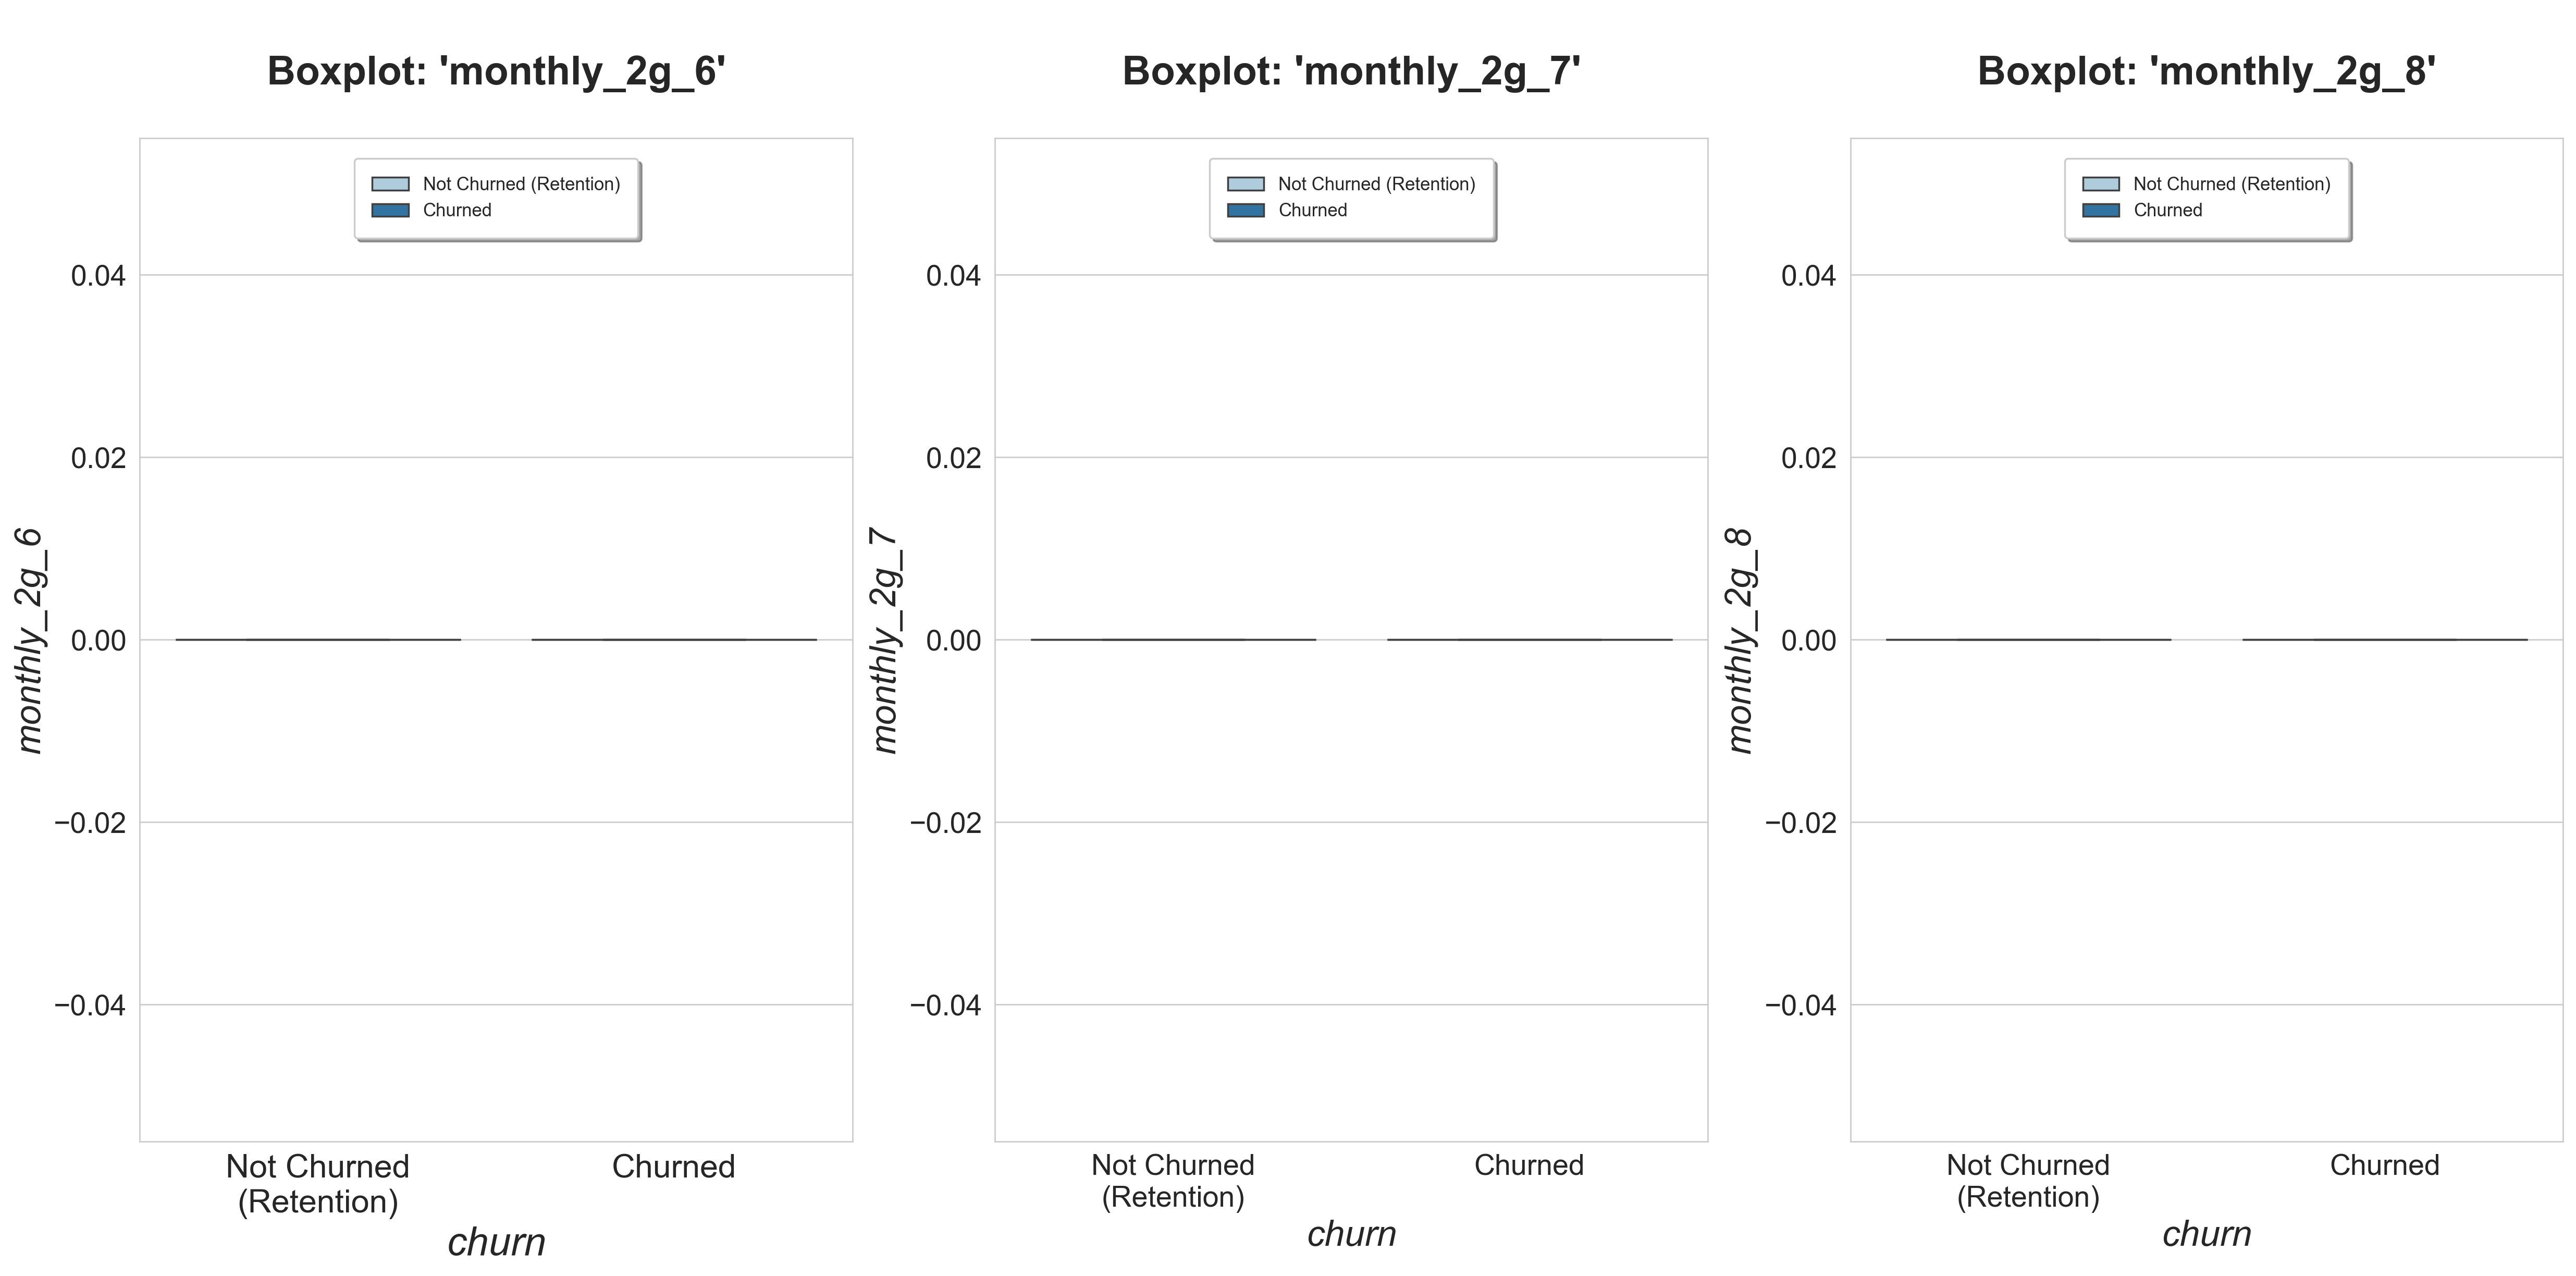

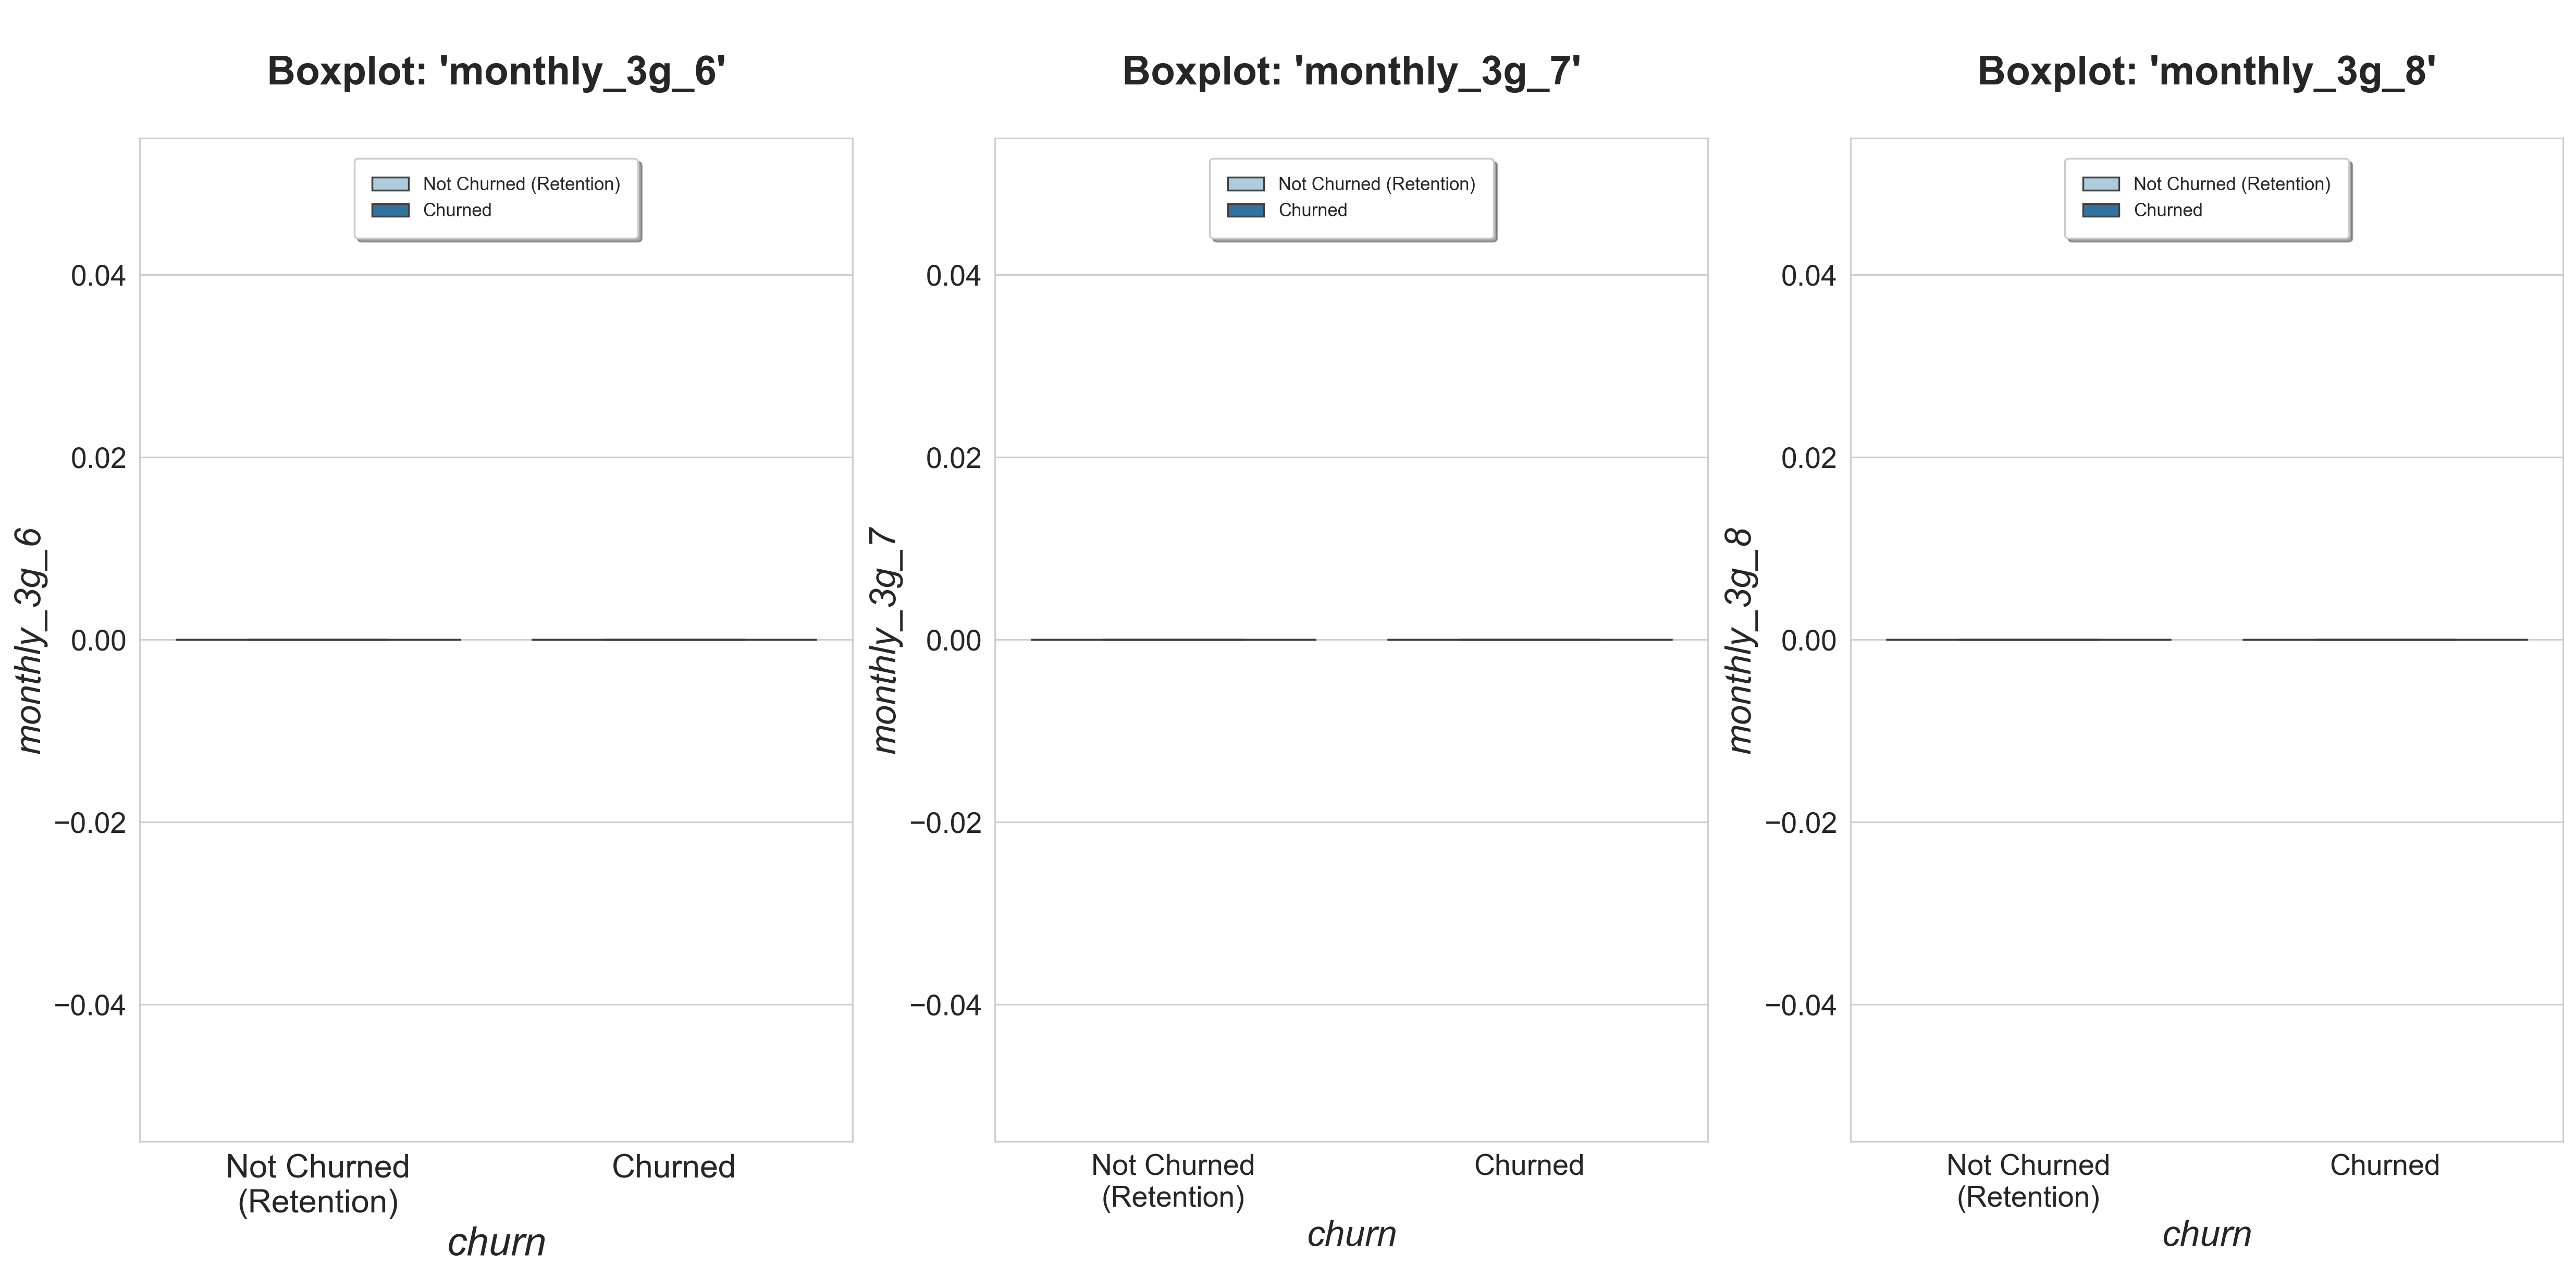

In [58]:
plot_boxplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_boxplots_6_7_8('monthly_3g') 

In [59]:
def plot_barplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_hv.copy()
    
    plt.subplot(1,3,1)
    ax_11= sns.barplot(data=df, y=feature+"_6", x=df["churn"], hue="churn", palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    
    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,2)
    ax_22= sns.barplot(data=df, y=feature+"_7", x=df["churn"], hue="churn", palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    plt.subplot(1,3,3)
    ax_33= sns.barplot(data=df, y=feature+"_8", x=df["churn"], hue="churn", palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

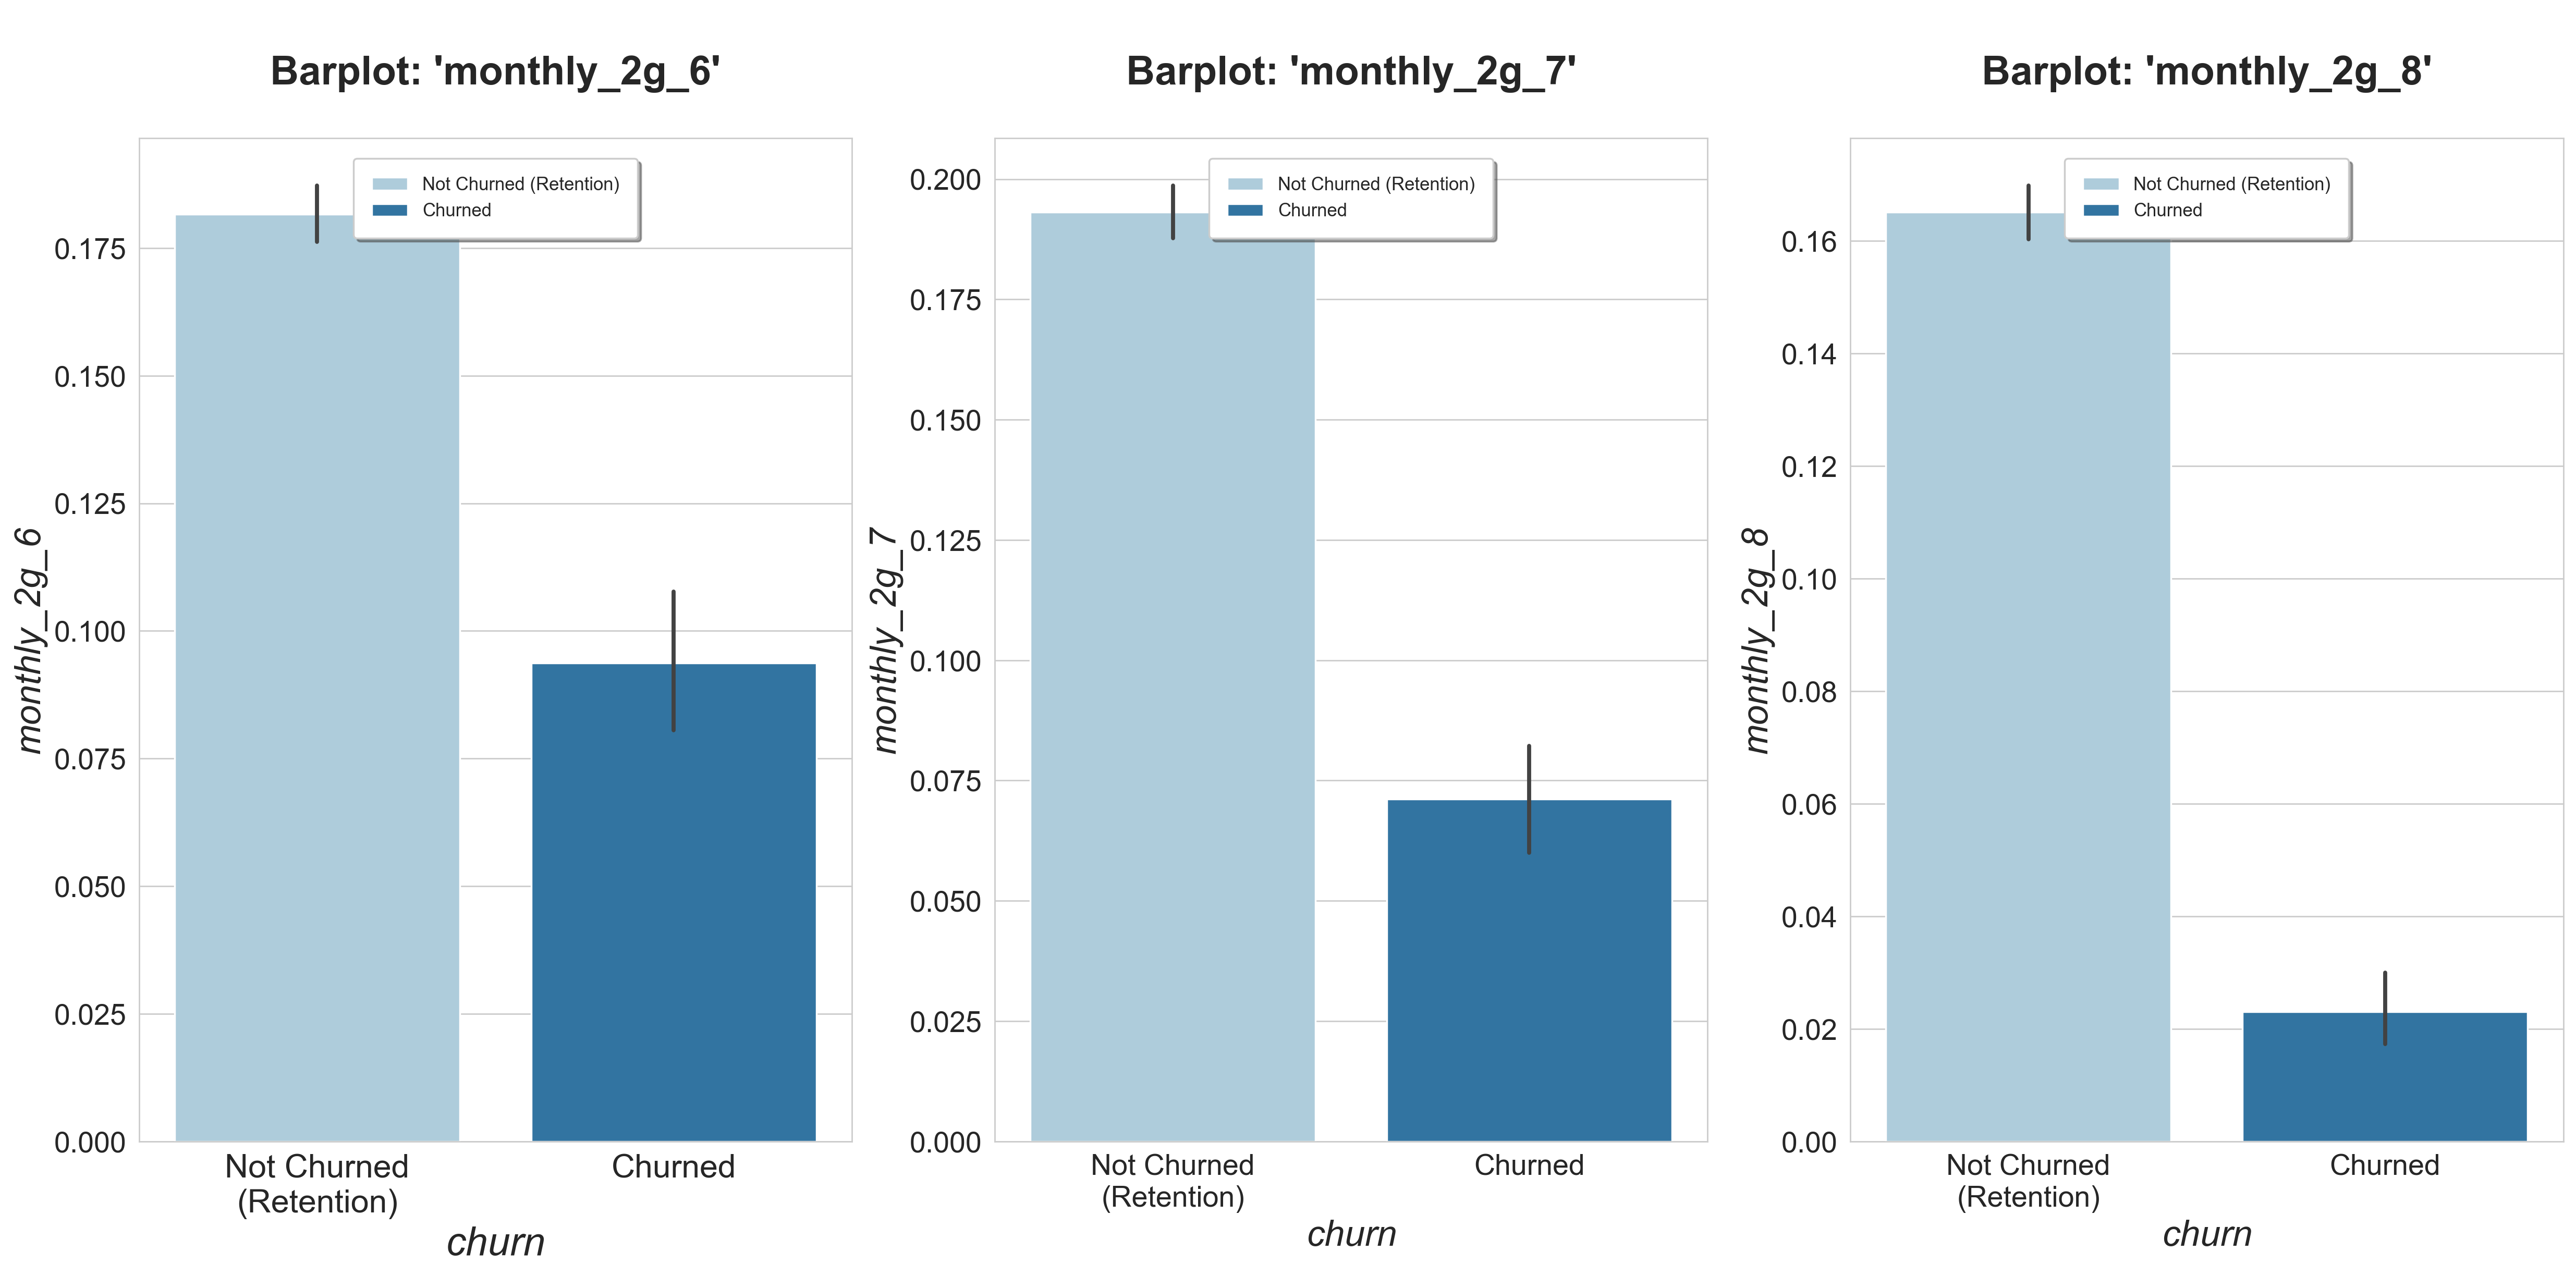

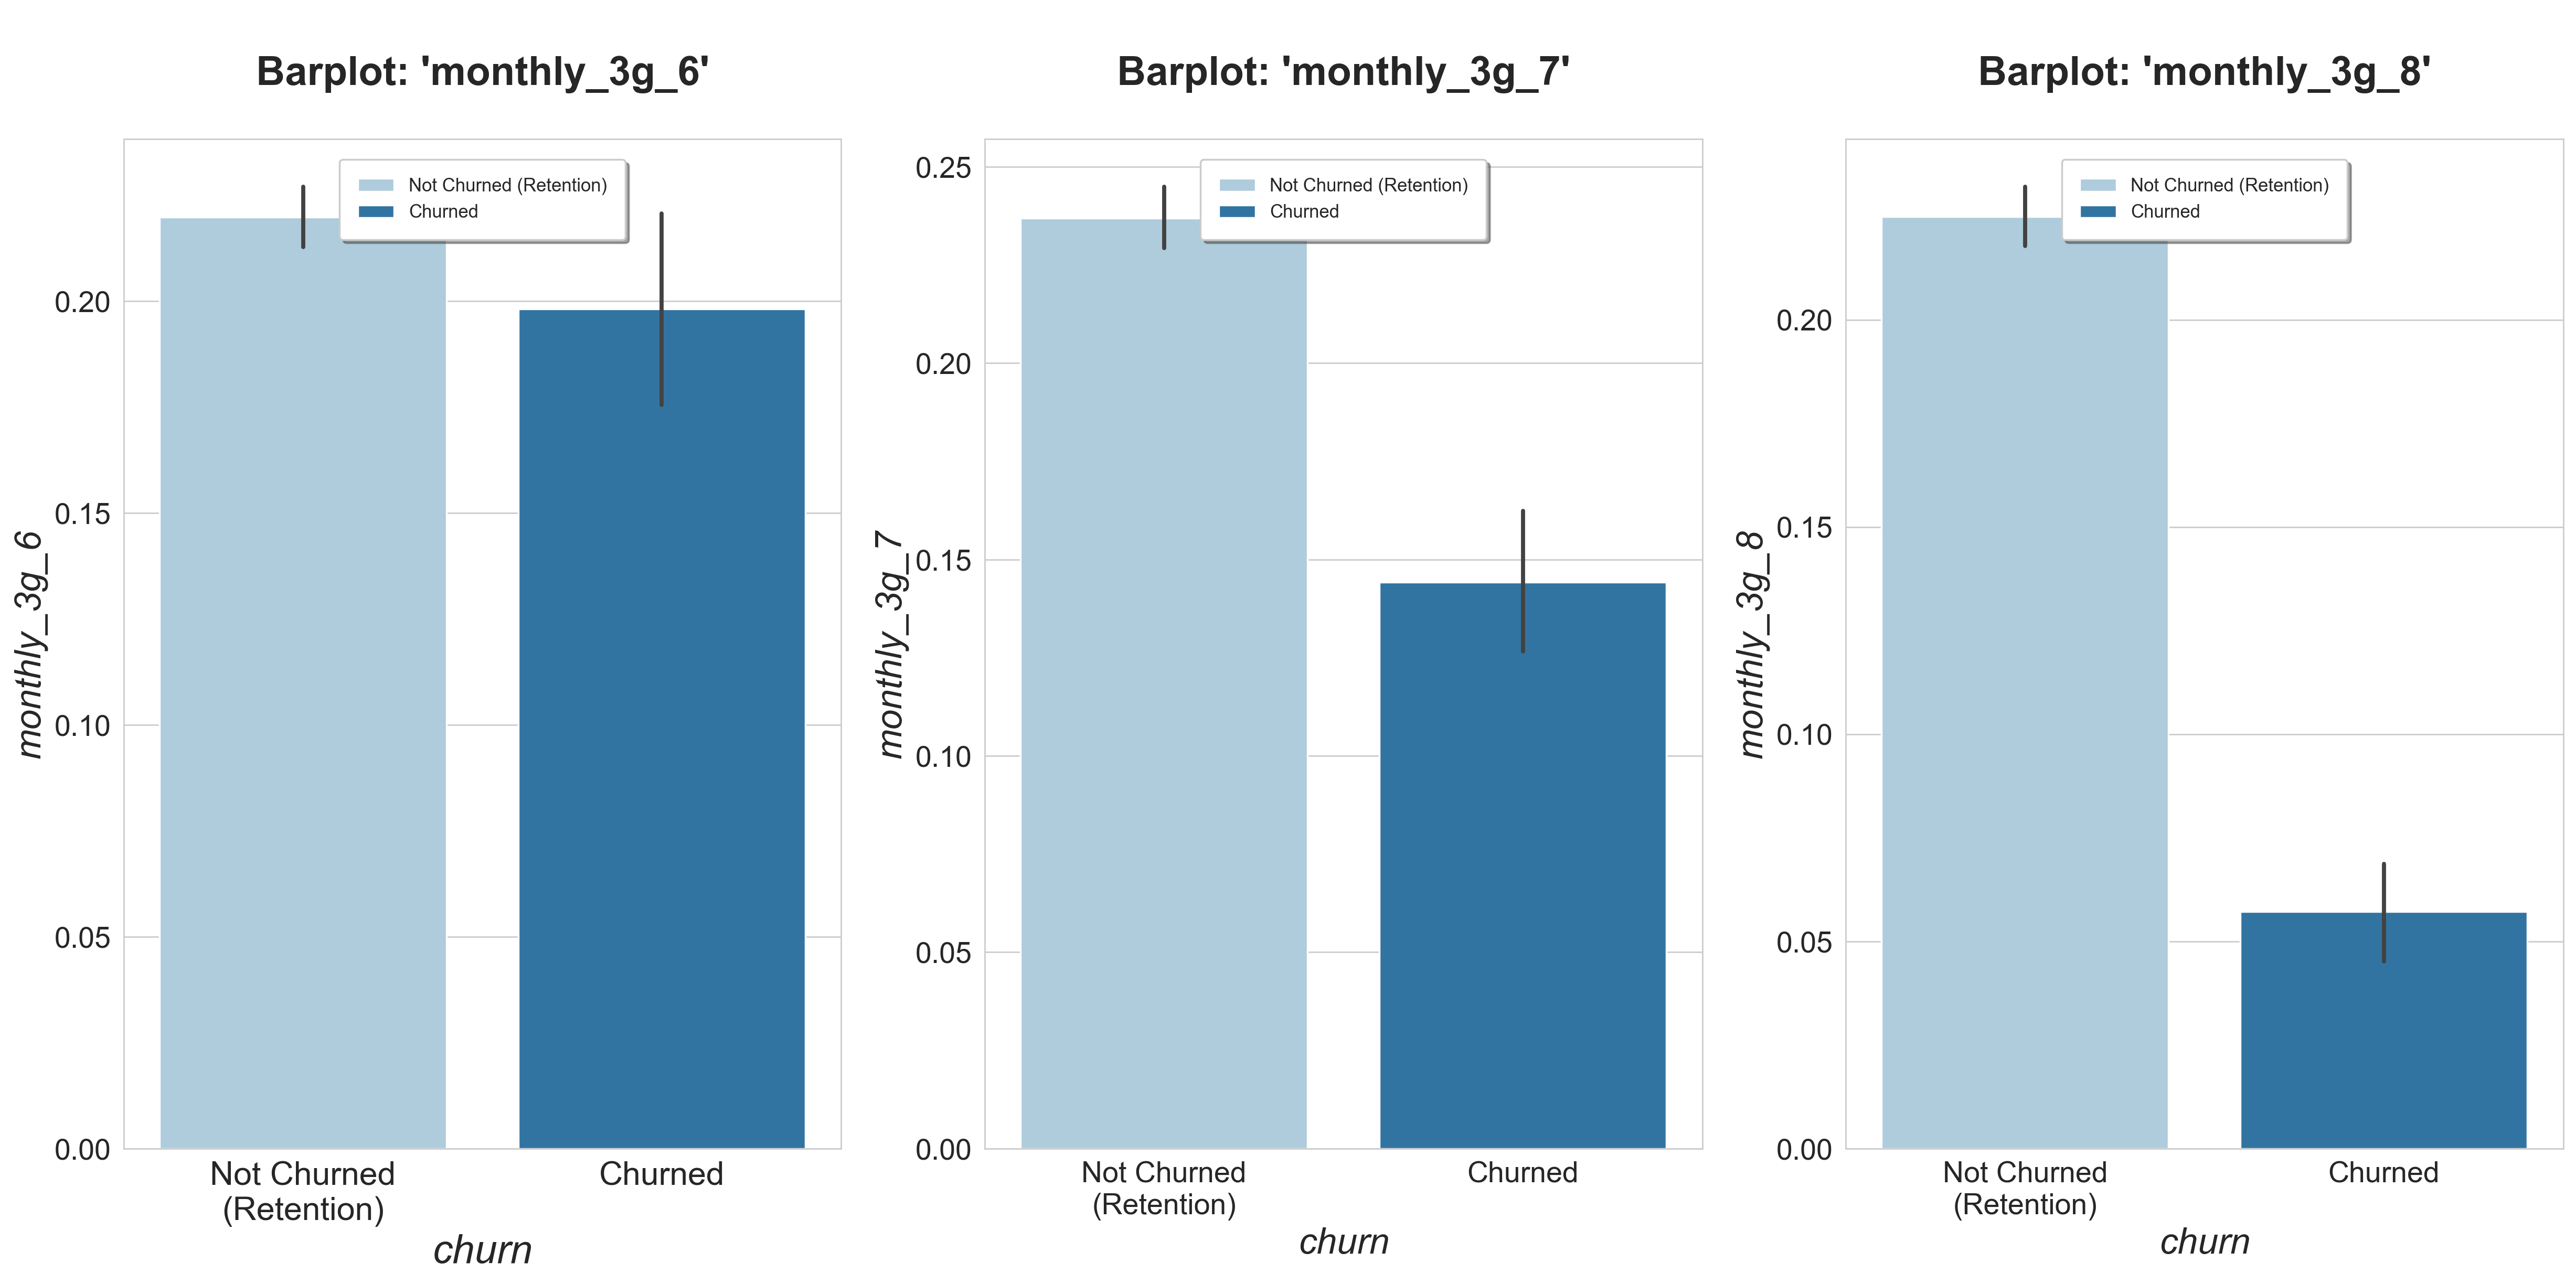

In [60]:
plot_barplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_barplots_6_7_8('monthly_3g')   #monthly_3g for all 3 

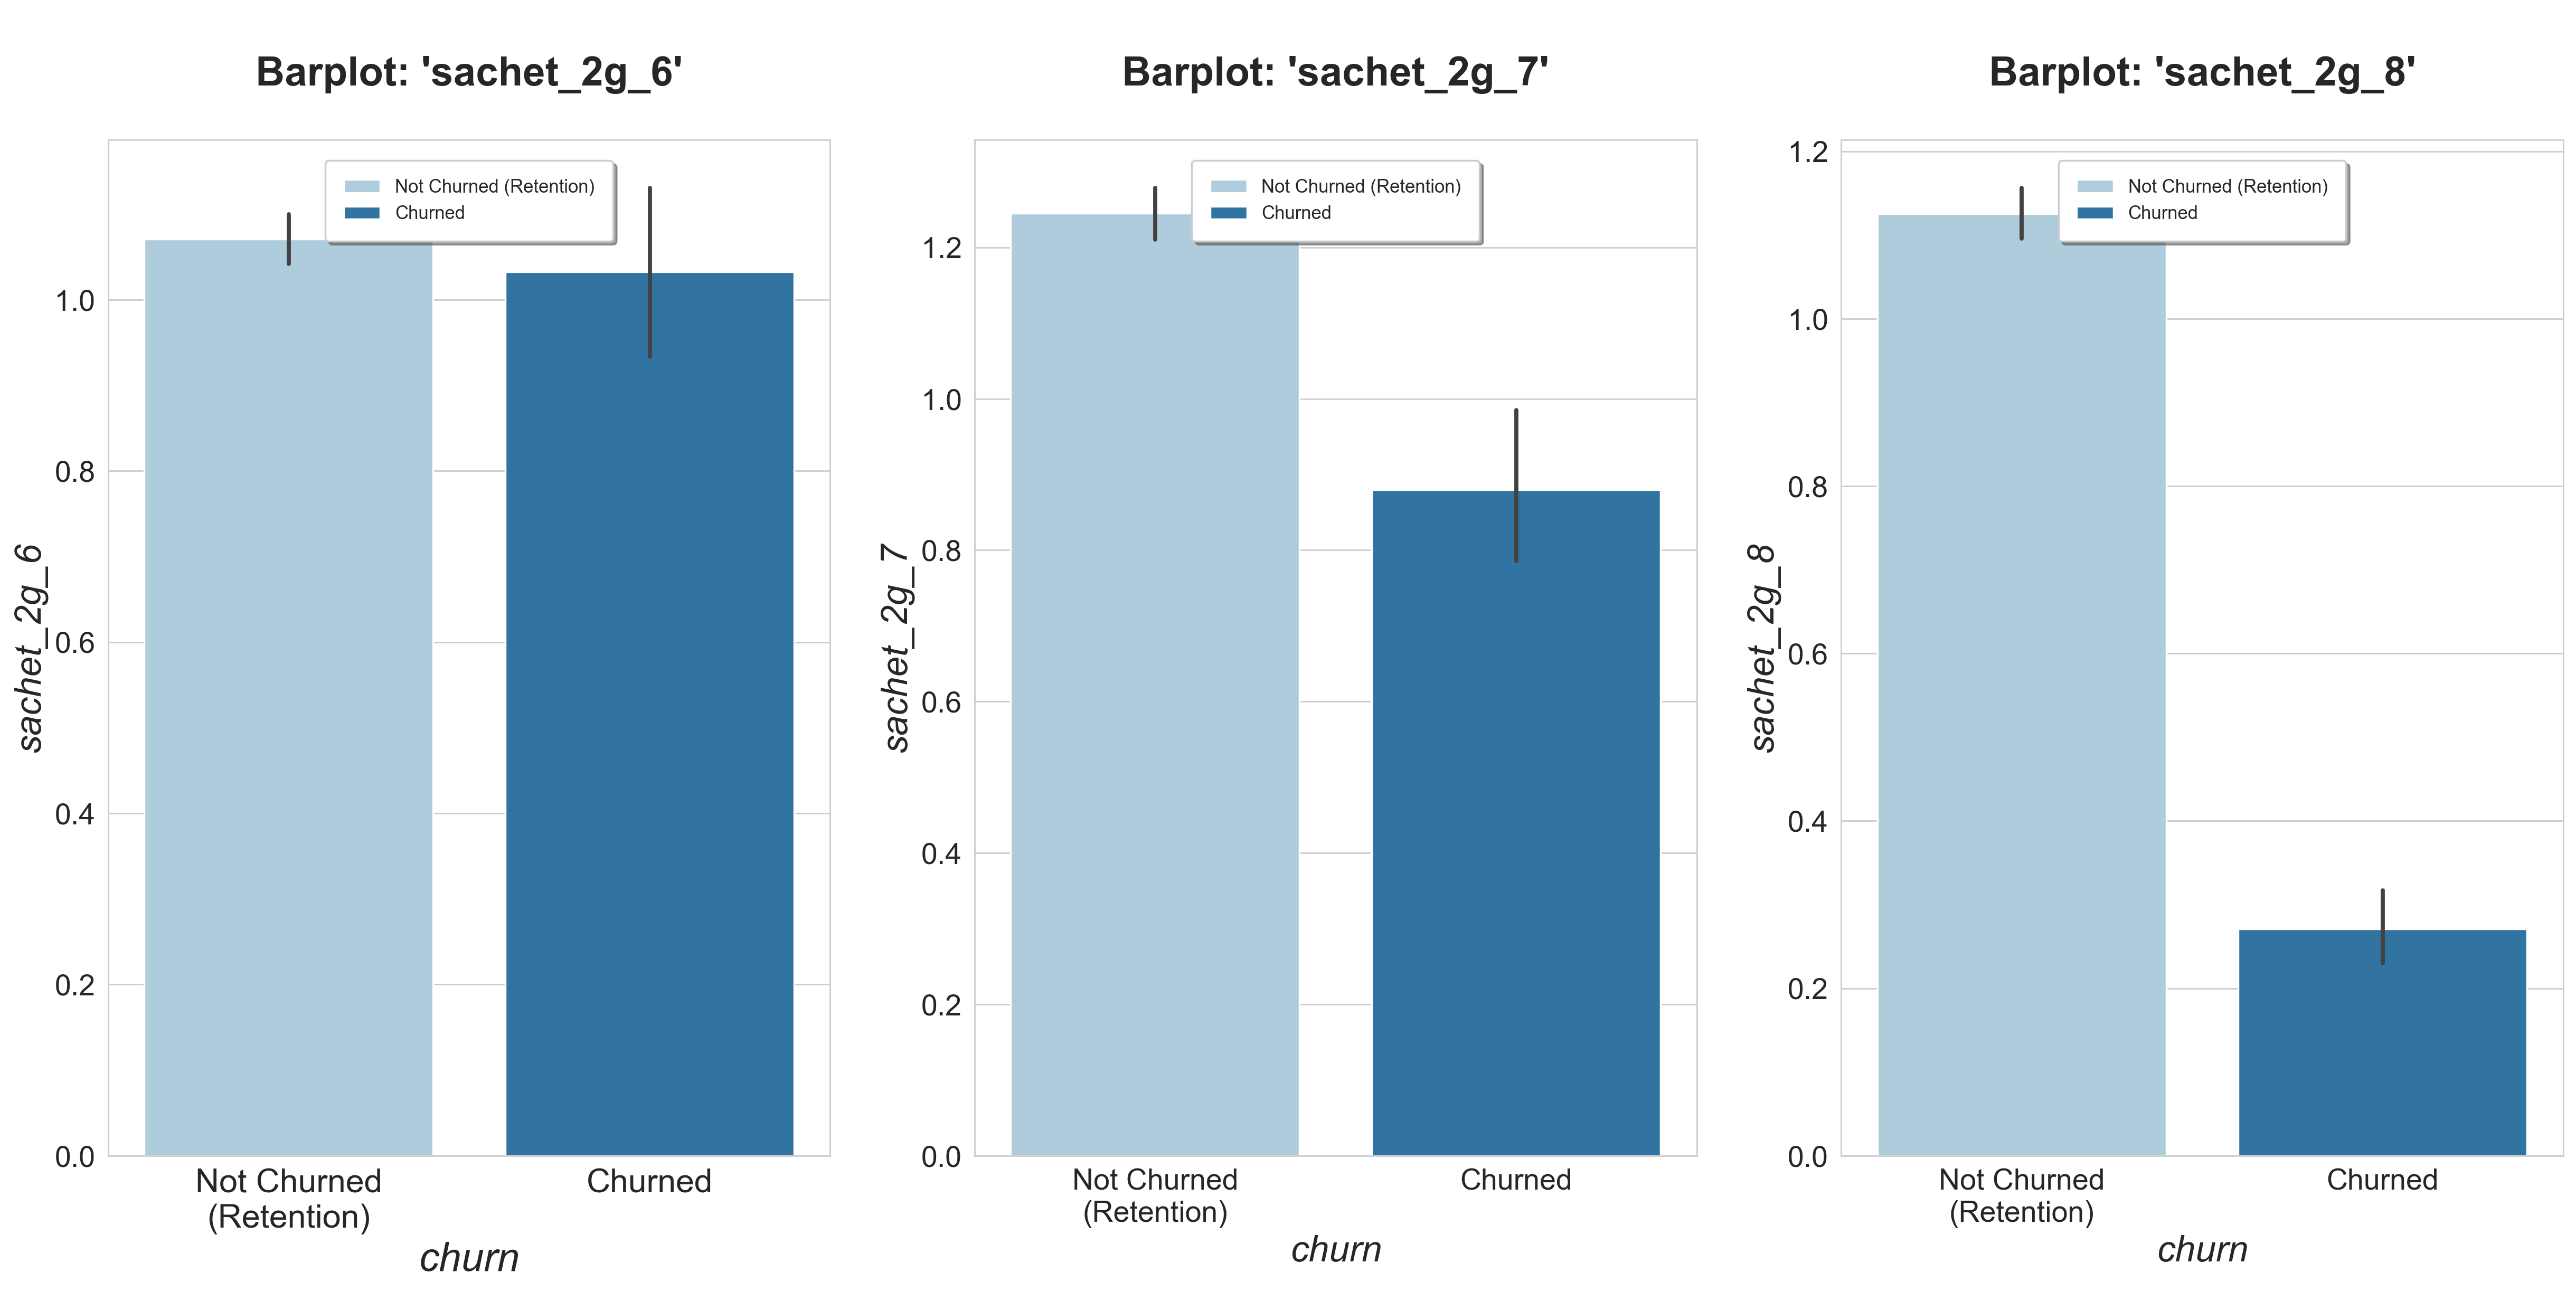

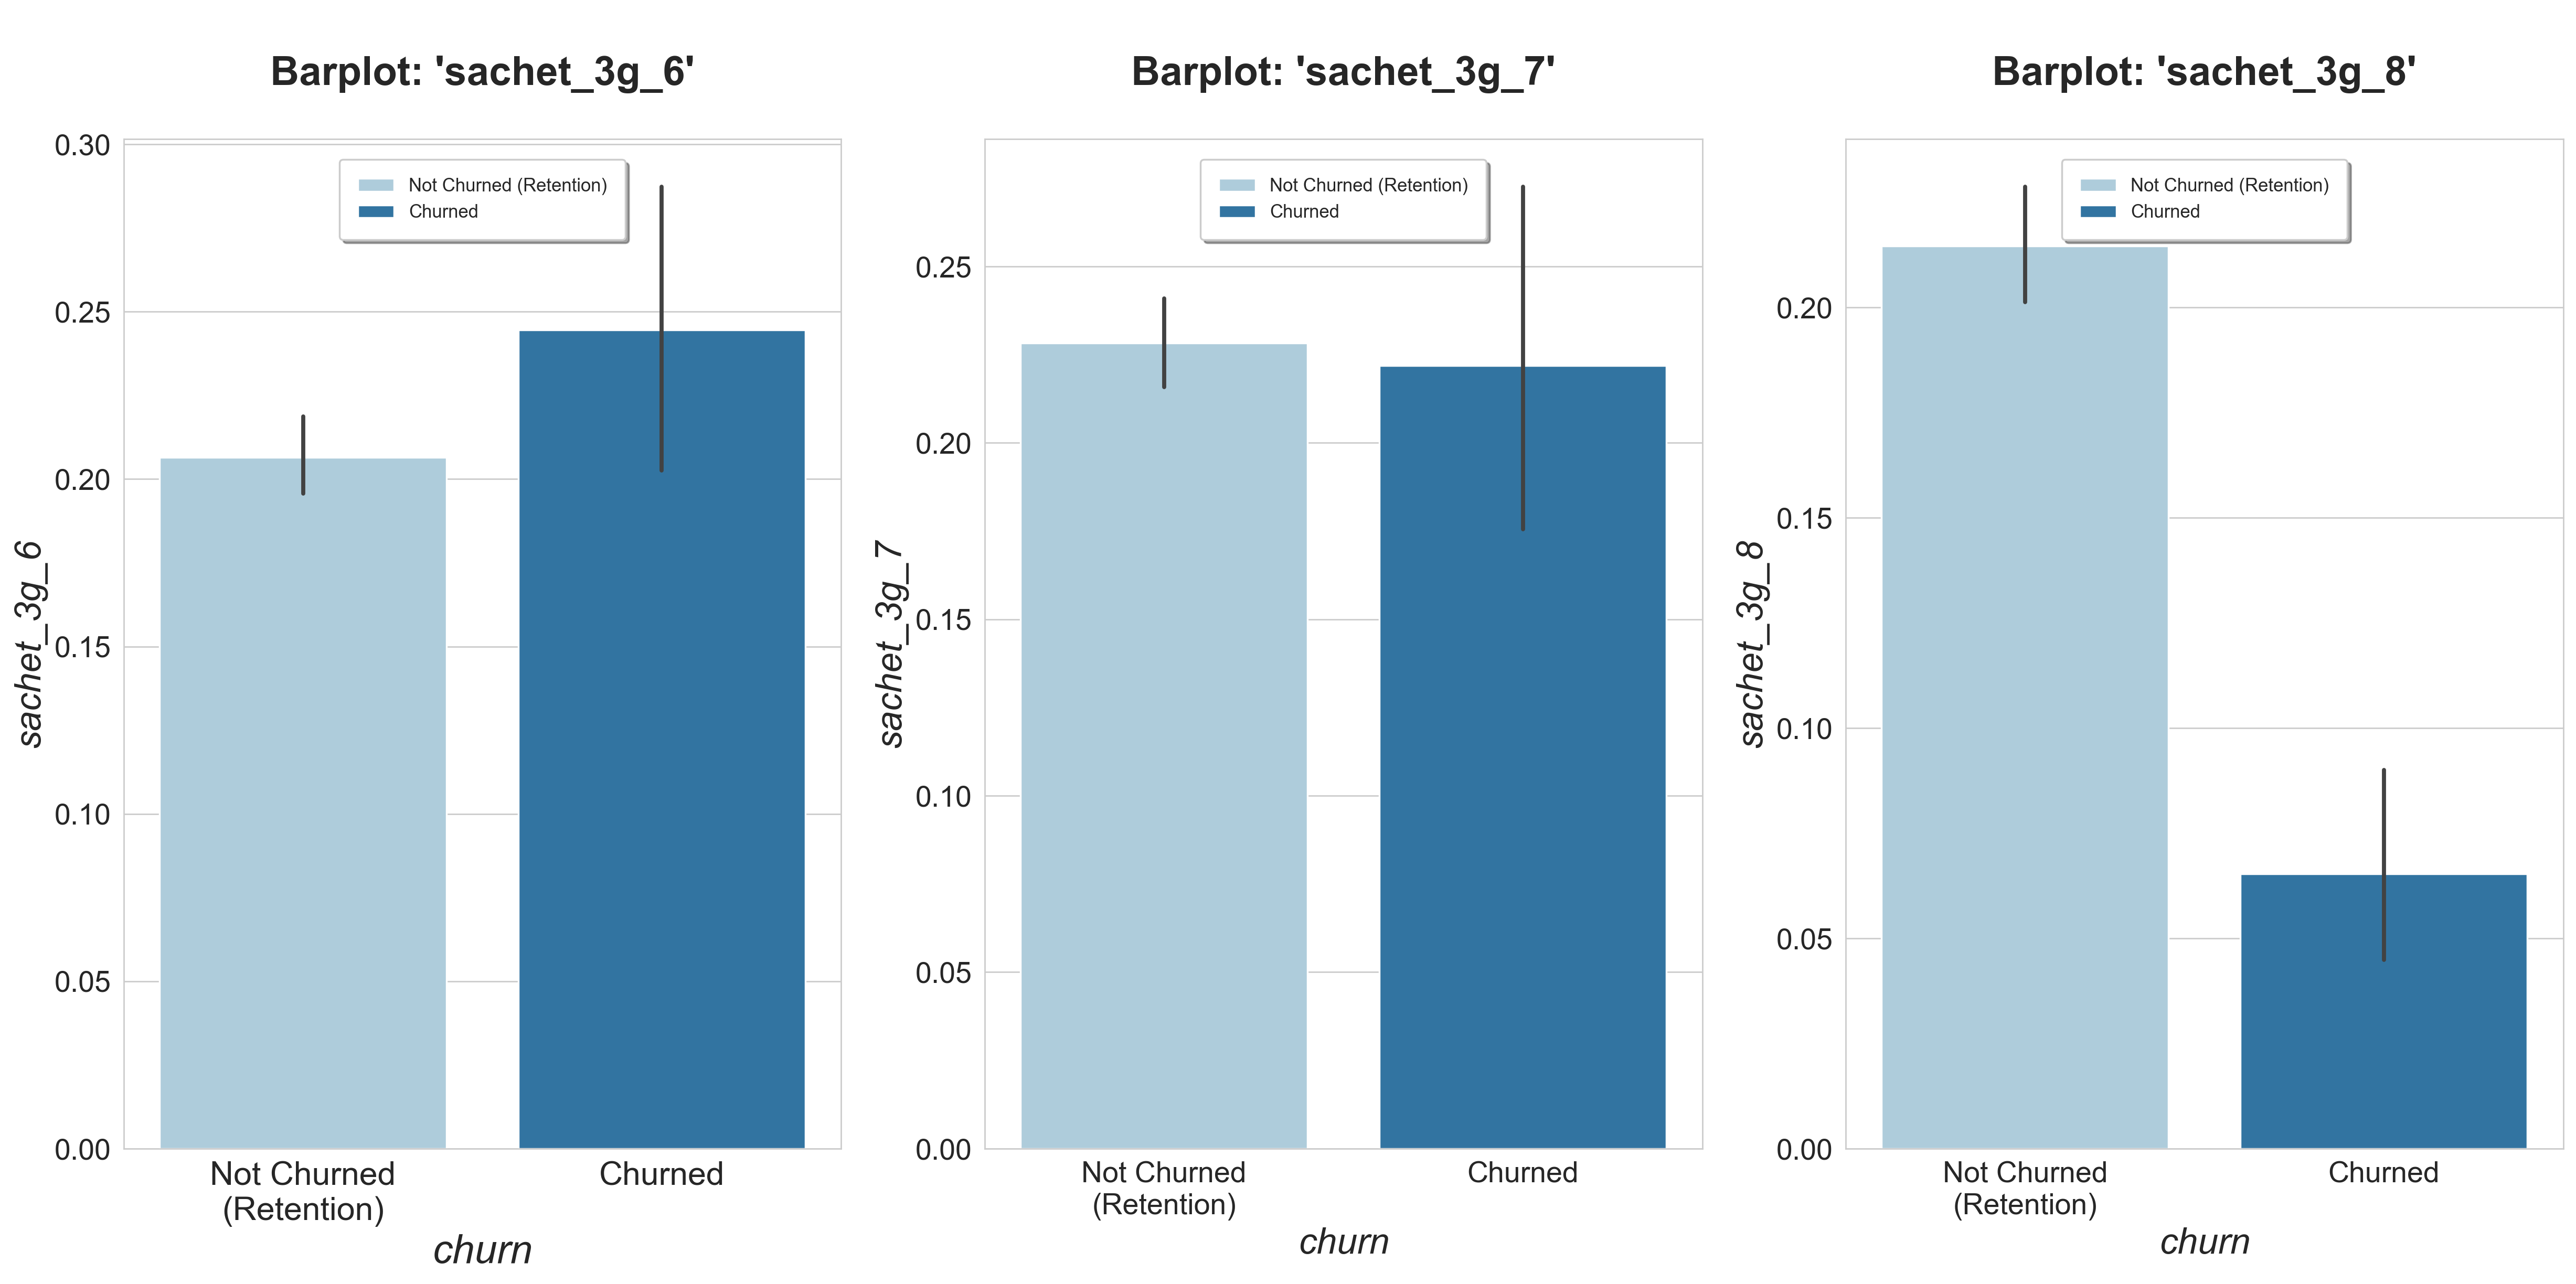

In [61]:
plot_barplots_6_7_8('sachet_2g')  #sachet_2g (service schemes with validity smaller than a month): for all 3 months
plot_barplots_6_7_8('sachet_3g')   #sachet_3g (service schemes with validity smaller than a month): for all 3 months

In [62]:
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [63]:
telecom_hv.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [64]:
vbc_cols_list = list(telecom_hv.columns[telecom_hv.columns.str.contains('vbc')])
vbc_cols_list

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

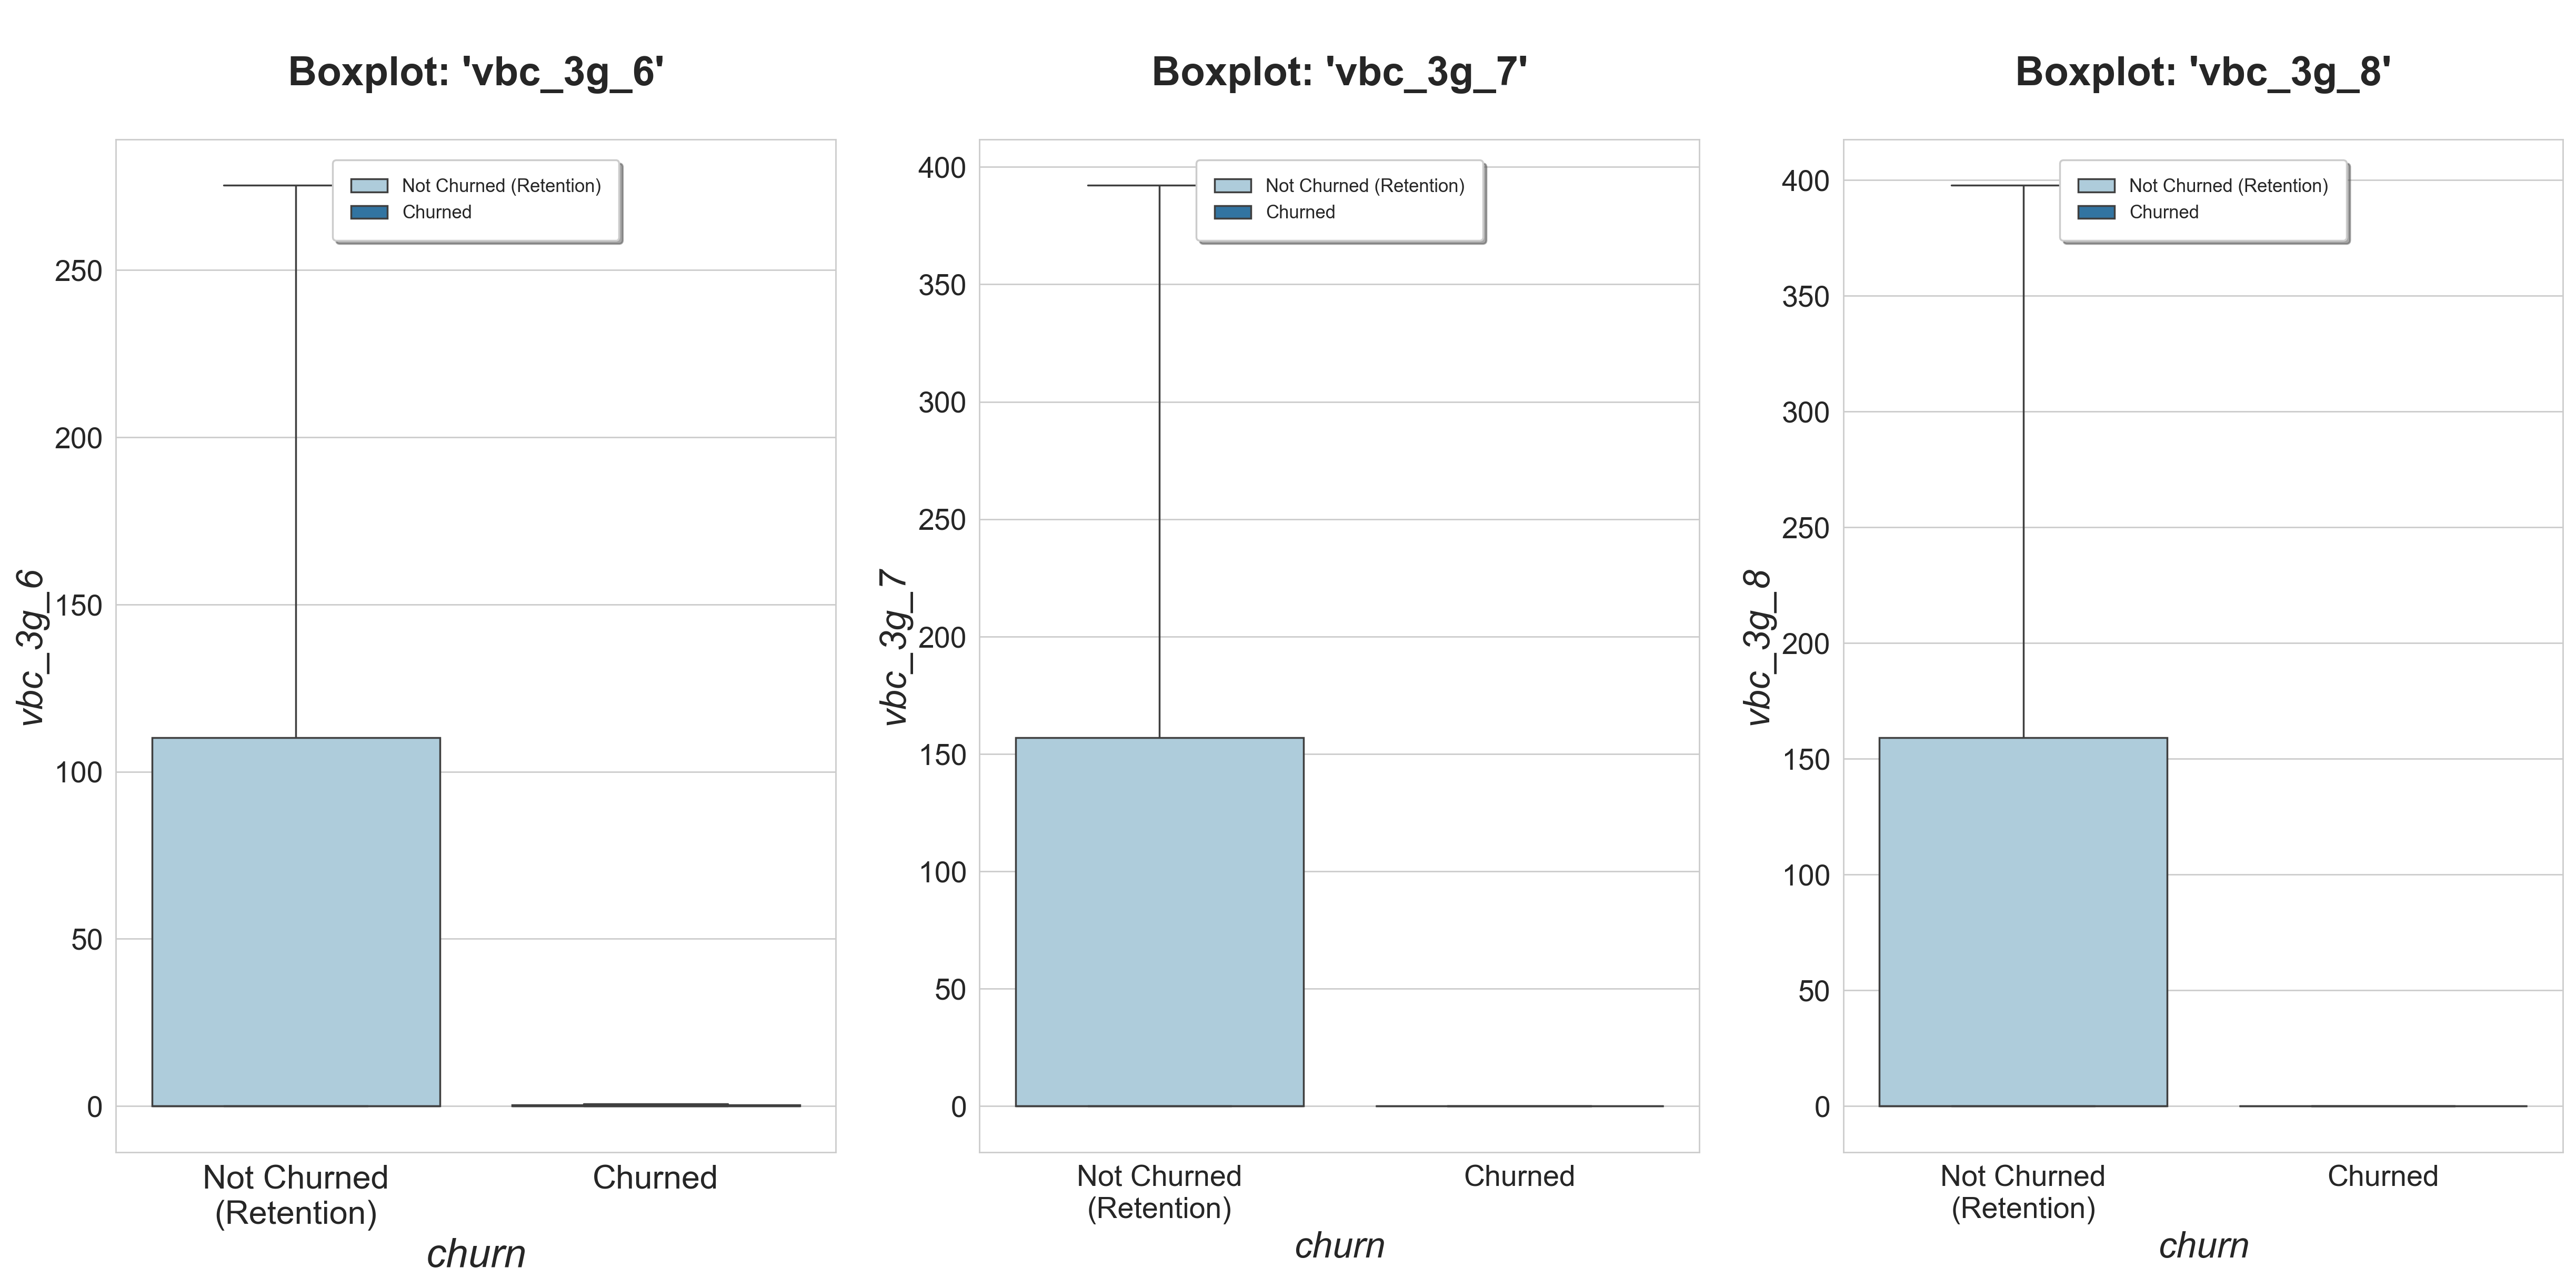

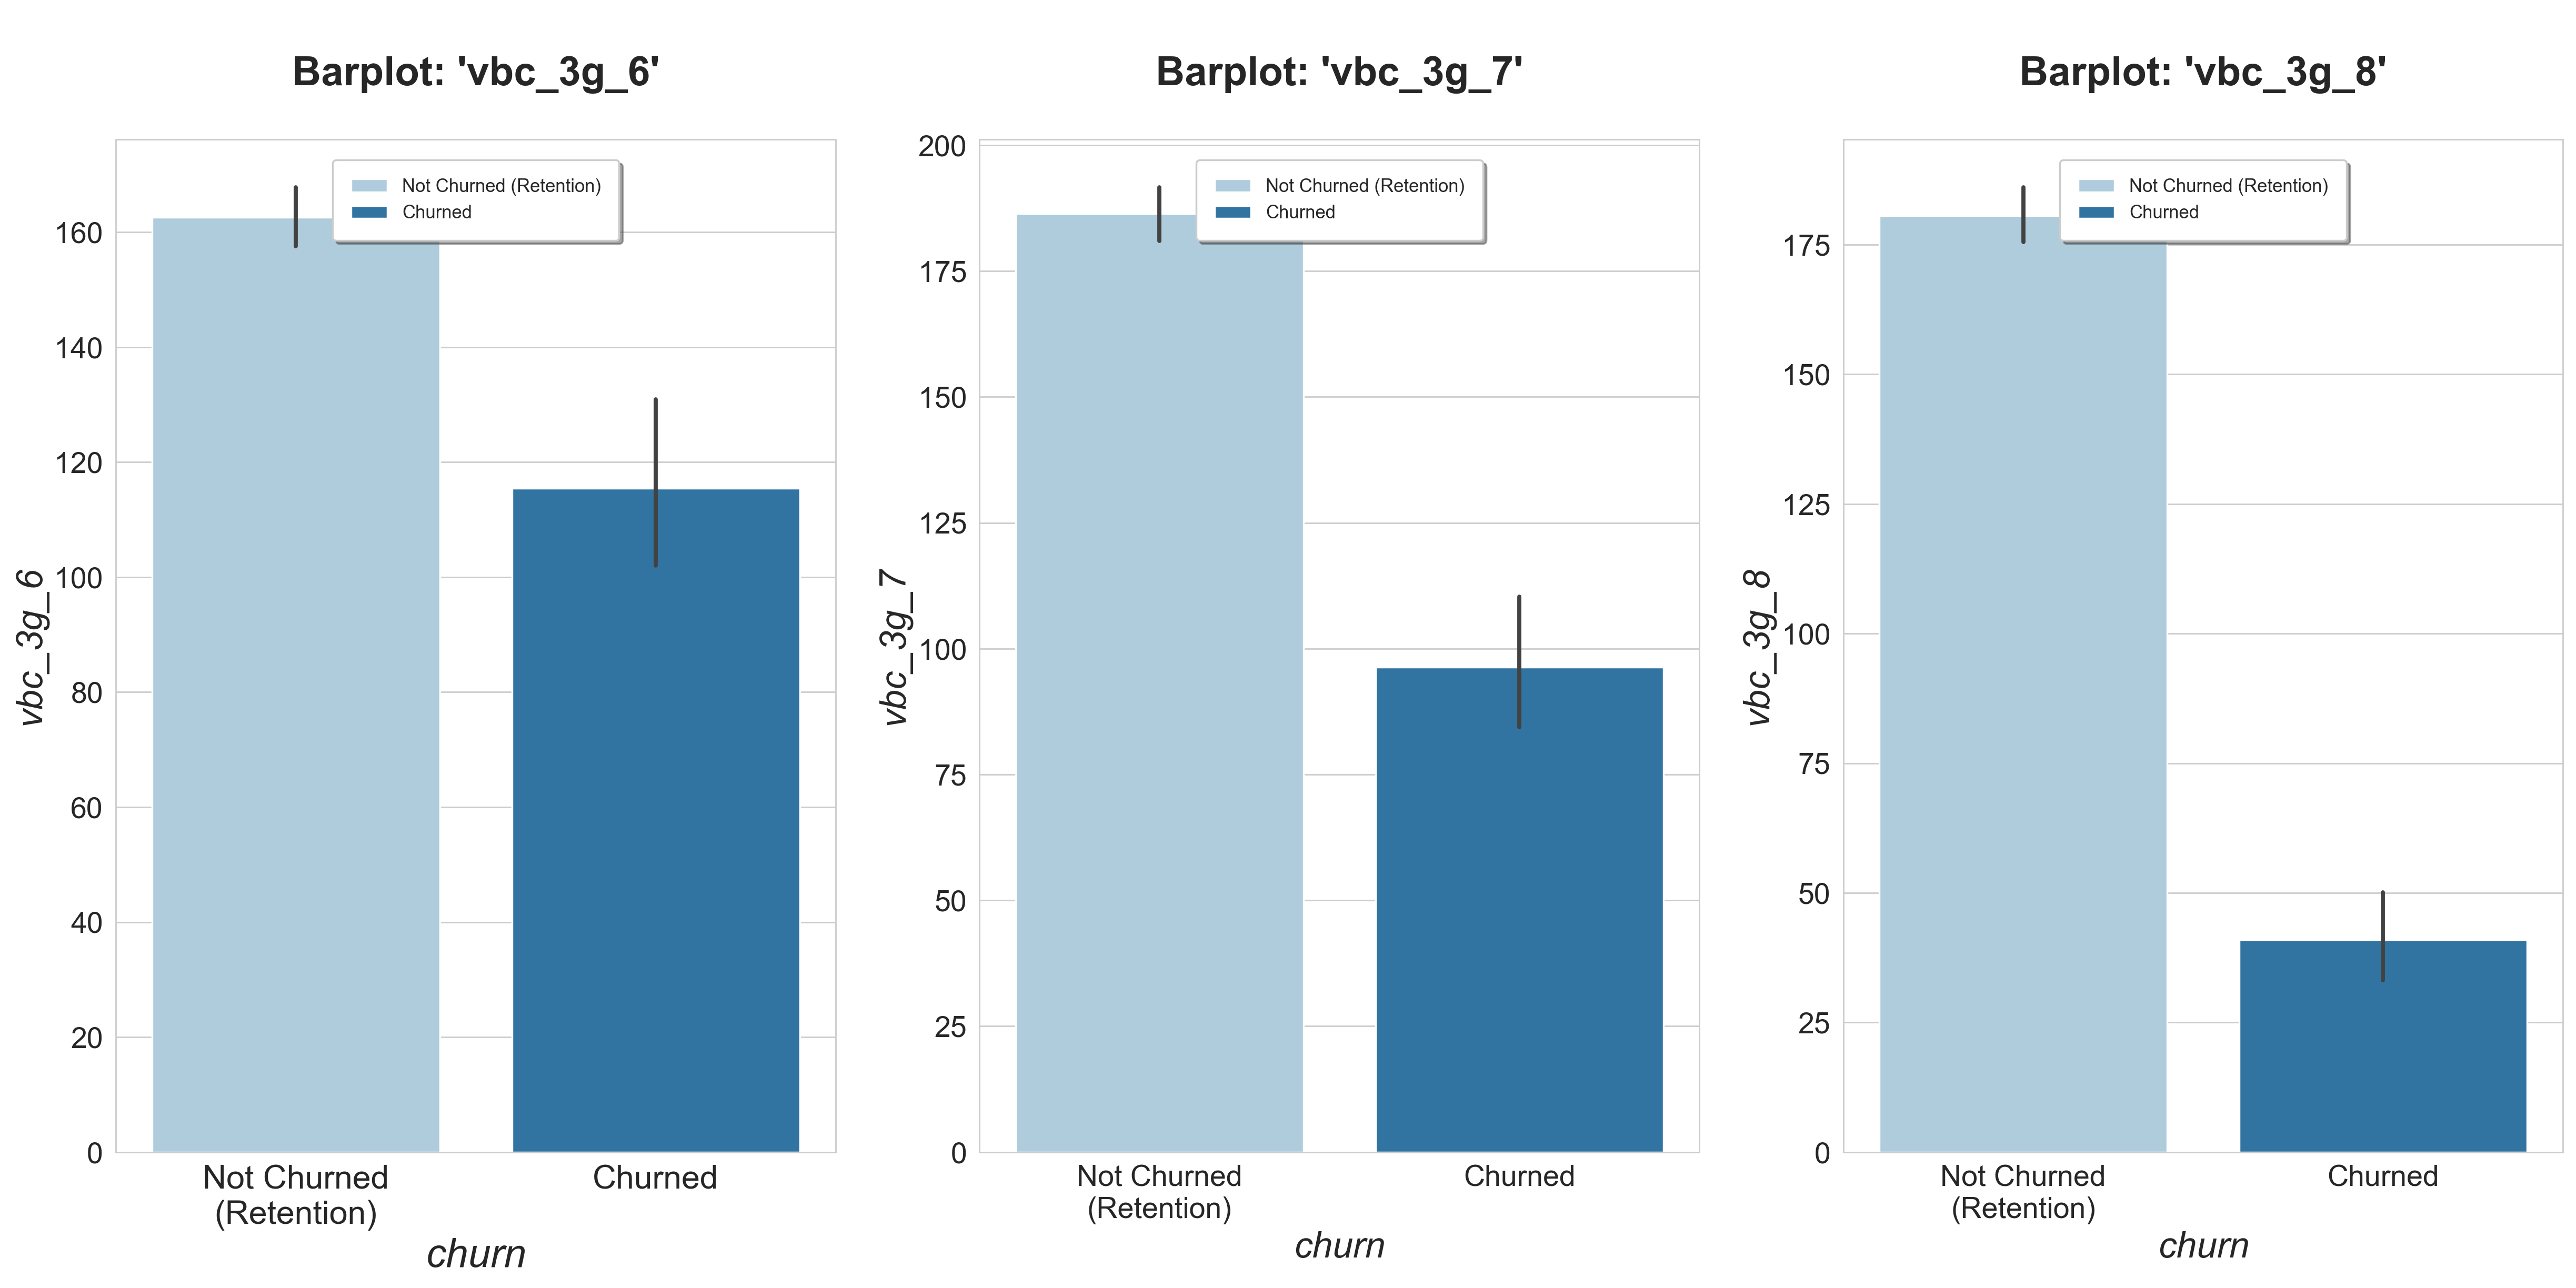

In [65]:
plot_boxplots_6_7_8('vbc_3g')
plot_barplots_6_7_8('vbc_3g')

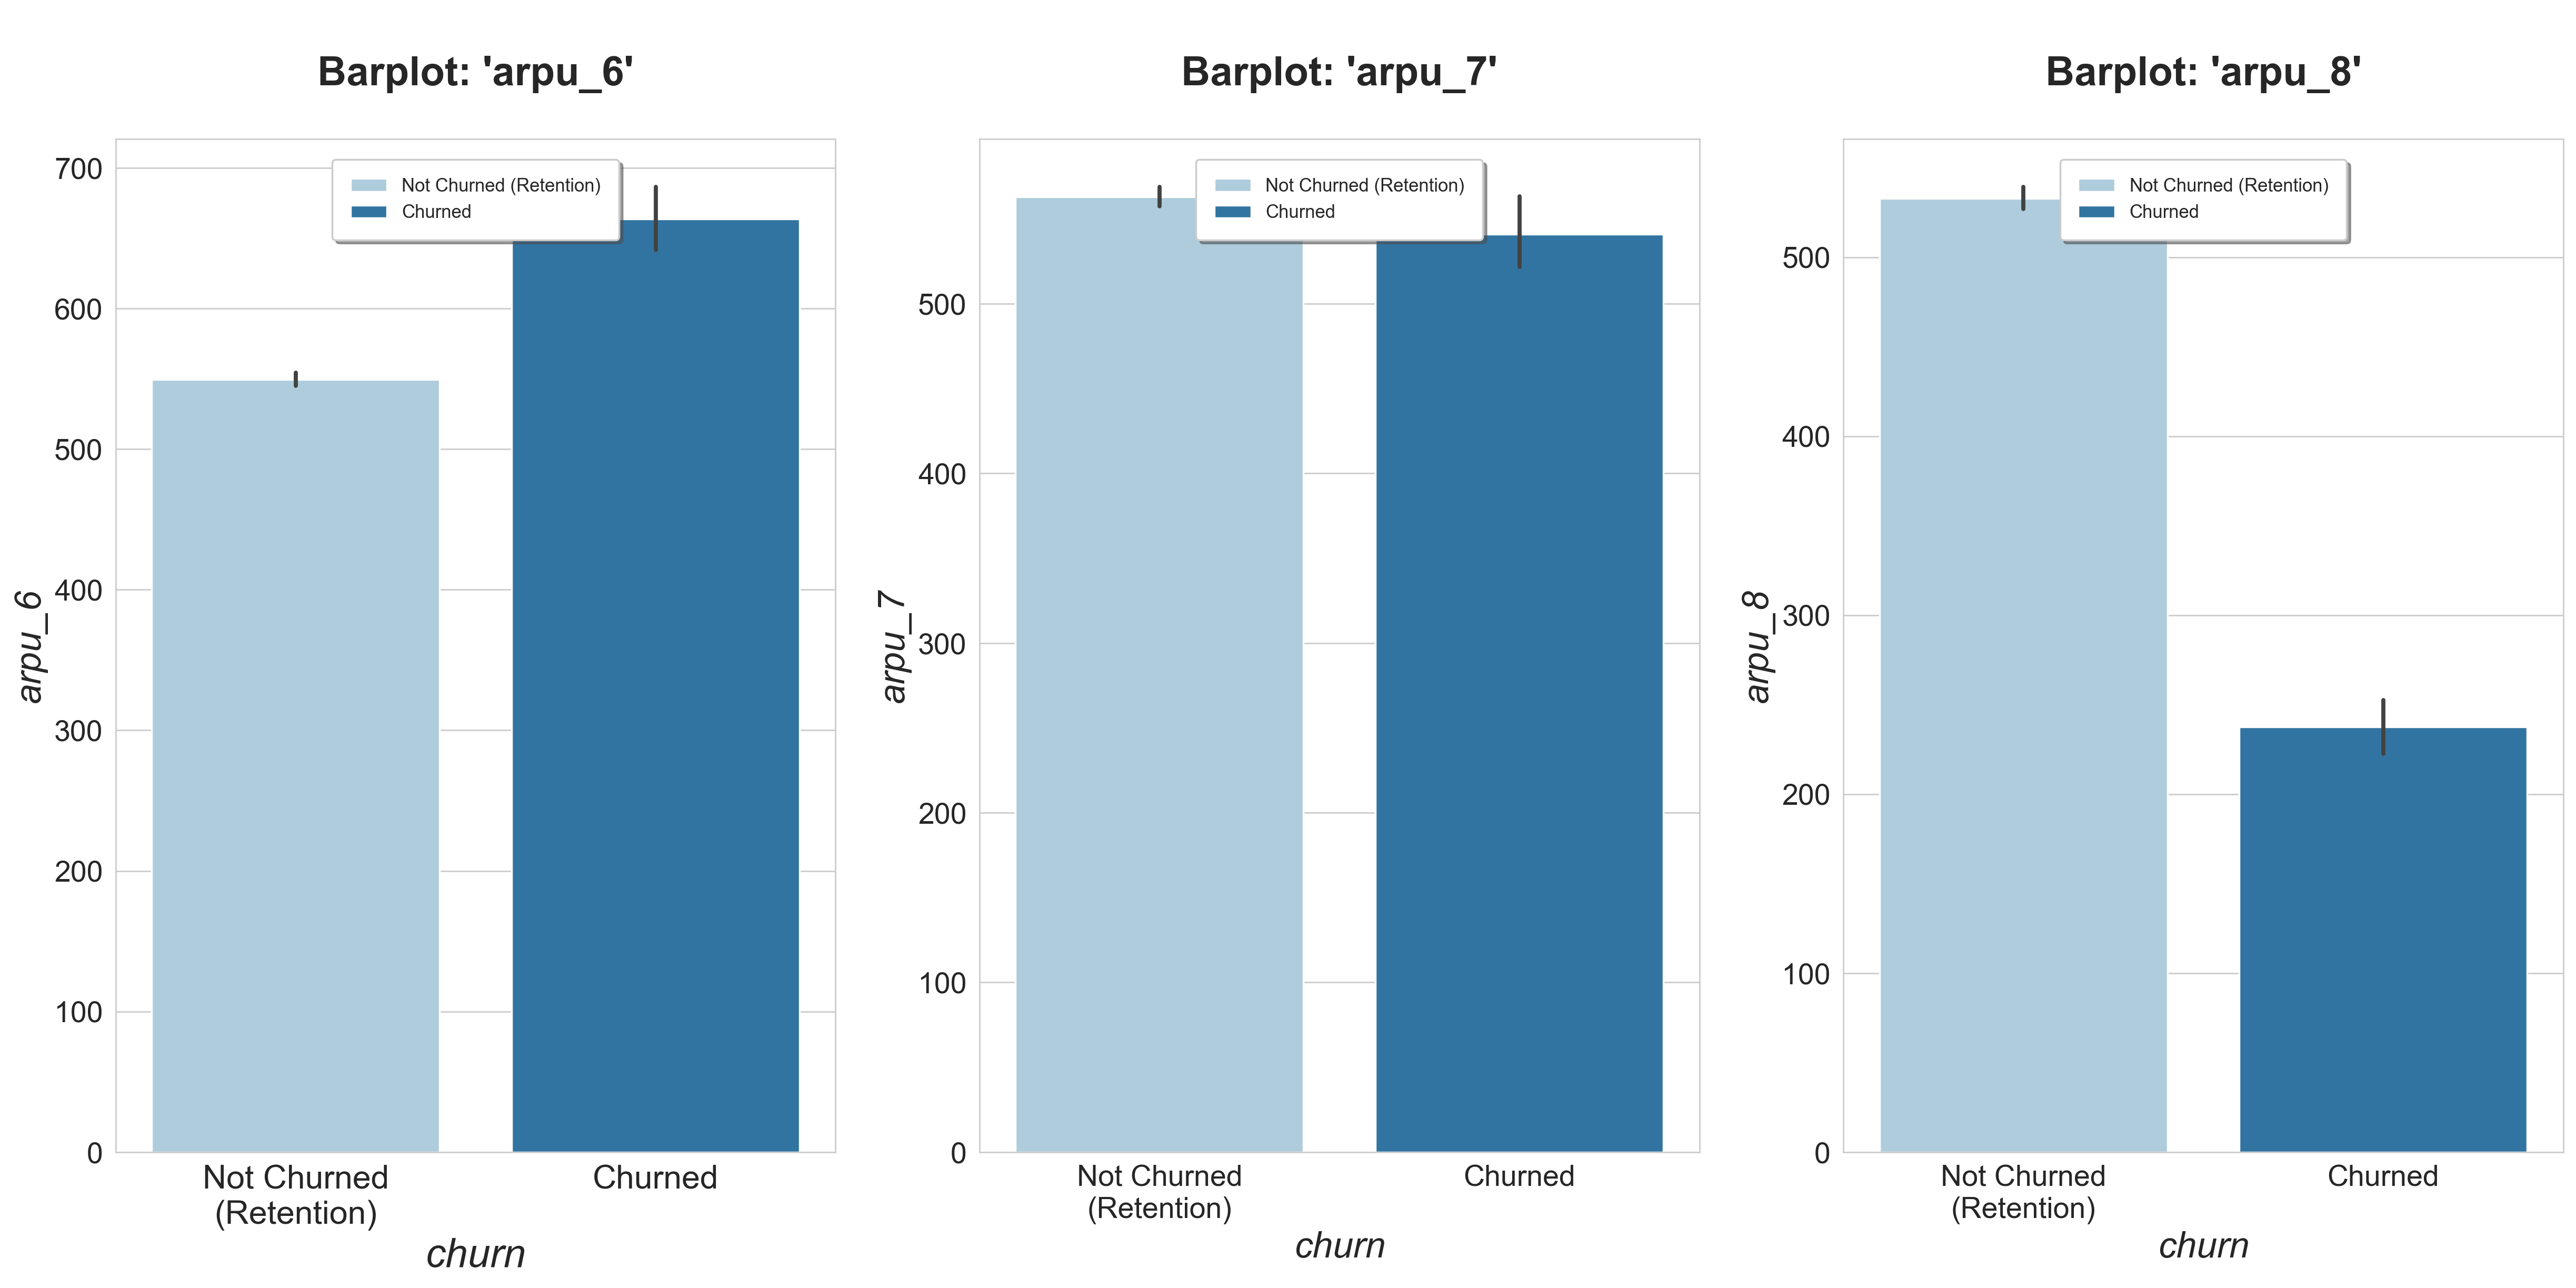

In [66]:
arpu_cols = telecom_hv.columns[telecom_hv.columns.str.contains('arpu_')]

##Plotting 'arpu_' barplots
plot_barplots_6_7_8('arpu')


In [67]:
mou_cols = telecom_hv.columns[telecom_hv.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [68]:
mou_cols_df = telecom_hv[mou_cols]
null_prcnt_df(mou_cols_df)

Column  Null Percentage
onnet_mou_6            onnet_mou_6         1.809502
onnet_mou_7            onnet_mou_7         1.789470
onnet_mou_8            onnet_mou_8         3.912797
offnet_mou_6          offnet_mou_6         1.809502
offnet_mou_7          offnet_mou_7         1.789470
offnet_mou_8          offnet_mou_8         3.912797
roam_ic_mou_6        roam_ic_mou_6         1.809502
roam_ic_mou_7        roam_ic_mou_7         1.789470
roam_ic_mou_8        roam_ic_mou_8         3.912797
roam_og_mou_6        roam_og_mou_6         1.809502
roam_og_mou_7        roam_og_mou_7         1.789470
roam_og_mou_8        roam_og_mou_8         3.912797
loc_og_t2t_mou_6  loc_og_t2t_mou_6         1.809502
loc_og_t2t_mou_7  loc_og_t2t_mou_7         1.789470
loc_og_t2t_mou_8  loc_og_t2t_mou_8         3.912797
loc_og_t2m_mou_6  loc_og_t2m_mou_6         1.809502
loc_og_t2m_mou_7  loc_og_t2m_mou_7         1.789470
loc_og_t2m_mou_8  loc_og_t2m_mou_8         3.912797
loc_og_t2f_mou_6  loc_og_t2f_mou_6         1.809502
loc_og_t2f_mou_7  loc_og_t2f_mou_7         1.789470
loc_og_t2f_mou_8  loc_og_t2f_mou_8         3.912797
loc_og_t2c_mou_6  loc_og_t2c_mou_6         1.809502
loc_og_t2c_mou_7  loc_og_t2c_mou_7         1.789470
loc_og_t2c_mou_8  loc_og_t2c_mou_8         3.912797
loc_og_mou_6          loc_og_mou_6         1.809502
loc_og_mou_7          loc_og_mou_7         1.789470
loc_og_mou_8          loc_og_mou_8         3.912797
std_og_t2t_mou_6  std_og_t2t_mou_6         1.809502
std_og_t2t_mou_7  std_og_t2t_mou_7         1.789470
std_og_t2t_mou_8  std_og_t2t_mou_8         3.912797
std_og_t2m_mou_6  std_og_t2m_mou_6         1.809502
std_og_t2m_mou_7  std_og_t2m_mou_7         1.789470
std_og_t2m_mou_8  std_og_t2m_mou_8         3.912797
std_og_t2f_mou_6  std_og_t2f_mou_6         1.809502
std_og_t2f_mou_7  std_og_t2f_mou_7         1.789470
std_og_t2f_mou_8  std_og_t2f_mou_8         3.912797
std_og_mou_6          std_og_mou_6         1.809502
std_og_mou_7          std_og_mou_7         1.789470
std_og_mou_8          std_og_mou_8         3.912797
isd_og_mou_6          isd_og_mou_6         1.809502
isd_og_mou_7          isd_og_mou_7         1.789470
isd_og_mou_8          isd_og_mou_8         3.912797
spl_og_mou_6          spl_og_mou_6         1.809502
spl_og_mou_7          spl_og_mou_7         1.789470
spl_og_mou_8          spl_og_mou_8         3.912797
total_og_mou_6      total_og_mou_6         0.000000
total_og_mou_7      total_og_mou_7         0.000000
total_og_mou_8      total_og_mou_8         0.000000
loc_ic_t2t_mou_6  loc_ic_t2t_mou_6         1.809502
loc_ic_t2t_mou_7  loc_ic_t2t_mou_7         1.789470
loc_ic_t2t_mou_8  loc_ic_t2t_mou_8         3.912797
loc_ic_t2m_mou_6  loc_ic_t2m_mou_6         1.809502
loc_ic_t2m_mou_7  loc_ic_t2m_mou_7         1.789470
loc_ic_t2m_mou_8  loc_ic_t2m_mou_8         3.912797
loc_ic_t2f_mou_6  loc_ic_t2f_mou_6         1.809502
loc_ic_t2f_mou_7  loc_ic_t2f_mou_7         1.789470
loc_ic_t2f_mou_8  loc_ic_t2f_mou_8         3.912797
loc_ic_mou_6          loc_ic_mou_6         1.809502
loc_ic_mou_7          loc_ic_mou_7         1.789470
loc_ic_mou_8          loc_ic_mou_8         3.912797
std_ic_t2t_mou_6  std_ic_t2t_mou_6         1.809502
std_ic_t2t_mou_7  std_ic_t2t_mou_7         1.789470
std_ic_t2t_mou_8  std_ic_t2t_mou_8         3.912797
std_ic_t2m_mou_6  std_ic_t2m_mou_6         1.809502
std_ic_t2m_mou_7  std_ic_t2m_mou_7         1.789470
std_ic_t2m_mou_8  std_ic_t2m_mou_8         3.912797
std_ic_t2f_mou_6  std_ic_t2f_mou_6         1.809502
std_ic_t2f_mou_7  std_ic_t2f_mou_7         1.789470
std_ic_t2f_mou_8  std_ic_t2f_mou_8         3.912797
std_ic_mou_6          std_ic_mou_6         1.809502
std_ic_mou_7          std_ic_mou_7         1.789470
std_ic_mou_8          std_ic_mou_8         3.912797
total_ic_mou_6      total_ic_mou_6         0.000000
total_ic_mou_7      total_ic_mou_7         0.000000
total_ic_mou_8      total_ic_mou_8         0.000000
spl_ic_mou_6          spl_ic_mou_6         1.809502
spl_ic_mou_7          sp

In [69]:
telecom_hv[mou_cols] = telecom_hv[mou_cols].replace(np.nan, 0)

In [70]:
mou_cols_df = telecom_hv[mou_cols]
null_prcnt_df(mou_cols_df)

Column  Null Percentage
onnet_mou_6            onnet_mou_6              0.0
onnet_mou_7            onnet_mou_7              0.0
onnet_mou_8            onnet_mou_8              0.0
offnet_mou_6          offnet_mou_6              0.0
offnet_mou_7          offnet_mou_7              0.0
offnet_mou_8          offnet_mou_8              0.0
roam_ic_mou_6        roam_ic_mou_6              0.0
roam_ic_mou_7        roam_ic_mou_7              0.0
roam_ic_mou_8        roam_ic_mou_8              0.0
roam_og_mou_6        roam_og_mou_6              0.0
roam_og_mou_7        roam_og_mou_7              0.0
roam_og_mou_8        roam_og_mou_8              0.0
loc_og_t2t_mou_6  loc_og_t2t_mou_6              0.0
loc_og_t2t_mou_7  loc_og_t2t_mou_7              0.0
loc_og_t2t_mou_8  loc_og_t2t_mou_8              0.0
loc_og_t2m_mou_6  loc_og_t2m_mou_6              0.0
loc_og_t2m_mou_7  loc_og_t2m_mou_7              0.0
loc_og_t2m_mou_8  loc_og_t2m_mou_8              0.0
loc_og_t2f_mou_6  loc_og_t2f_mou_6              0.0
loc_og_t2f_mou_7  loc_og_t2f_mou_7              0.0
loc_og_t2f_mou_8  loc_og_t2f_mou_8              0.0
loc_og_t2c_mou_6  loc_og_t2c_mou_6              0.0
loc_og_t2c_mou_7  loc_og_t2c_mou_7              0.0
loc_og_t2c_mou_8  loc_og_t2c_mou_8              0.0
loc_og_mou_6          loc_og_mou_6              0.0
loc_og_mou_7          loc_og_mou_7              0.0
loc_og_mou_8          loc_og_mou_8              0.0
std_og_t2t_mou_6  std_og_t2t_mou_6              0.0
std_og_t2t_mou_7  std_og_t2t_mou_7              0.0
std_og_t2t_mou_8  std_og_t2t_mou_8              0.0
std_og_t2m_mou_6  std_og_t2m_mou_6              0.0
std_og_t2m_mou_7  std_og_t2m_mou_7              0.0
std_og_t2m_mou_8  std_og_t2m_mou_8              0.0
std_og_t2f_mou_6  std_og_t2f_mou_6              0.0
std_og_t2f_mou_7  std_og_t2f_mou_7              0.0
std_og_t2f_mou_8  std_og_t2f_mou_8              0.0
std_og_mou_6          std_og_mou_6              0.0
std_og_mou_7          std_og_mou_7              0.0
std_og_mou_8          std_og_mou_8              0.0
isd_og_mou_6          isd_og_mou_6              0.0
isd_og_mou_7          isd_og_mou_7              0.0
isd_og_mou_8          isd_og_mou_8              0.0
spl_og_mou_6          spl_og_mou_6              0.0
spl_og_mou_7          spl_og_mou_7              0.0
spl_og_mou_8          spl_og_mou_8              0.0
total_og_mou_6      total_og_mou_6              0.0
total_og_mou_7      total_og_mou_7              0.0
total_og_mou_8      total_og_mou_8              0.0
loc_ic_t2t_mou_6  loc_ic_t2t_mou_6              0.0
loc_ic_t2t_mou_7  loc_ic_t2t_mou_7              0.0
loc_ic_t2t_mou_8  loc_ic_t2t_mou_8              0.0
loc_ic_t2m_mou_6  loc_ic_t2m_mou_6              0.0
loc_ic_t2m_mou_7  loc_ic_t2m_mou_7              0.0
loc_ic_t2m_mou_8  loc_ic_t2m_mou_8              0.0
loc_ic_t2f_mou_6  loc_ic_t2f_mou_6              0.0
loc_ic_t2f_mou_7  loc_ic_t2f_mou_7              0.0
loc_ic_t2f_mou_8  loc_ic_t2f_mou_8              0.0
loc_ic_mou_6          loc_ic_mou_6              0.0
loc_ic_mou_7          loc_ic_mou_7              0.0
loc_ic_mou_8          loc_ic_mou_8              0.0
std_ic_t2t_mou_6  std_ic_t2t_mou_6              0.0
std_ic_t2t_mou_7  std_ic_t2t_mou_7              0.0
std_ic_t2t_mou_8  std_ic_t2t_mou_8              0.0
std_ic_t2m_mou_6  std_ic_t2m_mou_6              0.0
std_ic_t2m_mou_7  std_ic_t2m_mou_7              0.0
std_ic_t2m_mou_8  std_ic_t2m_mou_8              0.0
std_ic_t2f_mou_6  std_ic_t2f_mou_6              0.0
std_ic_t2f_mou_7  std_ic_t2f_mou_7              0.0
std_ic_t2f_mou_8  std_ic_t2f_mou_8              0.0
std_ic_mou_6          std_ic_mou_6              0.0
std_ic_mou_7          std_ic_mou_7              0.0
std_ic_mou_8          std_ic_mou_8              0.0
total_ic_mou_6      total_ic_mou_6              0.0
total_ic_mou_7      total_ic_mou_7              0.0
total_ic_mou_8      total_ic_mou_8              0.0
spl_ic_mou_6          spl_ic_mou_6              0.0
spl_ic_mou_7          sp

In [71]:
ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_ic_.*mou_6')])
ic_mou_features

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [72]:
telecom_hv[ic_mou_features].describe()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       16.124001         65.508916        150.474219         15.291721   
std        76.344227        163.855393        219.321437         45.785255   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          6.100000         28.090000          0.000000   
50%         0.000000         25.080000         84.110000          1.840000   
75%         0.000000         67.480000        188.740000         11.980000   
max      2613.310000       6351.440000       4693.860000       1678.410000   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
count  29953.000000      29953.000000      29953.000000      29953.000000   
mean     231.284489         14.896832         29.212448          2.698829   
std      315.005426         77.750215         98.279300         19.114766   
min        0.000000          0.000000          0.000000          0.000000   
25%       47.910000          0.000000          0.000000          0.000000   
50%      134.560000          0.380000          5.000000          0.000000   
75%      297.260000          8.190000         23.630000          0.110000   
max     7454.630000       5459.560000       4630.230000       1351.110000   

       std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  
count  29953.000000    29953.000000  29953.000000  29953.000000  
mean      46.811695      290.121569      0.061047     10.800999  
std      137.597749      365.739944      0.188124     76.789627  
min        0.000000        0.000000      0.000000      0.000000  
25%        1.030000       72.890000      0.000000      0.000000  
50%       11.410000      183.780000      0.000000      0.000000  
75%       41.490000      372.160000      0.000000      0.000000  
max     5459.630000     7716.140000     19.760000   6789.410000

<Figure size 1440x1200 with 0 Axes>

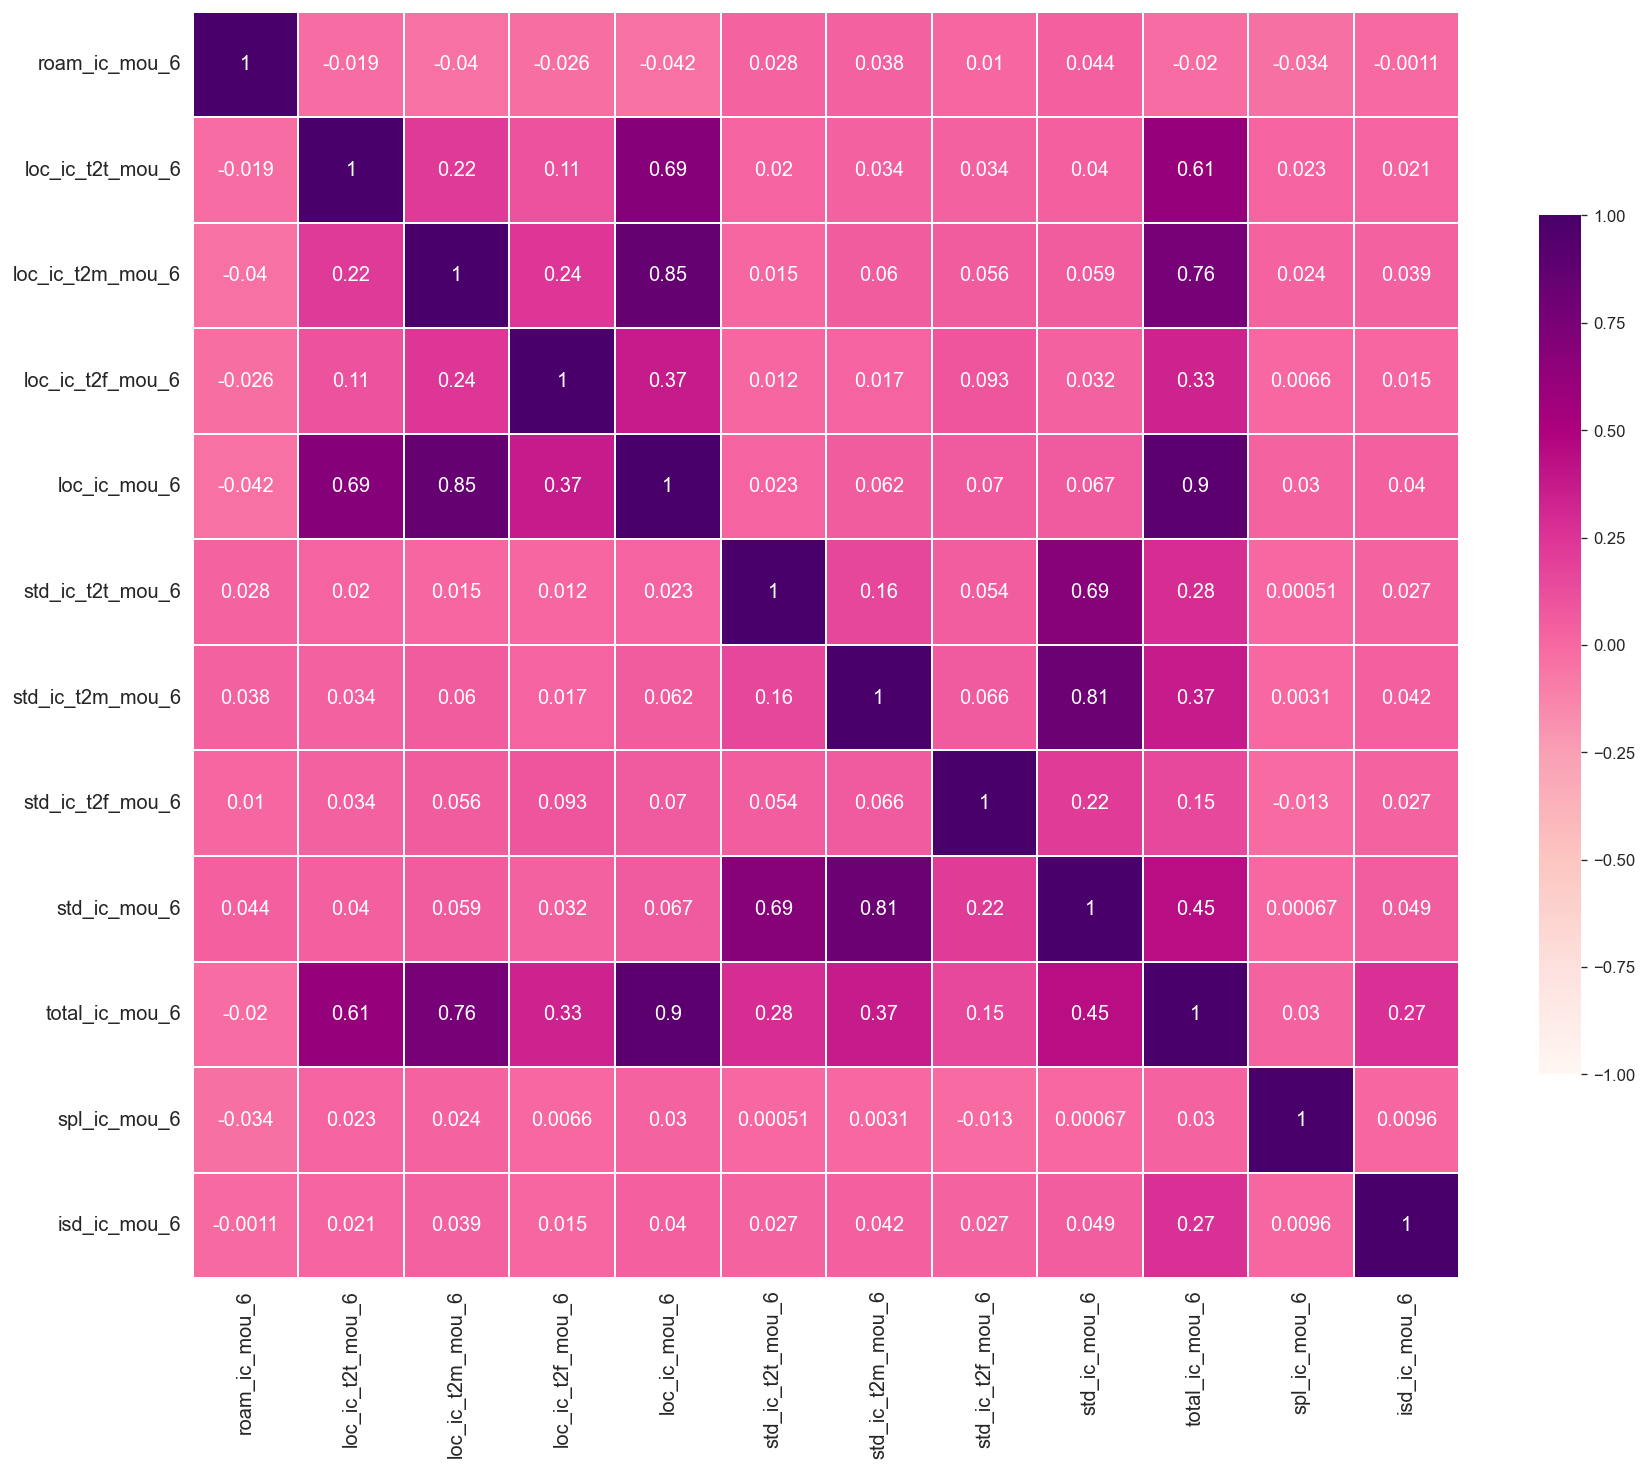

In [73]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_hv[ic_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [74]:
##Let's check for a record (i.e. index 8: example)

print("'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'")
print(telecom_hv.loc[8,'loc_ic_mou_6'],"==",telecom_hv.loc[8,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())

print("\n'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'")
print(telecom_hv.loc[8,'std_ic_mou_6'],"==",telecom_hv.loc[8,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

print("\n'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'")
print(telecom_hv.loc[8,'total_ic_mou_6'],"==",telecom_hv.loc[8,['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6', 'spl_ic_mou_6']].sum())

'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'
81.43 == 81.42

'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'
22.43 == 22.43

'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'
103.86 == 103.86000000000001


In [75]:
drop_ic_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

telecom_hv.drop(drop_ic_mou_features, axis=1, inplace=True)  # Removed the pipe character at the end

List of features dropped:
 ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


In [76]:
og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('.*_og_.*mou_6')])
og_mou_features

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

<Figure size 1440x1200 with 0 Axes>

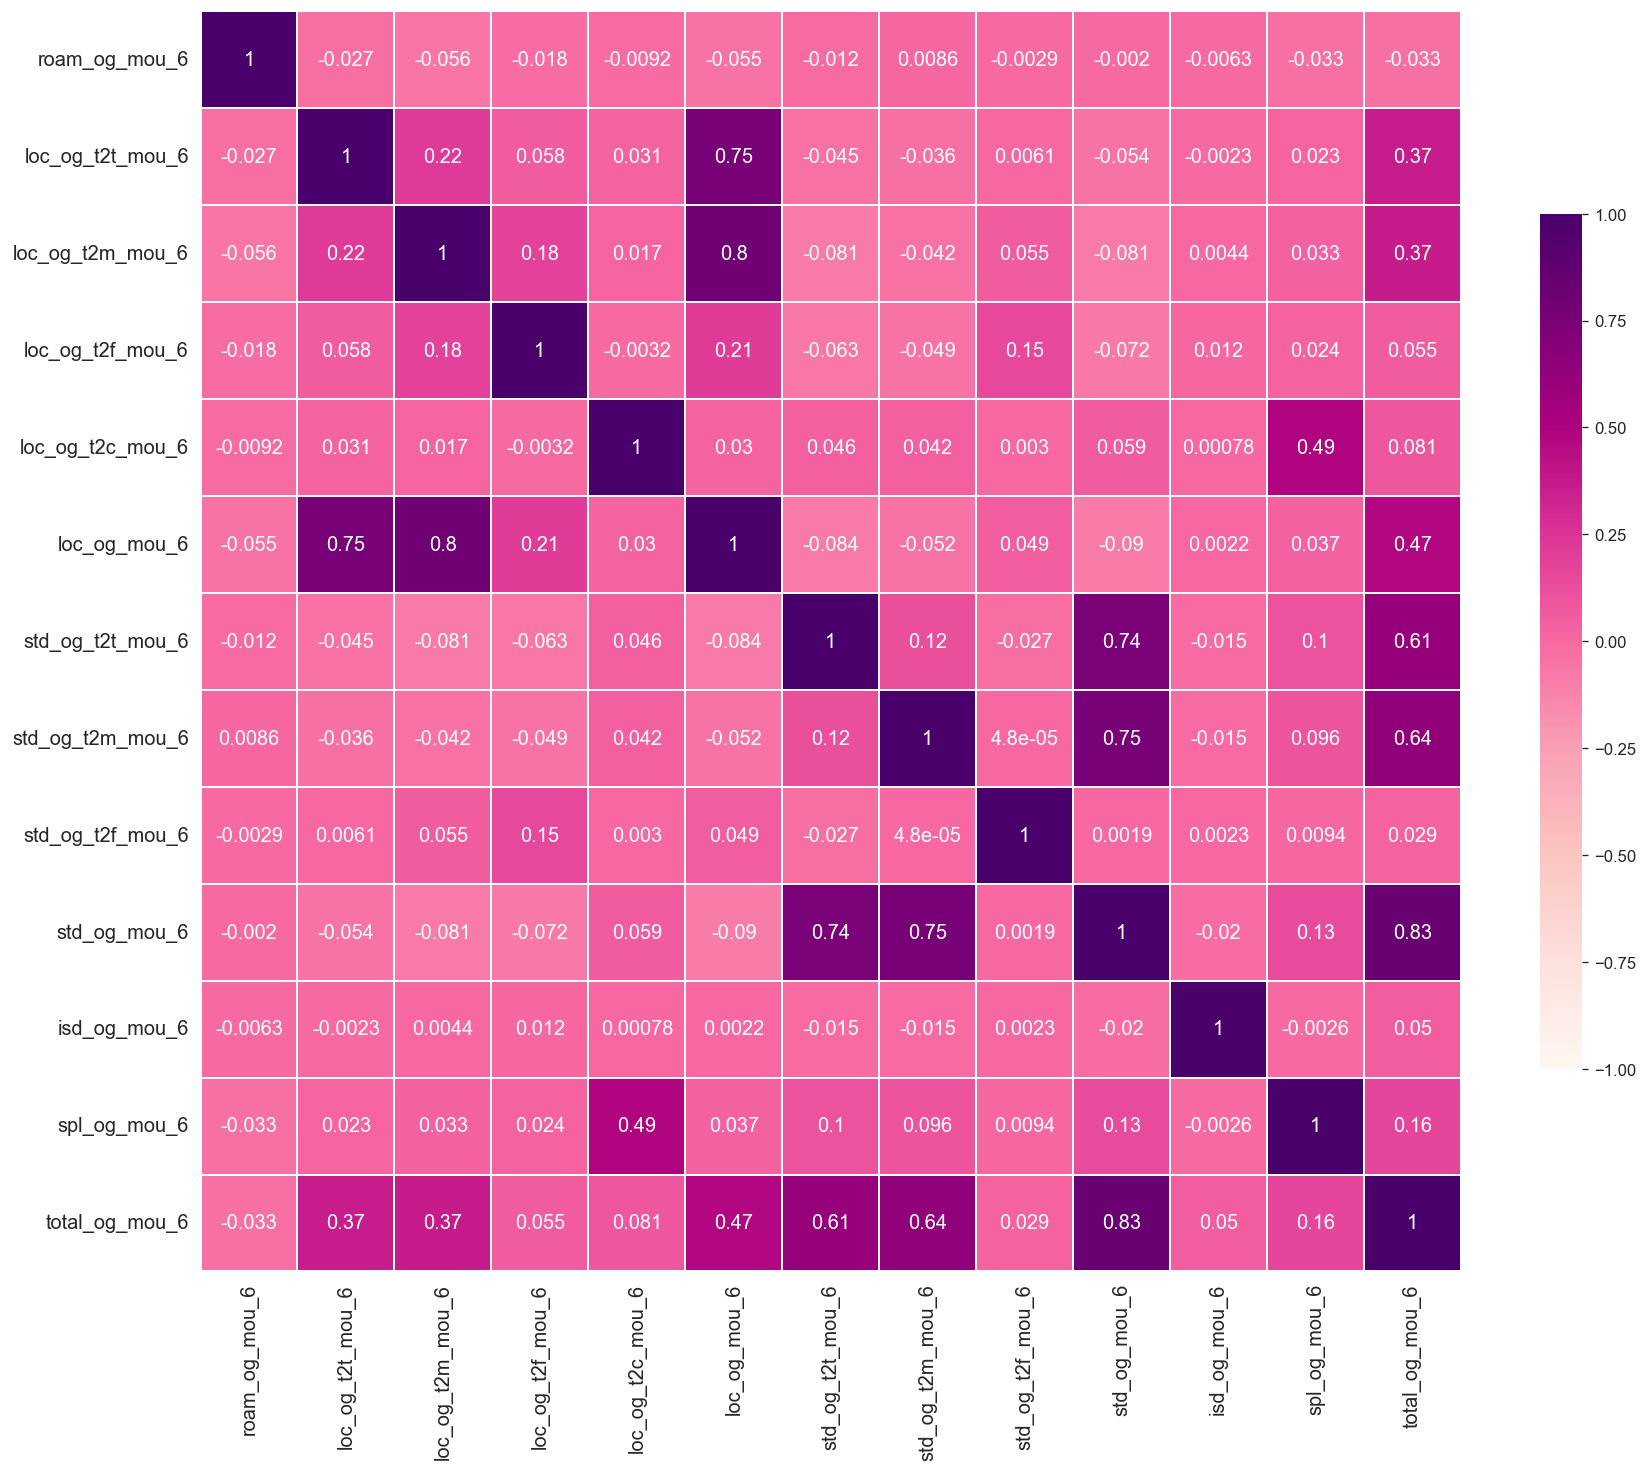

In [77]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_hv[og_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [78]:
print("'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'")
print(telecom_hv.loc[21,'loc_og_mou_6'],"==",telecom_hv.loc[21,['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6']].sum())

print("\n'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'")
print(telecom_hv.loc[21,'std_og_mou_6'],"==",telecom_hv.loc[21,['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6']].sum())

print("\n'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'")
print(telecom_hv.loc[21,'total_og_mou_6'],"==",telecom_hv.loc[21,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())

'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'
97.04 == 97.04

'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'
763.29 == 763.29

'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'
860.34 == 860.3299999999999


In [79]:
##Dropping 'loc_og_mou', 'std_og_mou' and 'total_og_mou' for all 3 months
drop_og_mou_features = list(telecom_hv.columns[telecom_hv.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

telecom_hv.drop(drop_og_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [80]:
offnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('offnet.*mou')])
offnet_usage_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

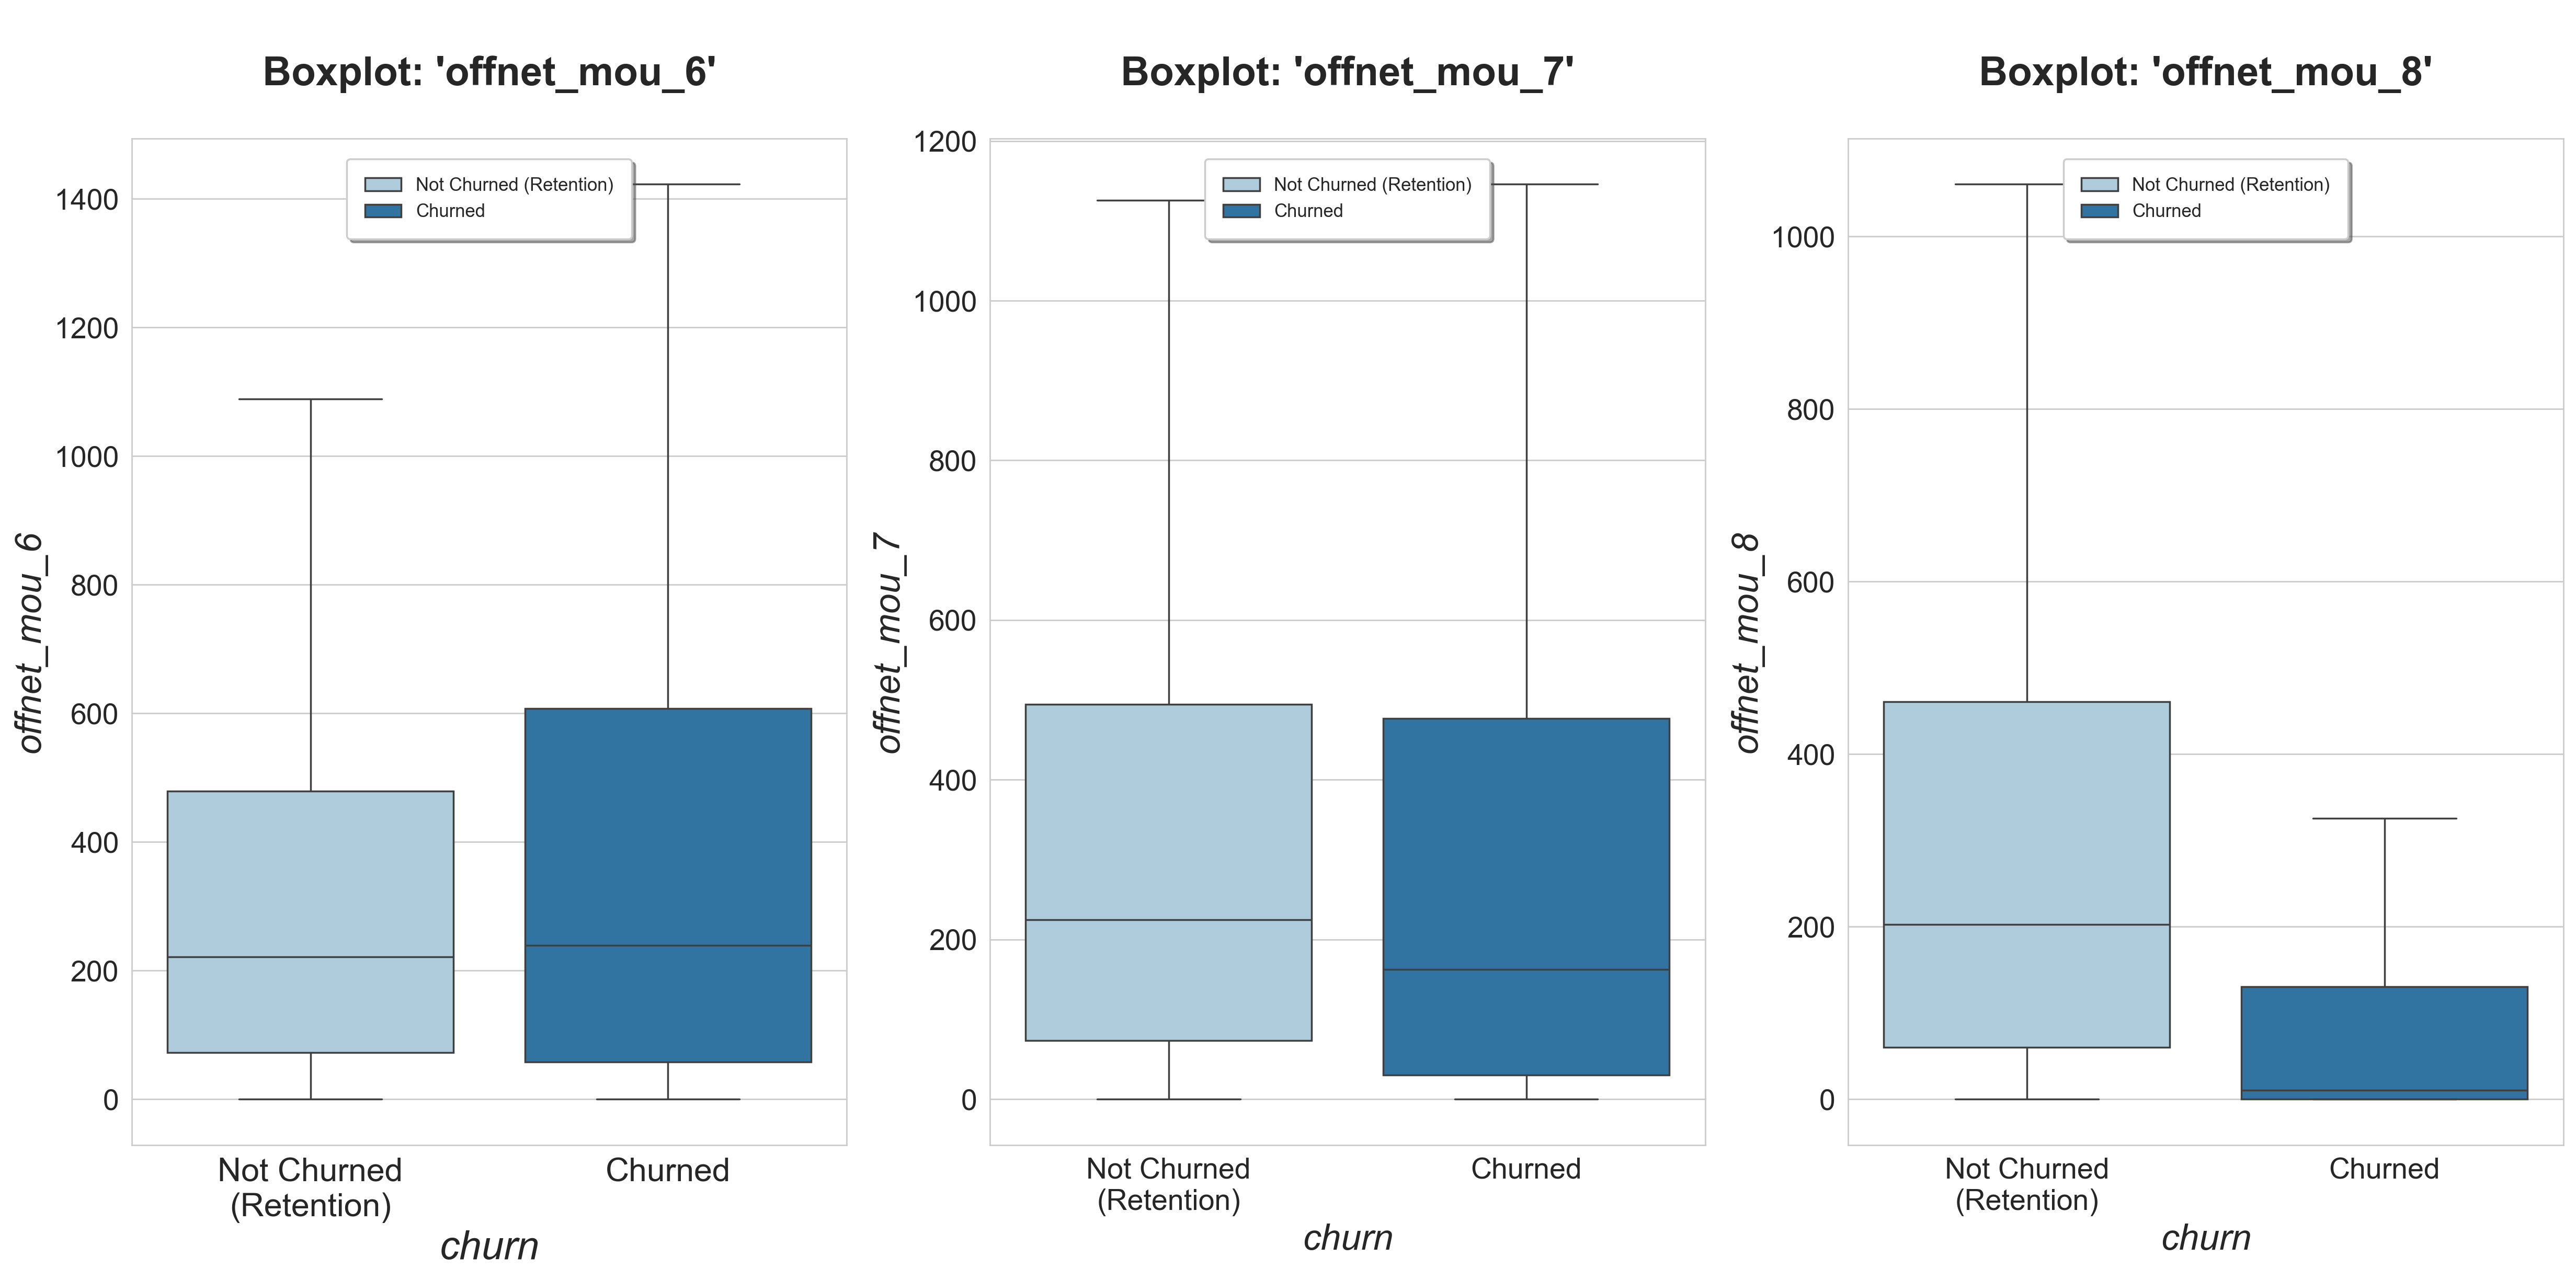

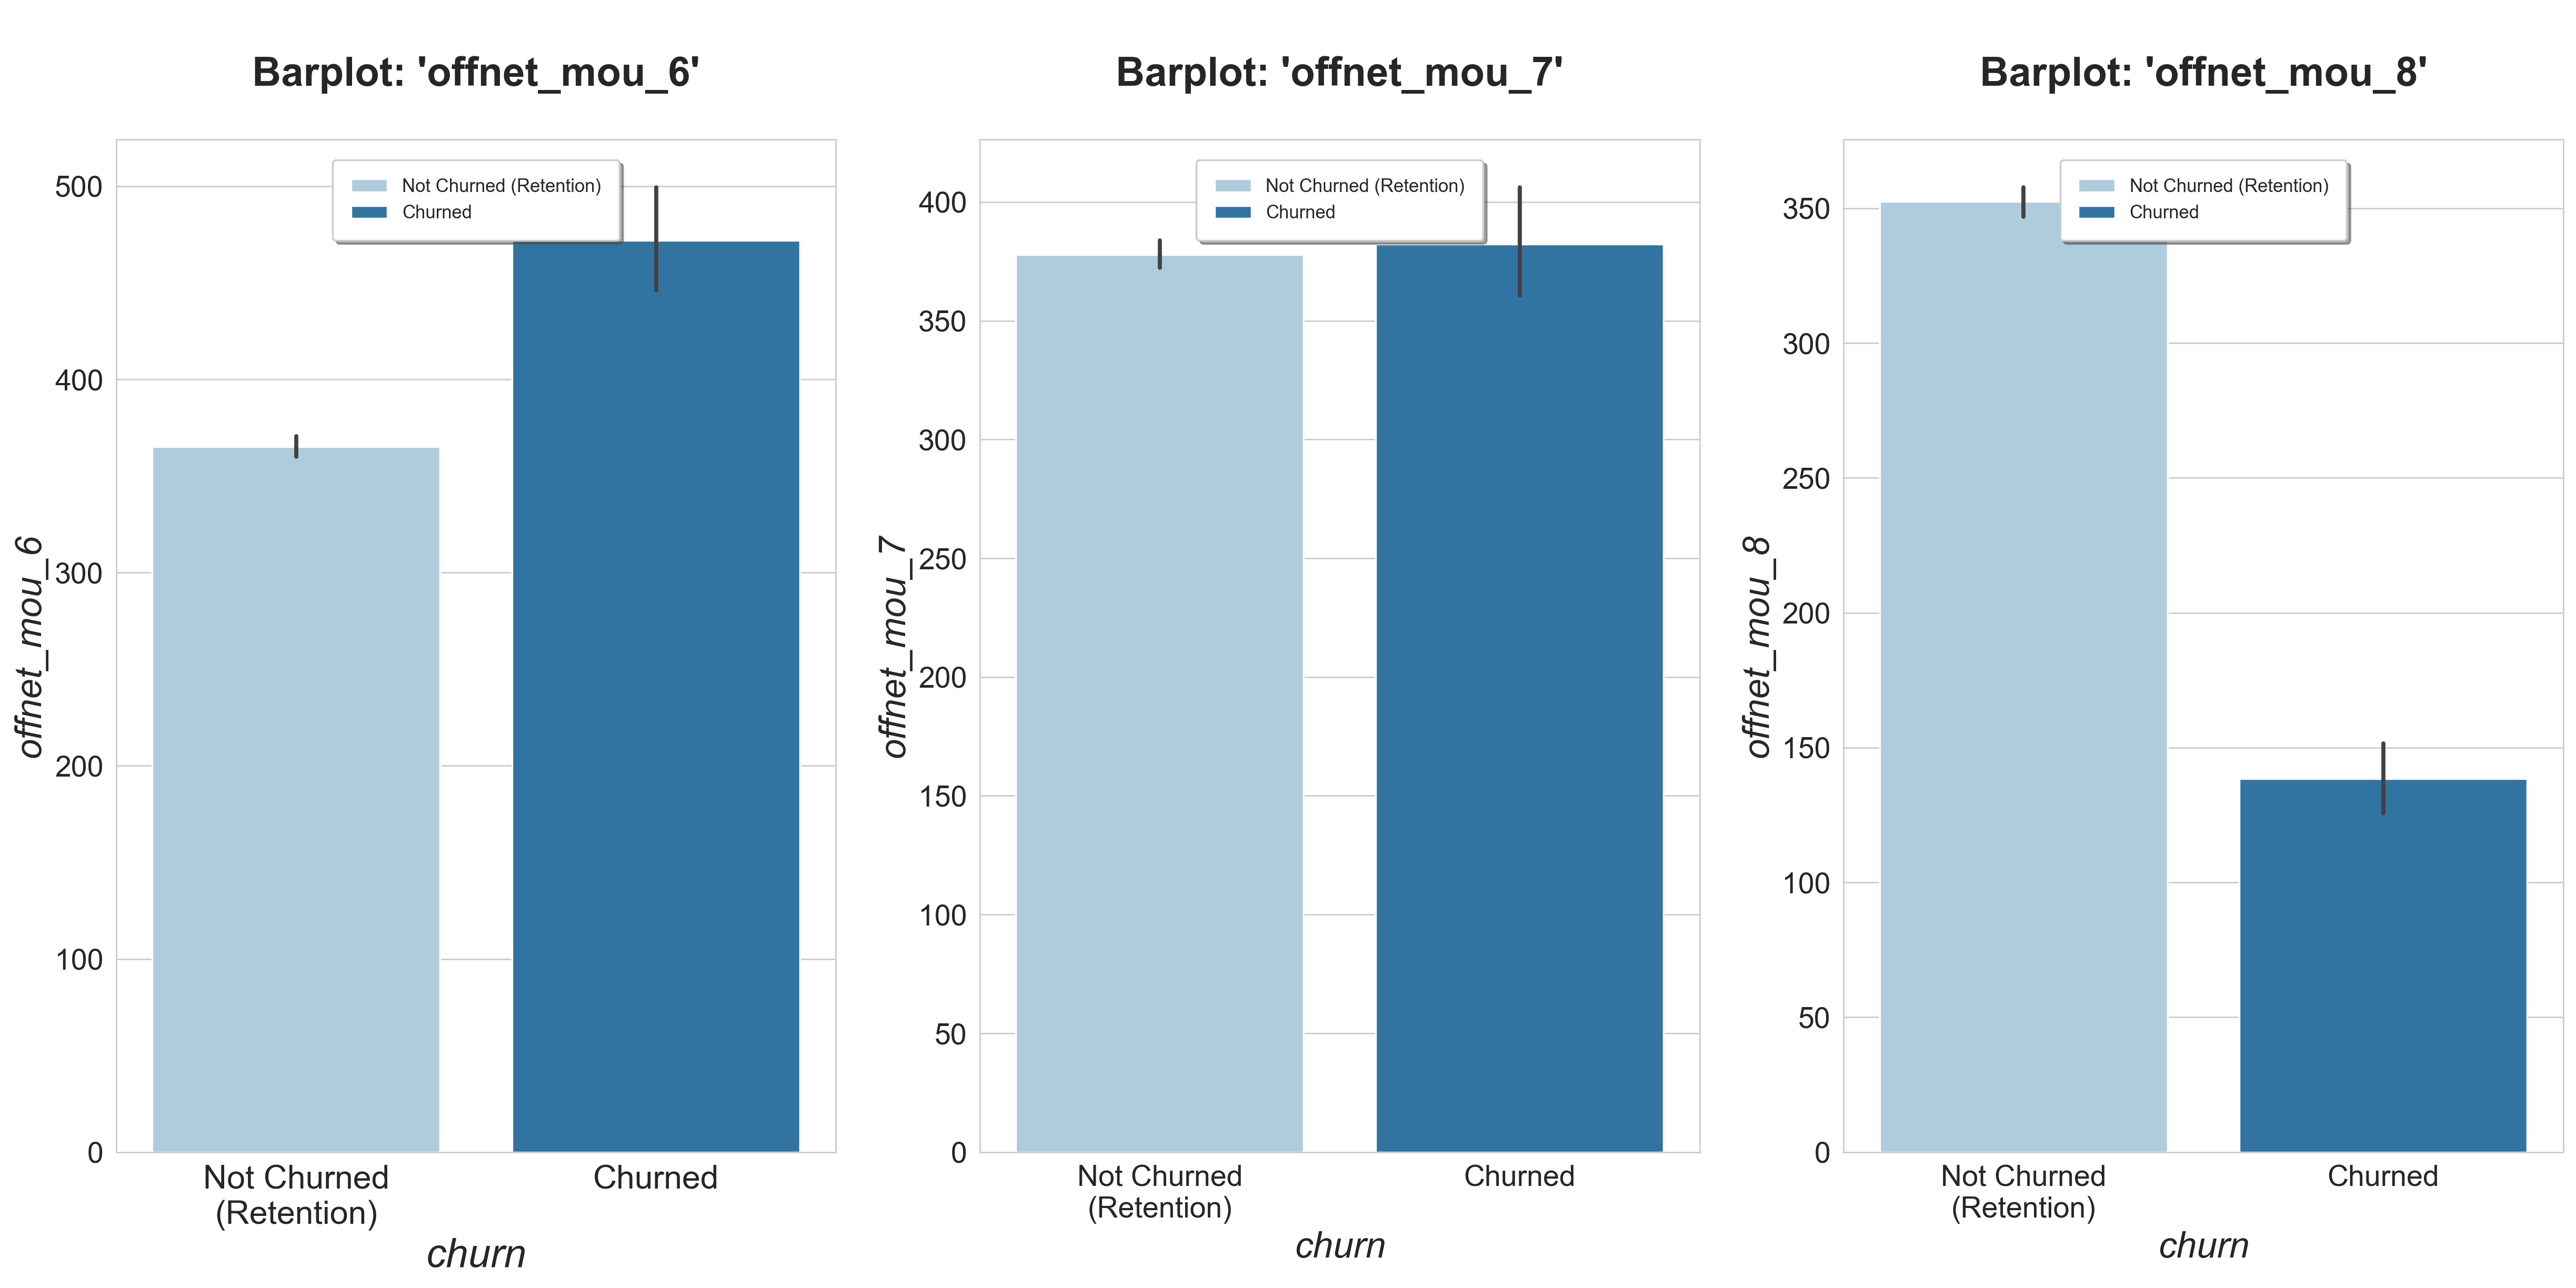

In [81]:
plot_boxplots_6_7_8('offnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('offnet_mou')

In [82]:
onnet_usage_cols = list(telecom_hv.columns[telecom_hv.columns.str.contains('onnet.*mou')])
onnet_usage_cols

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

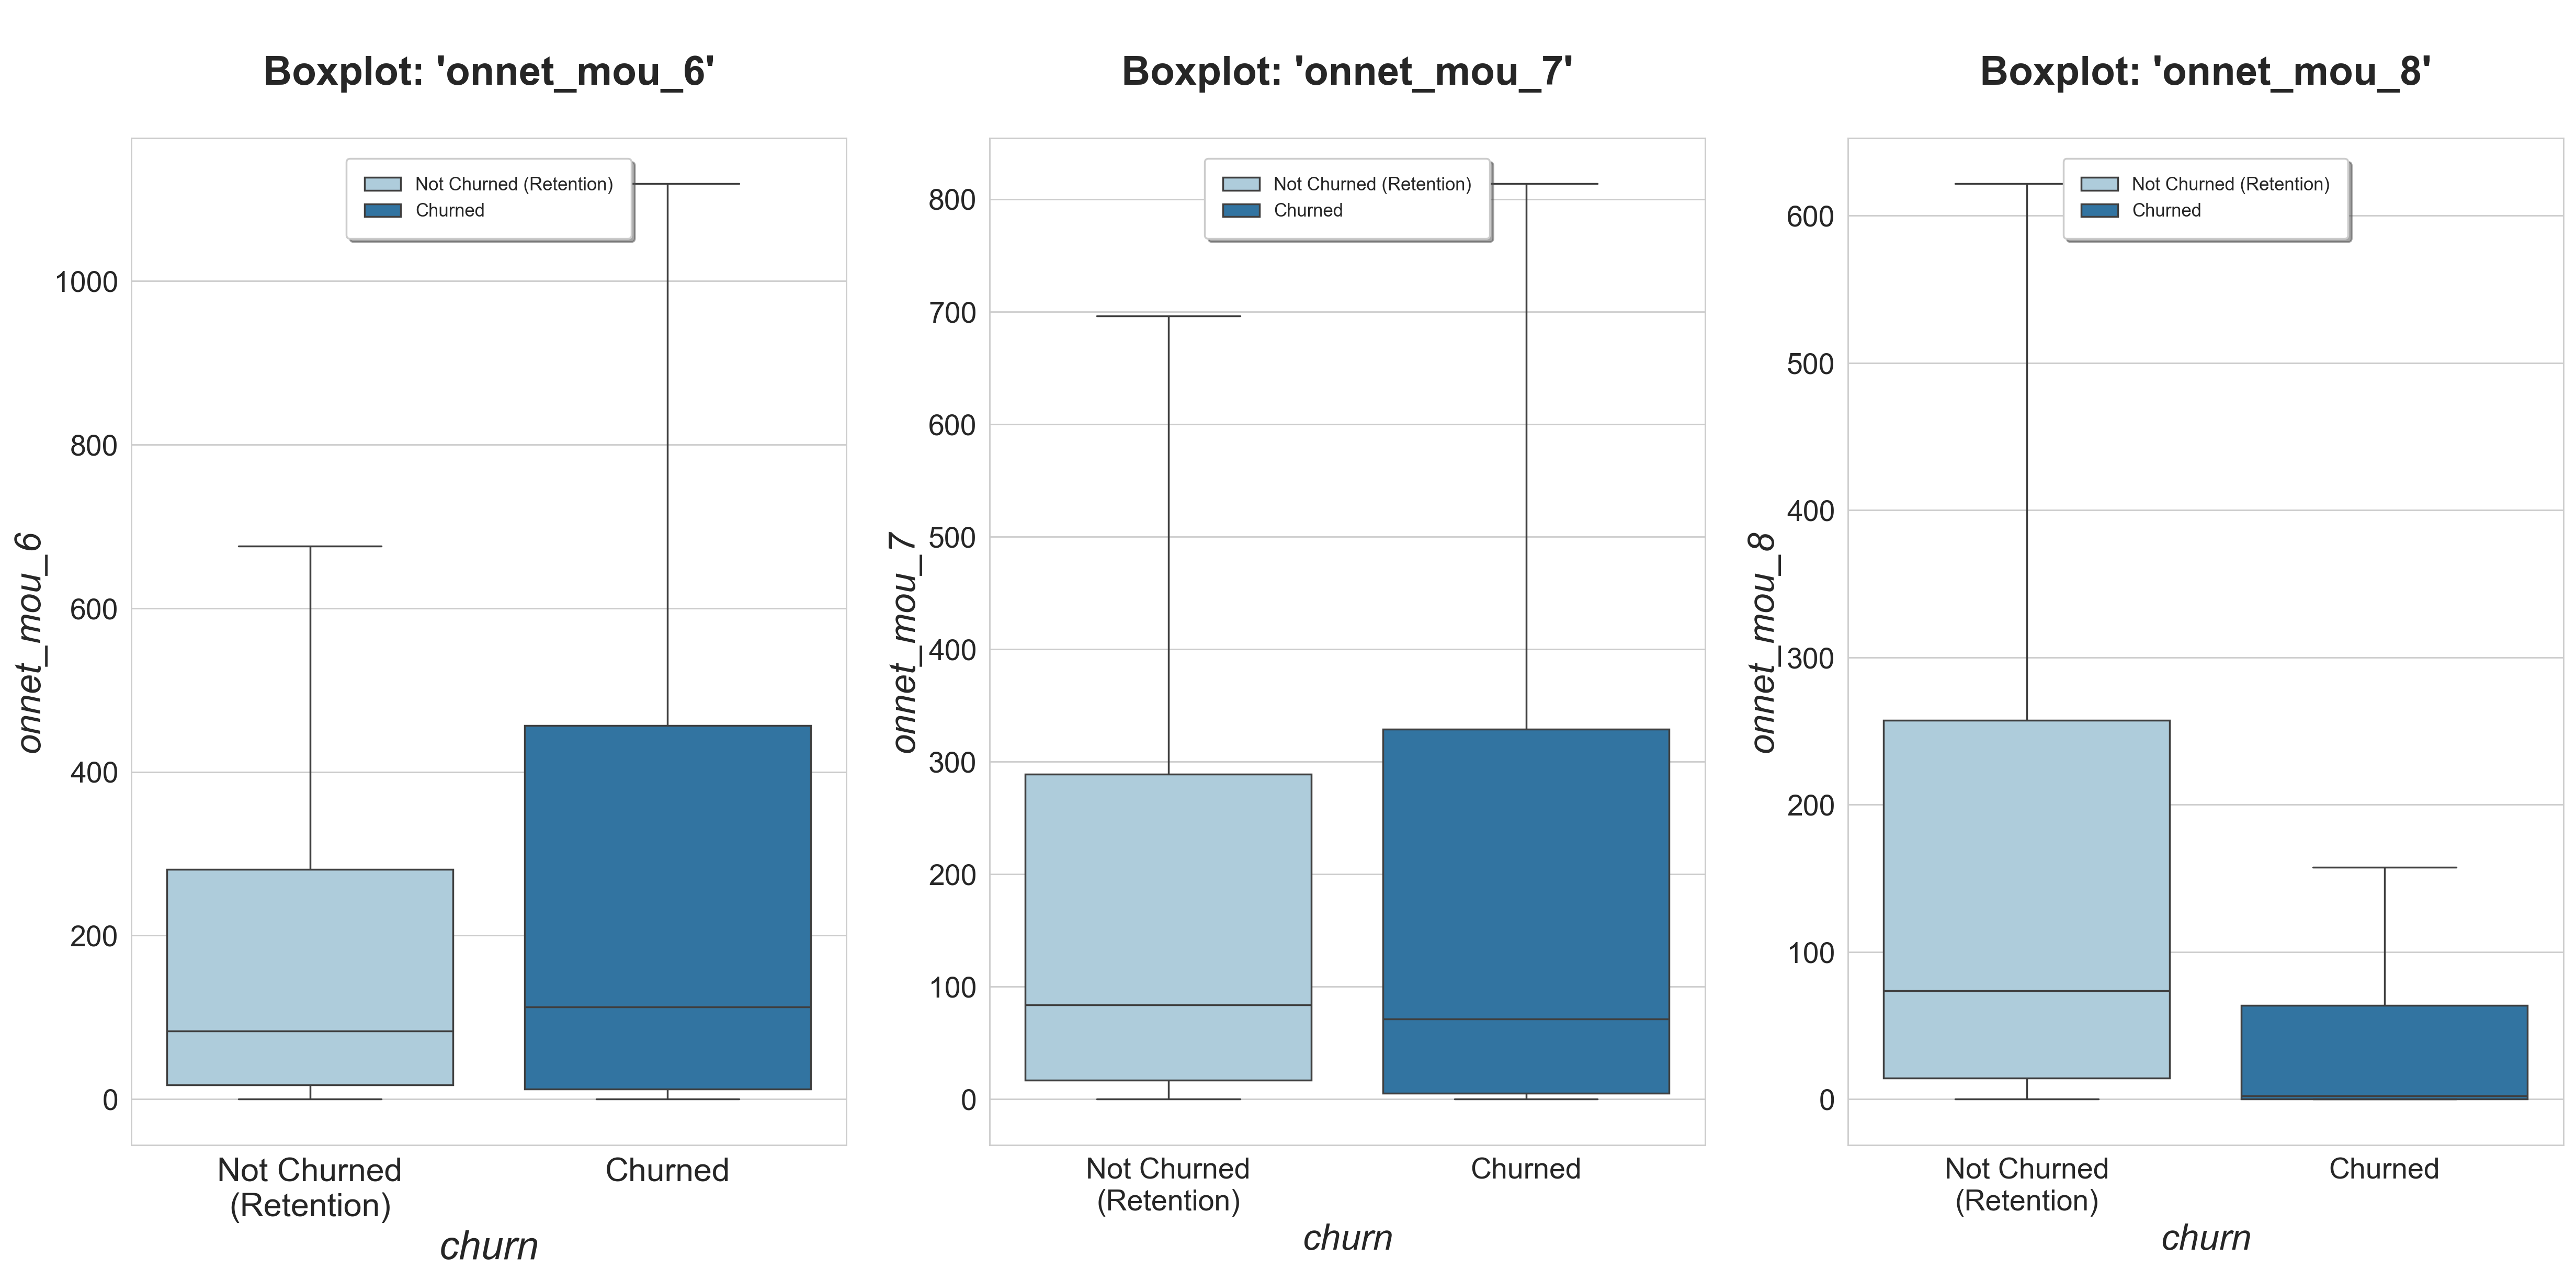

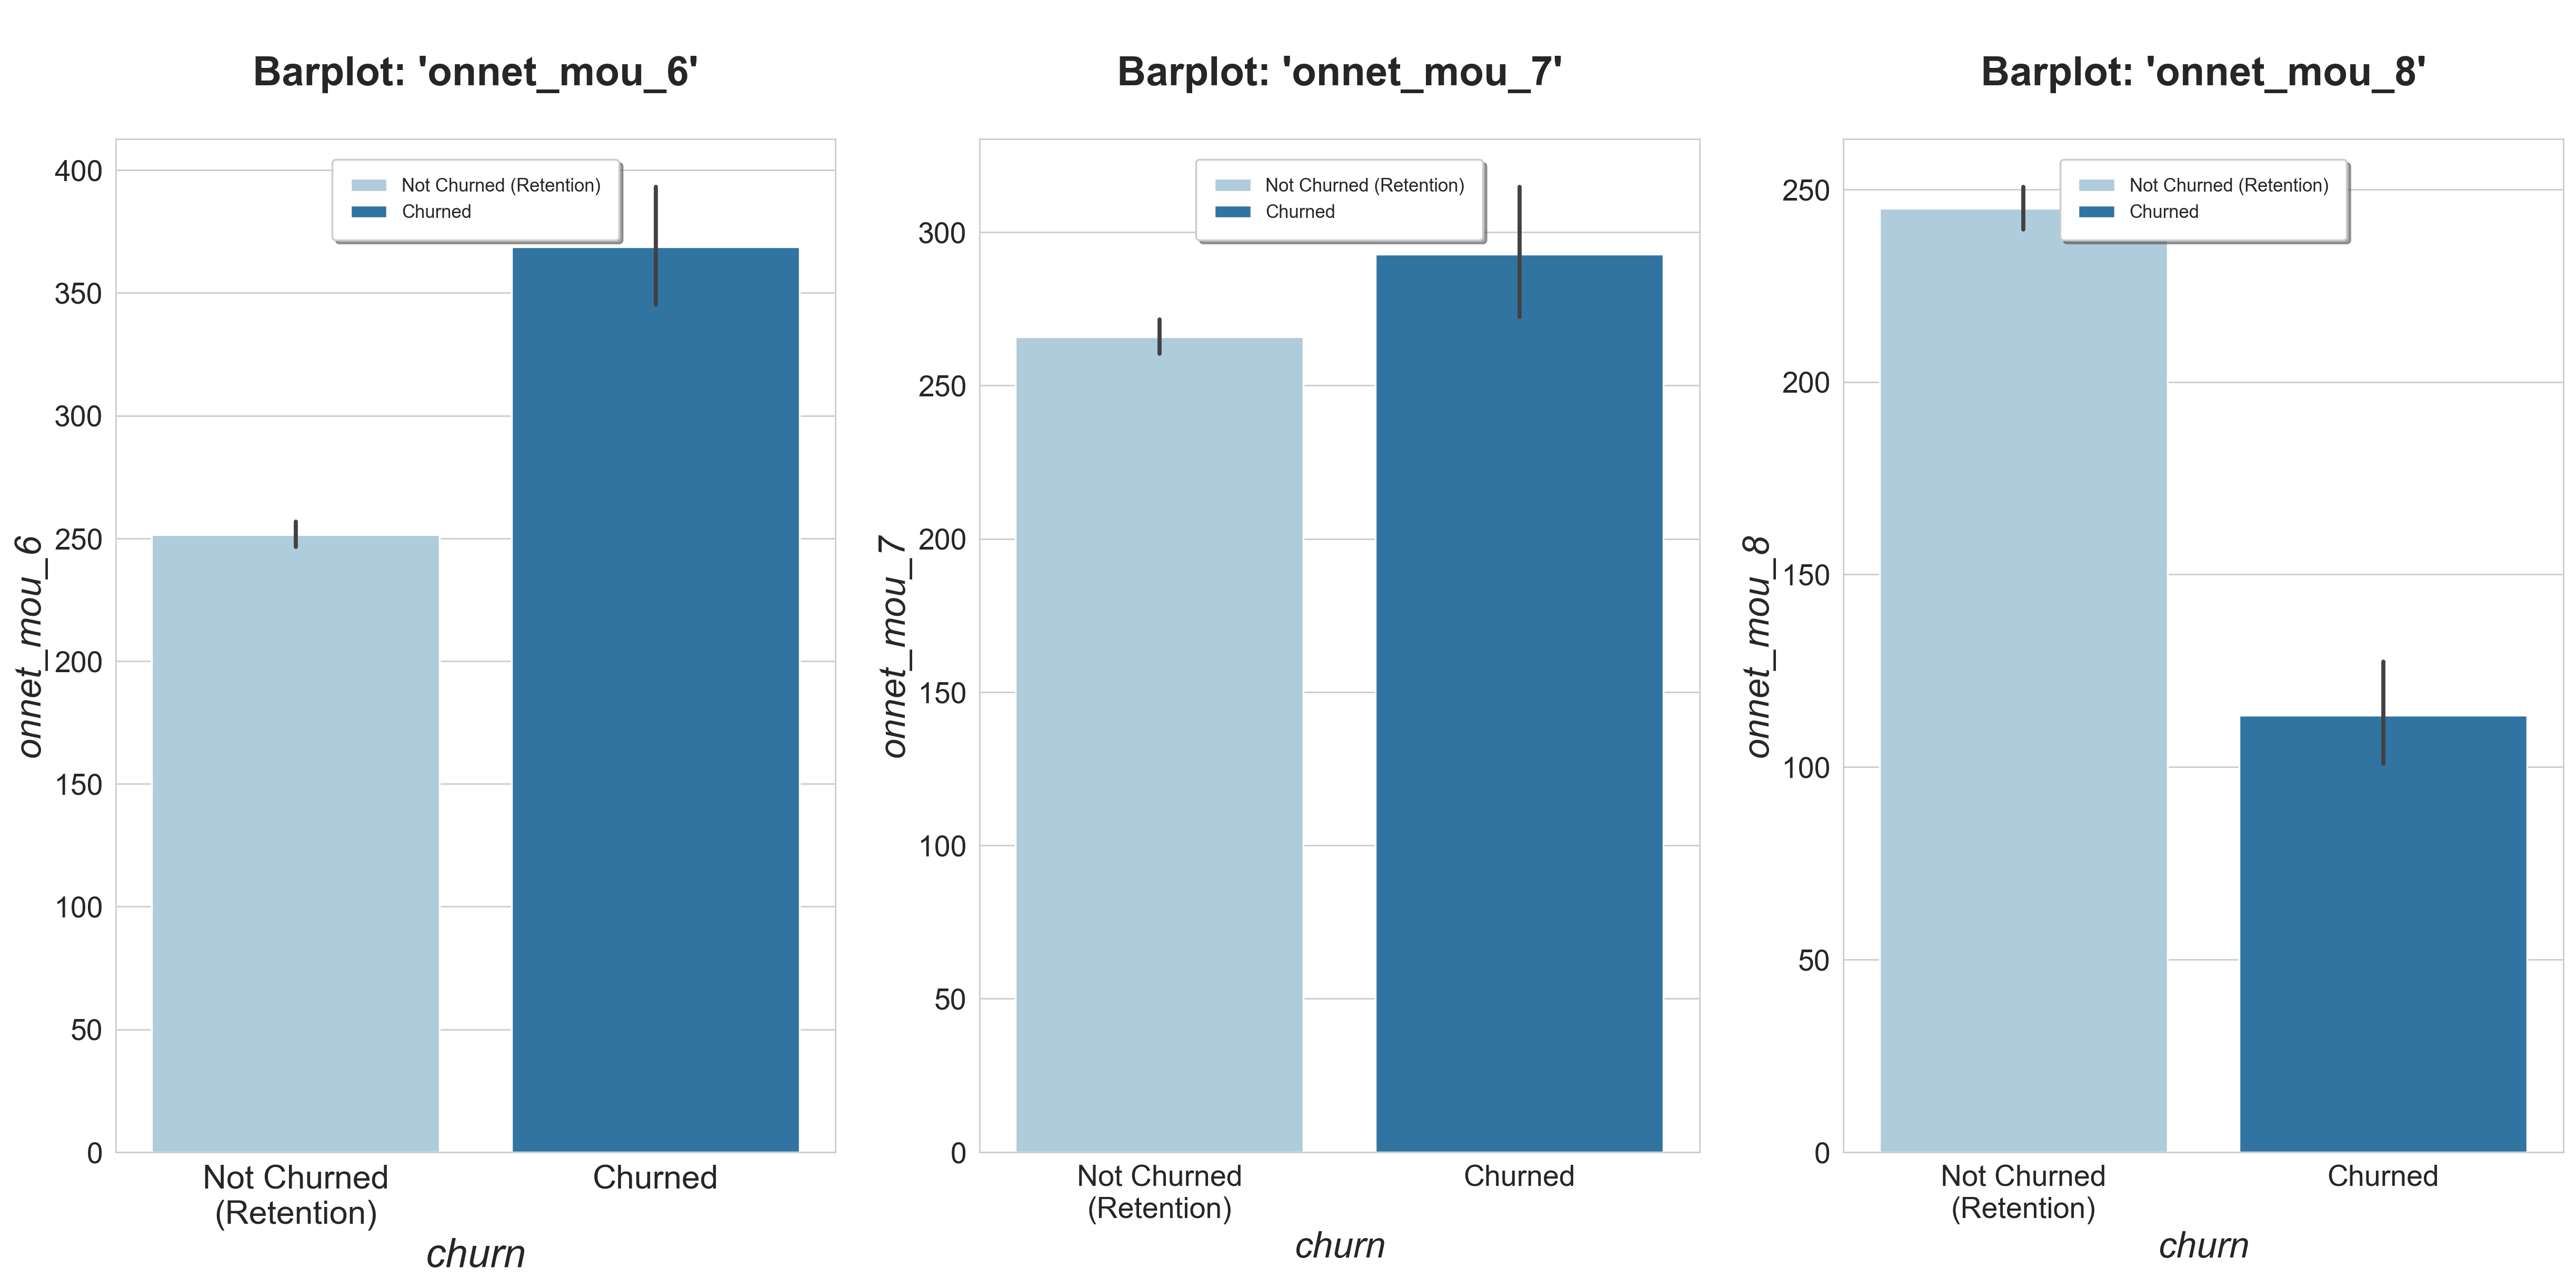

In [83]:
# Plotting 'onnet_mou' boxplots and barplots
plot_boxplots_6_7_8('onnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('onnet_mou')

In [84]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
telecom_hv['tenure_year'] = round(telecom_hv['aon']/365, 1)

print(telecom_hv.tenure_year.value_counts())
print("Min:",telecom_hv.tenure_year.min())
print("Max:",telecom_hv.tenure_year.max())

tenure_year
1.3     1361
0.6     1110
0.8     1068
1.0     1035
0.9      991
1.4      976
0.7      927
1.2      863
1.1      755
1.7      694
2.0      680
1.8      672
1.5      655
0.5      646
1.9      629
1.6      523
2.1      518
2.2      515
2.3      501
2.4      488
10.0     476
2.6      463
2.8      420
3.0      416
2.9      411
2.5      396
2.7      363
6.5      347
3.1      338
3.3      333
3.2      310
3.4      303
3.6      295
8.5      289
3.5      288
3.7      283
3.8      278
4.2      247
3.9      244
4.0      242
4.6      230
7.1      216
6.6      214
6.9      212
4.3      207
4.7      205
7.0      201
6.8      195
7.6      192
4.1      187
7.5      181
7.9      174
6.4      171
4.9      171
7.8      170
4.4      165
6.7      163
5.4      160
7.2      160
8.0      158
7.4      156
6.2      155
6.3      155
4.5      145
5.0      144
8.8      141
4.8      139
5.5      139
7.7      138
8.1      137
6.1      136
8.2      133
5.3      132
5.6      129
8.4      129
8.3      127


In [85]:
my_bins = [0,1,2,3,5,12]
my_labels_aon= ['0_1_year','1_2_year','2_3_year','3_5_year','5_12_year']
telecom_hv['tenure'] = pd.cut(telecom_hv['tenure_year'], bins= my_bins, labels= my_labels_aon)

##Dropping 'tenure_year' and 'aon' column as we have already created bins in 'tenure' column
telecom_hv.drop(['tenure_year','aon'] , axis=1, inplace= True)

telecom_hv.tenure.value_counts()

tenure
1_2_year     7808
5_12_year    7123
0_1_year     5777
3_5_year     4754
2_3_year     4491
Name: count, dtype: int64

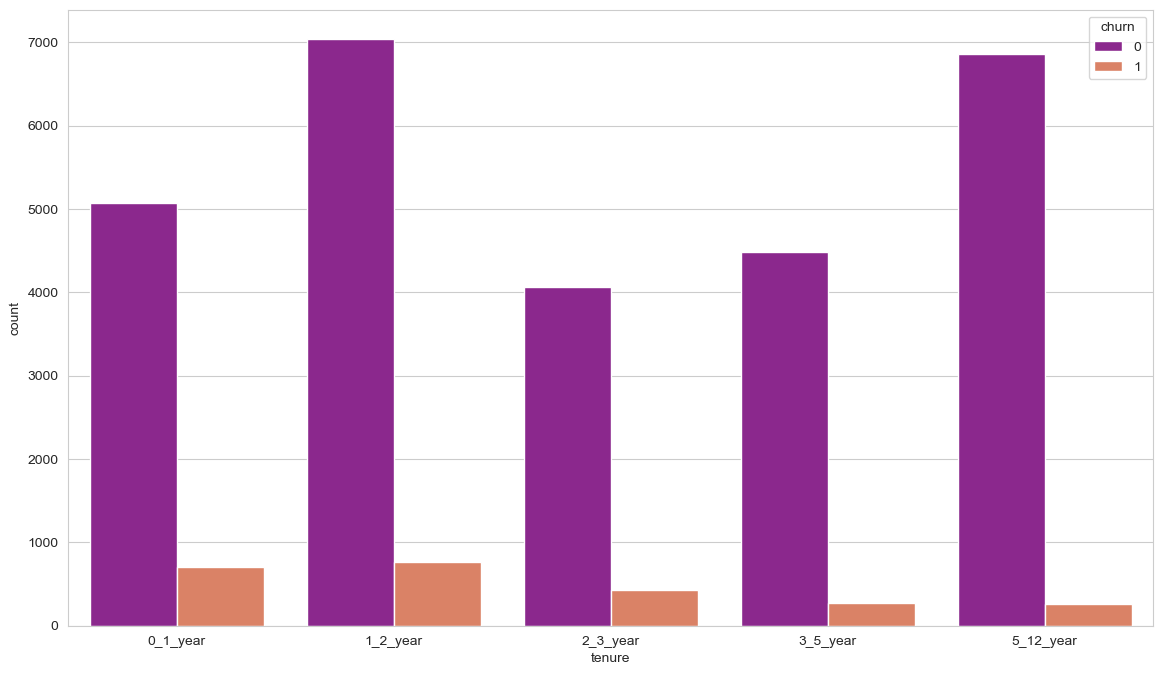

In [86]:
plt.figure(figsize=(14,8))
tenure_df= telecom_hv[['tenure','churn']]
sns.countplot(x = 'tenure', hue = 'churn',data = tenure_df,palette=("plasma"))
plt.show()

In [87]:
##Check for missing values in telecom_hv dataframe (show only missing value columns)
missing_val_cols_prcnt = round(100*telecom_hv.isnull().sum()/len(telecom_hv.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0].sort_values(ascending=False))  #Descending order(% NaN)
missing.reset_index(inplace=True)
missing= missing.rename(columns={'index':'features',0:'Null_Percentage'})
missing

features  Null_Percentage
0   night_pck_user_8            46.80
1          fb_user_8            46.80
2   night_pck_user_6            44.11
3          fb_user_6            44.11
4   night_pck_user_7            43.12
5          fb_user_7            43.12
6        og_others_8             3.91
7        ic_others_8             3.91
8        og_others_6             1.81
9        ic_others_6             1.81
10       og_others_7             1.79
11       ic_others_7             1.79

In [88]:
##Dropping 'fb_user_*' and 'night_pck_user_*' features
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
telecom_hv.drop(cols_to_drop, axis=1, inplace= True)

##Imputing 'ic_others' and 'og_others' with 0 (<=3.91% missing values)
cols_to_impute = telecom_hv.columns[telecom_hv.columns.str.contains('ic_others|og_others')]
telecom_hv[cols_to_impute] = telecom_hv[cols_to_impute].replace(np.nan, 0)

In [89]:
null_prcnt_df(telecom_hv)

Column  \
mobile_number                                        mobile_number   
arpu_6                                                      arpu_6   
arpu_7                                                      arpu_7   
arpu_8                                                      arpu_8   
onnet_mou_6                                            onnet_mou_6   
onnet_mou_7                                            onnet_mou_7   
onnet_mou_8                                            onnet_mou_8   
offnet_mou_6                                          offnet_mou_6   
offnet_mou_7                                          offnet_mou_7   
offnet_mou_8                                          offnet_mou_8   
roam_ic_mou_6                                        roam_ic_mou_6   
roam_ic_mou_7                                        roam_ic_mou_7   
roam_ic_mou_8                                        roam_ic_mou_8   
roam_og_mou_6                                        roam_og_mou_6   
roam_og_mou_7                                        roam_og_mou_7   
roam_og_mou_8                                        roam_og_mou_8   
loc_og_t2t_mou_6                                  loc_og_t2t_mou_6   
loc_og_t2t_mou_7                                  loc_og_t2t_mou_7   
loc_og_t2t_mou_8                                  loc_og_t2t_mou_8   
loc_og_t2m_mou_6                                  loc_og_t2m_mou_6   
loc_og_t2m_mou_7                                  loc_og_t2m_mou_7   
loc_og_t2m_mou_8                                  loc_og_t2m_mou_8   
loc_og_t2f_mou_6                                  loc_og_t2f_mou_6   
loc_og_t2f_mou_7                                  loc_og_t2f_mou_7   
loc_og_t2f_mou_8                                  loc_og_t2f_mou_8   
loc_og_t2c_mou_6                                  loc_og_t2c_mou_6   
loc_og_t2c_mou_7                                  loc_og_t2c_mou_7   
loc_og_t2c_mou_8                                  loc_og_t2c_mou_8   
std_og_t2t_mou_6                                  std_og_t2t_mou_6   
std_og_t2t_mou_7                                  std_og_t2t_mou_7   
std_og_t2t_mou_8                                  std_og_t2t_mou_8   
std_og_t2m_mou_6                                  std_og_t2m_mou_6   
std_og_t2m_mou_7                                  std_og_t2m_mou_7   
std_og_t2m_mou_8                                  std_og_t2m_mou_8   
std_og_t2f_mou_6                                  std_og_t2f_mou_6   
std_og_t2f_mou_7                                  std_og_t2f_mou_7   
std_og_t2f_mou_8                                  std_og_t2f_mou_8   
isd_og_mou_6                                          isd_og_mou_6   
isd_og_mou_7                                          isd_og_mou_7   
isd_og_mou_8                                          isd_og_mou_8   
spl_og_mou_6                                          spl_og_mou_6   
spl_og_mou_7                                          spl_og_mou_7   
spl_og_mou_8                                          spl_og_mou_8   
og_others_6                                            og_others_6   
og_others_7                                            og_others_7   
og_others_8                                            og_others_8   
loc_ic_t2t_mou_6                                  loc_ic_t2t_mou_6   
loc_ic_t2t_mou_7                                  loc_ic_t2t_mou_7   
loc_ic_t2t_mou_8                                  loc_ic_t2t_mou_8   
loc_ic_t2m_mou_6                                  loc_ic_t2m_mou_6   
loc_ic_t2m_mou_7                                  loc_ic_t2m_mou_7   
loc_ic_t2m_mou_8                                  loc_ic_t2m_mou_8   
loc_ic_t2f_mou_6                                  loc_ic_t2f_mou_6   
loc_ic_t2f_mou_7                                  loc_ic_t2f_mou_7   
loc_ic_t2f_mou_8                                  loc_ic_t2f_mou_8   
std_ic_t2t_mou_6                                  std_ic_t2t_mou_6   
std_ic_t2t_mou_7                                  std_ic_t2t_mou_7   


In [90]:
telecom_hv.shape

(29953, 121)

In [91]:
attributes_6 = list(telecom_hv.columns[telecom_hv.columns.str.contains("_6")])
print(attributes_6)
print(len(attributes_6))

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rech_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'vbc_3g_6', 'total_rech_data_amt_6', 'avg_total_rech_plus_data_amt_6_7']
40


In [92]:
attributes_7 = telecom_hv.columns[telecom_hv.columns.str.contains("_7")]
print(attributes_7)
print(len(attributes_7))


Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7',
       'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7',
       'last_day_rech_amt_7', 'total_rech_data_7', 'max_rech_data_7',
       'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7',
       'total_rech_data_amt_7', 'avg_total_rech_plus_data_amt_6_7'],
      dtype='object')
40


In [93]:
telecom_hv.drop('avg_total_rech_plus_data_amt_6_7', axis=1, inplace= True)

In [94]:
feature_names_6 = [i.split('_6')[0] for i in attributes_6 if i.endswith("_6")]
feature_names_7 = [i.split('_7')[0] for i in attributes_7 if i.endswith("_7")]
uncommon_feature_names = [i for i,j in (zip(feature_names_6, feature_names_7)) if i!=j]
uncommon_feature_names

[]

In [95]:
common_feature_names= [i for i,j in (zip(feature_names_6, feature_names_7)) if i==j]
common_feature_names

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rech_amt',
 'total_rech_data',
 'max_rech_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_rech_data_amt']

In [96]:
f6_cols=[]
f7_cols=[]
for feature in common_feature_names:
    f6= feature+'_6'
    f7= feature+'_7'
    avg_67= feature+'_avg_6_7'
    
    f6_cols.append(f6)  ##Storing all remaining attributes from '_6'
    f7_cols.append(f7)  ##Storing all remaining attributes from '_7'
    
    telecom_hv[avg_67] = (telecom_hv[f6] + telecom_hv[f7])/2

telecom_hv.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
21            808.74            876.99              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0               0.00           0.0          0.00          0.00           0.0   
7              16.68           0.0          0.18         10.01           4.5   
8           

In [97]:
telecom_hv.drop(f6_cols, axis=1, inplace=True)

In [98]:
telecom_hv.drop(f7_cols, axis=1, inplace=True)

In [99]:
telecom_hv.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
21              0.00             61.79            876.99              0.00   
23             17.71              0.00             39.61              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
0           0.00          0.00          0.0              0.16   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
21          0.00          0.00          0.0             19.54   
23          0.00         17.71          0.0             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0               4.13              1.15              0.00              0.00   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
21            129.16             10.39              0.18            101.74   
23            146.84              0.71             13.38             43.91   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.00           0.0          0.00         0.00   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
21              0.00           0.0          0.00         0.00   
23              0.00           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
0                  2               252             252                  252   
7                  7              3638            1580                  779   
8                 14               120              30                   10   
21                27               718              50                   50   
23                 4               439             179                    0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                 1.0            252.0               252.0         5.75   
7                 0.0              0.0                 0.0         0.00   
8                 3.0             23.0                69.0         0.03   
21                0.0              0.0                 0.0         0.00   
23                2.0            179.0               270.0         0.01   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0        109.61             0            0             1            0   
7          0.00             0            0             0            0   
8         11.94             0            3             0            0   
21         0.00             0            0             0            0   
23      1009.92             0            0             1            1   

    vbc_3g_8  total_rech_data

In [100]:
telecom_hv.shape

(29953, 81)

In [101]:
telecom_hv.describe(percentiles= [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
count   2.995300e+04  29953.000000  29953.000000  29953.000000   29953.000000   
mean    7.001206e+09    508.890301    234.345252    335.123008      12.512269   
std     6.908102e+05    502.136278    458.751242    481.985106      74.179181   
min     7.000000e+09   -945.808000      0.000000      0.000000       0.000000   
1%      7.000026e+09      0.000000      0.000000      0.000000       0.000000   
10%     7.000251e+09     84.302800      0.000000      2.200000       0.000000   
25%     7.000609e+09    231.615000     10.440000     46.760000       0.000000   
50%     7.001203e+09    427.604000     65.660000    182.840000       0.000000   
75%     7.001804e+09    661.753000    240.630000    438.860000       0.000000   
90%     7.002165e+09    977.546400    666.266000    823.880000      15.030000   
95%     7.002285e+09   1255.086400   1075.384000   1167.620000      56.362000   
99%     7.002386e+09   1986.739600   2159.676400   2191.731200     282.689200   
99.9%   7.002408e+09   3978.343672   4169.950800   4473.025440     918.464960   
max     7.002411e+09  33543.624000  10752.560000  14007.340000    4169.810000   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       19.889295         78.153334        151.810056          5.891865   
std       104.799622        227.540167        233.745412         19.516259   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          2.540000         13.130000          0.000000   
50%         0.000000         20.740000         67.790000          0.000000   
75%         0.000000         72.130000        197.030000          3.930000   
90%        28.880000        179.138000        398.496000         15.188000   
95%       100.692000        299.542000        574.828000         28.390000   
99%       427.068400        913.858000       1088.679600         82.249600   
99.9%    1365.610640       2767.469520       2101.222400        234.916640   
max      5337.040000      10752.560000       4961.330000        928.490000   

       loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count      29953.000000      29953.000000      29953.000000      29953.000000   
mean           1.701889        148.587258        157.322964          1.586742   
std            7.147606        397.838396        409.035684         10.940142   
min            0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.630000          9.460000          0.000000   
75%            0.010000         78.190000        117.710000          0.000000   
90%            4.576000        476.156000        465.162000          1.280000   
95%            9.354000        888.030000        842.922000          5.930000   
99%           28.210000       1913.300400       1892.576400         35.238000   
99.9%         72.907200       3781.003440       4241.940240        161.748160   
max          351.830000       8014.430000      13950.040000        516.910000   

       isd_og_mou_8  spl_og_mou_8   og_others_8  loc_ic_t2t_mou_8  \
count  29953.000000  29953.000000  29953.000000      29953.000000   
mean       1.952078      6.549024      0.057694         62.662397   
std       44.747769     20.289977      3.317780        159.026025   
min        0.000000      0.000000      0.000000          0.000000   
1%         0.000000      0.000000      0.000000          0.

In [102]:
cont_cols_hv= [i for i in telecom_hv.columns if i not in ['mobile_number', 'churn', 'tenure']]
cont_cols_hv

##Using numpy clip() to cap the values of outliers in between 1 and 99.9 percentiles
import numpy as np
for col in cont_cols_hv:
    percentiles = telecom_hv[col].quantile([0.01,0.999]).values
    telecom_hv[col] = np.clip(telecom_hv[col], percentiles[0], percentiles[1])

In [103]:
telecom_hv.tenure.head()

0     2_3_year
7     2_3_year
8     0_1_year
21    1_2_year
23    1_2_year
Name: tenure, dtype: category
Categories (5, object): ['0_1_year' < '1_2_year' < '2_3_year' < '3_5_year' < '5_12_year']

In [104]:
cat_cols= ['tenure']
d_tenure = pd.get_dummies(telecom_hv['tenure'], prefix='tenure', drop_first = True)
telecom_hv = pd.concat([telecom_hv, d_tenure], axis = 1)

##Dropping the 'tenure' column
telecom_hv.drop(cat_cols, axis=1, inplace=True)

In [105]:
telecom_hv.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
21              0.00             61.79            876.99              0.00   
23             17.71              0.00             39.61              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
0           0.00          0.00          0.0              0.16   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
21          0.00          0.00          0.0             19.54   
23          0.00         17.71          0.0             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0               4.13              1.15              0.00              0.00   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
21            129.16             10.39              0.18            101.74   
23            146.84              0.71             13.38             43.91   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.00           0.0          0.00         0.00   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
21              0.00           0.0          0.00         0.00   
23              0.00           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
0                  2             252.0             252                252.0   
7                  7            3638.0            1580                779.0   
8                 14             120.0              30                 10.0   
21                27             718.0              50                 50.0   
23                 4             439.0             179                  0.0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                 1.0            252.0               252.0         5.75   
7                 0.0              0.0                 0.0         0.00   
8                 3.0             23.0                69.0         0.03   
21                0.0              0.0                 0.0         0.00   
23                2.0            179.0               270.0         0.01   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0        109.61             0            0             1          0.0   
7          0.00             0            0             0          0.0   
8         11.94             0            3             0          0.0   
21         0.00             0            0             0          0.0   
23      1009.92             0            0             1          1.0   

    vbc_3g_8  total_rech_data

In [106]:
telecom_hv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29953 entries, 0 to 99997
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_number                29953 non-null  int64  
 1   arpu_8                       29953 non-null  float64
 2   onnet_mou_8                  29953 non-null  float64
 3   offnet_mou_8                 29953 non-null  float64
 4   roam_ic_mou_8                29953 non-null  float64
 5   roam_og_mou_8                29953 non-null  float64
 6   loc_og_t2t_mou_8             29953 non-null  float64
 7   loc_og_t2m_mou_8             29953 non-null  float64
 8   loc_og_t2f_mou_8             29953 non-null  float64
 9   loc_og_t2c_mou_8             29953 non-null  float64
 10  std_og_t2t_mou_8             29953 non-null  float64
 11  std_og_t2m_mou_8             29953 non-null  float64
 12  std_og_t2f_mou_8             29953 non-null  float64
 13  isd_og_mou_8         

In [107]:
df1= telecom_hv.copy()

In [108]:
telecom_hv = df1.copy()

In [109]:
df_corr = telecom_hv.drop(['churn'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
cols_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
cols_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_rech_amt_8',
 'av_rech_amt_data_8',
 'vol_3g_mb_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'total_rech_data_amt_8',
 'onnet_mou_avg_6_7',
 'offnet_mou_avg_6_7',
 'roam_og_mou_avg_6_7',
 'loc_og_t2t_mou_avg_6_7',
 'loc_og_t2m_mou_avg_6_7',
 'loc_og_t2f_mou_avg_6_7',
 'std_og_t2t_mou_avg_6_7',
 'std_og_t2m_mou_avg_6_7',
 'std_og_t2f_mou_avg_6_7',
 'isd_og_mou_avg_6_7',
 'loc_ic_t2t_mou_avg_6_7',
 'loc_ic_t2m_mou_avg_6_7',
 'loc_ic_t2f_mou_avg_6_7',
 'std_ic_t2m_mou_avg_6_7',
 'isd_ic_mou_avg_6_7',
 'total_rech_num_avg_6_7',
 'total_rech_amt_avg_6_7',
 'total_rech_data_avg_6_7',
 'max_rech_data_avg_6_7',
 'av_rech_amt_data_avg_6_7',
 'vol_3g_mb_avg_6_7',
 'sachet_2g_avg_6_7',
 'monthly_3g_avg_6_7',
 'vbc_3g_avg_6_7',
 'total_rech_data_amt_avg_6_7']

In [110]:
telecom_hv.drop(cols_to_drop, axis=1, inplace= True)

In [111]:
telecom_hv.shape

(29953, 51)

In [112]:
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df= telecom_hv)
print(binary_cols)


['churn', 'tenure_1_2_year', 'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year']


In [113]:
telecom_hv.drop('mobile_number', axis=1, inplace= True)

In [114]:
telecom_hv.shape

(29953, 50)

In [115]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size = 0.3, random_state=42)

In [116]:
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)


In [117]:
print(df_train.shape)
print(df_test.shape)

(20967, 50)
(8986, 50)


In [118]:
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
49069 -0.964812    -0.530047     -0.681501      -0.198916       -0.21154   
90375  2.763271     7.552357     -0.400812      -0.198916       -0.21154   
80131 -0.066603    -0.530907     -0.442601      -0.198916       -0.21154   
36950 -1.208095    -0.530907     -0.725466      -0.198916       -0.21154   
22699  0.562930    -0.470947      3.121238      -0.198916       -0.21154   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
49069         -0.389796         -0.581484         -0.318366         -0.291535   
90375         -0.283090         -0.599979         -0.324278         -0.291535   
80131         -0.391731         -0.138607         -0.339057         -0.291535   
36950         -0.391731         -0.666810         -0.339057         -0.291535   
22699         -0.256922          7.095243         -0.265162         -0.259171   

       std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
49069         -0.167149     -0.089522      0.169411    -0.053536   
90375         -0.167149     -0.089522     -0.124505    -0.053536   
80131         -0.167149     -0.089522     -0.372752    -0.053536   
36950         -0.167149     -0.089522     -0.372752    -0.053536   
22699         -0.167149     -0.089522     -0.225794    -0.053536   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
49069         -0.380731         -0.478826         -0.372273         -0.207279   
90375         -0.330029         -0.535894         -0.372273         -0.225945   
80131         -0.426592          2.975481         -0.372273         -0.245880   
36950         -0.426592         -0.707681         -0.372273         -0.245880   
22699         -0.253111          0.209497         -0.215906         -0.245880   

       std_ic_t2m_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
49069         -0.310733         -0.201971      4.678425     -0.177665   
90375         -0.316851         -0.201971     -0.252982     -0.177665   
80131         -0.317428         -0.201971     -0.252982     -0.177665   
36950         -0.317428         -0.201971     -0.252982     -0.177665   
22699         -0.291109         -0.201971     -0.252982     -0.177665   

       ic_others_8  total_rech_num_8  max_rech_amt_8  last_day_rech_amt_8  \
49069    -0.150320          0.007579       -0.679081            -0.326243   
90375    -0.159435          6.912063       -0.679081            -0.326243   
80131    -0.150320          0.007579       -0.095786            -0.721958   
36950    -0.159435         -1.106047       -0.989344            -0.721958   
22699    -0.151839         -0.103783       -0.095786             0.306902   

       total_rech_data_8  max_rech_data_8  vol_2g_mb_8  monthly_2g_8  \
49069           0.493285        -0.594474     2.147621     -0.378221   
90375          -0.562242        -0.668558    -0.361404     -0.378221   
80131           0.493285         0.238970    -0.360157     -0.378221   
36950          -0.562242        -0.668558    -0.361404     -0.378221   
22699          -0.562242        -0.668558    -0.361404     -0.378221   

       sachet_3g_8  vbc_3g_8  arpu_avg_6_7  roam_ic_mou_avg_6_7  \
49069    -0.202604 -0.416668     -1.209988            -0.243155   
90375    -0.202604 -0.416668      0.650198            -0.243155   
80131    -0.202604 -0.361497     -0.263967            -0.243155   
36950    -0.202604 -0.416668     -0.548929            -0.243155   
22699    -0.202604 -0.416668      0.213461            -0.243155   

       loc_og_t2c_mou_avg_6_7  spl_og_mou_avg_6_7  og_others_avg_6_7  \
49069                1.826699            2.557829           0.087698   
90375               -0.346294           -0.450383          -0.321935   
80131               -0.346294           -0.199066          -0.321935   
36950               -0.346294           -0.457616           2.378606   
22699               -0.346294           -0.457616          -0.321935   

In [119]:
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [120]:
y= telecom_hv['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

Before OverSampling, counts of label '1'(train_set): 1695
Before OverSampling, counts of label '0'(train_set): 19272 

Before OverSampling, churn event rate (Entire Dataset): 8.123% 



In [121]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Not Churned','Churned']))

              precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96      8248
     Churned       0.72      0.26      0.39       738

    accuracy                           0.93      8986
   macro avg       0.83      0.63      0.68      8986
weighted avg       0.92      0.93      0.92      8986



Observations:
(i) The accuracy is around 93% but it doesn't serve as a good evaluation metric as the classes are imbalanced in the dataset.
(ii) The recall of Churned i.e. positive label (Sensitivity) is 0.26 is low and the recall of Not Churned i.e. negative label (Specificity) is high, almost 1 (0.99).
(iii) This is not desired since we need to reduce the False Negatives. For better prediction of Churned (Postive Labels), the sensitivity has to be high.

In [122]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
# Changed fit_sample to fit_resample as the method name has been updated in newer versions of imblearn
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))

After OverSampling, the shape of train_X: (38510, 49)
After OverSampling, the shape of train_y: (38510,) 

After OverSampling, counts of label '1': 19255
After OverSampling, counts of label '0': 19255
After OverSampling, churn event rate : 50.0% 



In [123]:
import statsmodels.api as sm

In [124]:
import numpy as np

# First, check for and handle any non-numeric values or NaN values
X_res = X_res.select_dtypes(include=[np.number])  # Keep only numeric columns
X_res = X_res.fillna(0)  # Fill NaN values with 0 (or use another appropriate method)
y_res = y_res.fillna(0)  # Fill NaN values in target variable

# Convert to numpy arrays explicitly to ensure proper data types
X_res_np = np.asarray(X_res, dtype=float)
y_res_np = np.asarray(y_res, dtype=float)

# Now fit the model with the cleaned data
logm1 = sm.GLM(y_res_np, sm.add_constant(X_res_np), family=sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38464
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15154.
Date:                Sun, 01 Feb 2026   Deviance:                       30307.
Time:                        16:14:35   Pearson chi2:                 4.35e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4508
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8664      0.028    -67.136      0.000      -1.921      -1.812
x1            -0.1100      0.049     -2.249      0.024      -0.206      -0.014
x2            -0.2629      0.026    -10.018      0.000      -0.314      -0.211
x3            -0.2911      0.029     -9.908      0.000      -0.349      -0.233
x4             0.0087      0.019      0.465      0.642      -0.028       0.045
x5             0.1129      0.019      5.980      0.000       0.076       0.150
x6            -0.1212      0.034     -3.556      0.000      -0.188      -0.054
x7            -0.4615      0.045    -10.187      0.000      -0.550      -0.373
x8            -0.1773      0.036     -4.863      0.000      -0.249      -0.106
x9             0.1104      0.024      4.683      0.000       0.064       0.157
x10           -0.0482      0.025     -1.966      0.049      -0.096      -0.000
x11           -0.1235      0.025     -4.866      0.000      -0.173      -0.074
x12           -0.1513      0.034     -4.417      0.000      -0.218      -0.084
x13           -0.2392      0.086     -2.769      0.006      -0.408      -0.070
x14           -0.4280      0.051     -8.400      0.000      -0.528      -0.328
x15           -1.1173      0.057    -19.563      0.000      -1.229      -1.005
x16           -0.4548      0.050     -9.083      0.000      -0.553      -0.357
x17           -0.4931      0.046    -10.630      0.000      -0.584      -0.402
x18           -0.0844      0.023     -3.611      0.000      -0.130      -0.039
x19           -0.0346      0.027     -1.268      0.205      -0.088       0.019
x20           -0.5602      0.034    -16.319      0.000      -0.627      -0.493
x21           -0.0344      0.025     -1.395      0.163      -0.083       0.014
x22            0.0725      0.022      3.273      0.001       0.029       0.116
x23           -0.6033      0.030    -20.157      0.000      -0.662      -0.545
x24           -0.0126      0.028     -0.454      0.650      -0.067       0.042
x25           -0.5430      0.027    -20.476      0.000      -0.595      -0.491
x26           -0.6222      0.035    -17.944      0.000      -0.690      -0.554
x27           -0.2701      0.025    -10.684      0.000      -0.320      -0.221
x28           -0.4112      0.036    -11.347      0.000      -0.482      -0.340
x29           -0.0736      0.028     -2.605      0.009      -0.129      -0.018
x30            0.1118      0.031      3.577      0.000       0.051       0.173
x31           -0.2987      0.030     -9.917      0.000      -0.358      -0.240
x32            0.7520      0.025     30.537      0.000       0.704       0.800
x33            0.0645      0.016      3.919      0.000       0.032       0.097
x34           -0.1358      0.022     -6.296      0.000      -0.178      -0.094
x35            0.0298      0.024      1.238      0.216      -0.017       0.077
x3

In [125]:
logreg = LogisticRegression()   ##Class imbalance dealt using SMOTE
logreg

LogisticRegression()

In [126]:
from sklearn.feature_selection import RFE

# Correct way to initialize RFE
# The first argument is the estimator (logreg)
# n_features_to_select specifies how many features to keep
rfe = RFE(estimator=logreg, n_features_to_select=25)

# Fit RFE
rfe = rfe.fit(X_res, y_res)

In [127]:
list(zip(X_res.columns, rfe.support_, rfe.ranking_))

[('arpu_8', np.True_, np.int64(1)),
 ('onnet_mou_8', np.True_, np.int64(1)),
 ('offnet_mou_8', np.True_, np.int64(1)),
 ('roam_ic_mou_8', np.False_, np.int64(19)),
 ('roam_og_mou_8', np.True_, np.int64(1)),
 ('loc_og_t2t_mou_8', np.True_, np.int64(1)),
 ('loc_og_t2m_mou_8', np.True_, np.int64(1)),
 ('loc_og_t2f_mou_8', np.True_, np.int64(1)),
 ('loc_og_t2c_mou_8', np.False_, np.int64(5)),
 ('std_og_t2f_mou_8', np.False_, np.int64(11)),
 ('isd_og_mou_8', np.False_, np.int64(3)),
 ('spl_og_mou_8', np.False_, np.int64(4)),
 ('og_others_8', np.True_, np.int64(1)),
 ('loc_ic_t2t_mou_8', np.True_, np.int64(1)),
 ('loc_ic_t2m_mou_8', np.True_, np.int64(1)),
 ('loc_ic_t2f_mou_8', np.True_, np.int64(1)),
 ('std_ic_t2t_mou_8', np.True_, np.int64(1)),
 ('std_ic_t2m_mou_8', np.False_, np.int64(7)),
 ('std_ic_t2f_mou_8', np.False_, np.int64(13)),
 ('spl_ic_mou_8', np.True_, np.int64(1)),
 ('isd_ic_mou_8', np.False_, np.int64(14)),
 ('ic_others_8', np.False_, np.int64(9)),
 ('total_rech_num_8', np.T

In [128]:
col_rfe_sup = X_res.columns[rfe.support_]
col_rfe_sup

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rech_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'vol_2g_mb_8', 'sachet_3g_8', 'vbc_3g_8',
       'arpu_avg_6_7', 'std_ic_t2t_mou_avg_6_7', 'ic_others_avg_6_7',
       'vol_2g_mb_avg_6_7', 'monthly_2g_avg_6_7'],
      dtype='object')

In [129]:
X_res_rfe = X_res[col_rfe_sup]

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def mod_vif(X_res_set):
    telecom_hv = pd.DataFrame()
    X = X_res_set
    telecom_hv['Features'] = X.columns
    telecom_hv['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    telecom_hv['VIF'] = round(telecom_hv['VIF'], 2)
    telecom_hv = telecom_hv.sort_values(by = "VIF", ascending = False)
    telecom_hv = telecom_hv[~(telecom_hv.Features=='const')] #Ignore the constant from the display
    return telecom_hv

In [131]:
X_res_rfe = sm.add_constant(X_res_rfe)
logm3 = sm.GLM(y_res,X_res_rfe, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

##Checking VIFs of independent variables
mod_vif(X_res_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38484
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15250.
Date:                Sun, 01 Feb 2026   Deviance:                       30500.
Time:                        16:14:38   Pearson chi2:                 3.71e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4480
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

Features   VIF
1                   arpu_8  4.77
3             offnet_mou_8  2.28
6         loc_og_t2m_mou_8  2.26
14        total_rech_num_8  2.10
16       total_rech_data_8  2.05
2              onnet_mou_8  1.91
10        loc_ic_t2m_mou_8  1.84
17         max_rech_data_8  1.81
18             vol_2g_mb_8  1.69
24       vol_2g_mb_avg_6_7  1.68
12        std_ic_t2t_mou_8  1.61
22  std_ic_t2t_mou_avg_6_7  1.56
21            arpu_avg_6_7  1.53
5         loc_og_t2t_mou_8  1.49
19             sachet_3g_8  1.47
15     last_day_rech_amt_8  1.47
20                vbc_3g_8  1.46
7         loc_og_t2f_mou_8  1.30
25      monthly_2g_avg_6_7  1.28
11        loc_ic_t2f_mou_8  1.28
9         loc_ic_t2t_mou_8  1.26
4            roam_og_mou_8  1.20
13            spl_ic_mou_8  1.04
8              og_others_8  1.01
23       ic_others_avg_6_7  1.01

In [132]:
y_res_pred = res.predict(X_res_rfe)
y_res_pred[:10]

0    0.019932
1    0.005608
2    0.016290
3    0.811007
4    0.011399
5    0.440827
6    0.000052
7    0.762727
8    0.153764
9    0.303394
dtype: float64

In [133]:
y_res_pred = y_res_pred.values.reshape(-1)
y_res_pred[:10]

array([1.99323219e-02, 5.60759918e-03, 1.62901209e-02, 8.11006968e-01,
       1.13986053e-02, 4.40826984e-01, 5.23036447e-05, 7.62726902e-01,
       1.53764487e-01, 3.03394236e-01])

In [134]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.019932       0
1      0    0.005608       1
2      0    0.016290       2
3      1    0.811007       3
4      0    0.011399       4

In [135]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.019932       0          0
1      0    0.005608       1          0
2      0    0.016290       2          0
3      1    0.811007       3          1
4      0    0.011399       4          0

In [136]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the print_model_metrics function
def print_model_metrics(y_true, y_pred, model_name):
    """
    Print various evaluation metrics for a classification model
    
    Parameters:
    y_true: actual values
    y_pred: predicted values
    model_name: name of the model for display
    """
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_true, y_pred))
    print("\n")

# Now use the function
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.predicted, 'Logistic Regression (without PCA)')

Model: Logistic Regression (without PCA)
Accuracy: 0.8360
Precision: 0.8244
Recall: 0.8539
F1 Score: 0.8389
ROC AUC: 0.8360
Confusion Matrix:
[[15754  3501]
 [ 2813 16442]]




In [137]:
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

0.8360425863412101


In [138]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC-AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False )

In [140]:
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

In [141]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.019932       0          0    1    0    0    0    0    0    0   
1      0    0.005608       1          0    1    0    0    0    0    0    0   
2      0    0.016290       2          0    1    0    0    0    0    0    0   
3      1    0.811007       3          1    1    1    1    1    1    1    1   
4      0    0.011399       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [142]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.695612  0.971280  0.419943
0.2   0.2  0.757336  0.949831  0.564840
0.3   0.3  0.794547  0.921735  0.667359
0.4   0.4  0.819501  0.889224  0.749779
0.5   0.5  0.836043  0.853908  0.818177
0.6   0.6  0.839964  0.807271  0.872656
0.7   0.7  0.827785  0.737834  0.917736
0.8   0.8  0.793612  0.636198  0.951026
0.9   0.9  0.624383  0.261439  0.987328


In [143]:
%matplotlib inline
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [144]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.019932       0          0    1    0    0    0    0    0    0   
1      0    0.005608       1          0    1    0    0    0    0    0    0   
2      0    0.016290       2          0    1    0    0    0    0    0    0   
3      1    0.811007       3          1    1    1    1    1    1    1    1   
4      0    0.011399       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                0

In [145]:
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.final_predicted,'Logistic Regression (without) PCA)')

Model: Logistic Regression (without) PCA)
Accuracy: 0.8390
Precision: 0.8406
Recall: 0.8365
F1 Score: 0.8386
ROC AUC: 0.8390
Confusion Matrix:
[[16201  3054]
 [ 3148 16107]]




In [146]:
# Define the printbold function first
def printbold(text):
    """Function to print text in bold formatting"""
    print('\033[1m' + text + '\033[0m')

# Define the missing function other_metrics_logistic_model
def other_metrics_logistic_model(confusion_matrix):
    """Function to calculate various metrics from confusion matrix"""
    # Extract values from confusion matrix
    tn, fp, fn, tp = confusion_matrix.ravel()
    
    # Calculate metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    npv = tn / (tn + fn)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    # Return formatted string with metrics
    return f"Sensitivity/Recall: {sensitivity:.4f}\nSpecificity: {specificity:.4f}\nPrecision: {precision:.4f}\nNegative Predictive Value: {npv:.4f}\nF1 Score: {f1:.4f}"

# Now use the functions
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off)**')
print("******************************************************************")
print('Accuracy of Train Set: (Logistic Regression Model without PCA):')
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.final_predicted))
print("******************************************************************")

print(classification_report(y_res_pred_final.Churn, y_res_pred_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_opt))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model without PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off)**
******************************************************************
Accuracy of Train Set: (Logistic Regression Model without PCA):
0.8389509218384835
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.84      0.84      0.84     19255
     Churned       0.84      0.84      0.84     19255

    accuracy                           0.84     38510
   macro avg       0.84      0.84      0.84     38510
weighted avg       0.84      0.84      0.84     38510

******************************************************************
Sensitivity/Recall: 0.8365
Specificity: 0.8414
Precision: 0.8406
Negative Predictive Value: 0.8373
F1 Score: 0.8386
******************************************************************
ROC of Train Set: (Logistic Regression Model without PCA):
0.908


In [147]:
from sklearn.metrics import precision_recall_curve
sns.set_style('whitegrid')

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")    ##Precision: Green-Line
plt.plot(thresholds, r[:-1], "r-")   ##Recall: Red-Line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()

In [148]:
##Making predictions on test data

X_res_new1 = X_res_rfe
X_res_new1.drop('const', axis=1, inplace=True)

#Assigning similar columns to test data as that of train set
X_test = X_test[X_res_new1.columns]
X_test.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
73764  0.172121    -0.225830     -0.250297       0.741020         -0.058477   
18280  2.749429    -0.179162      3.347565      -0.211540          0.397673   
43793 -0.843957    -0.528235     -0.699078      -0.066625         -0.391731   
69530 -0.951918    -0.530907     -0.723116      -0.211540         -0.391731   
71555  1.021208    -0.149068     -0.128780       0.442698          0.317847   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  og_others_8  loc_ic_t2t_mou_8  \
73764         -0.559060         -0.339057    -0.053536          0.106787   
18280          7.446657         -0.035202    -0.053536          0.862481   
43793         -0.666810         -0.339057    -0.053536         -0.426592   
69530         -0.662043         -0.339057    -0.053536         -0.380385   
71555          0.357989         -0.333145    -0.053536          1.100983   

       loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  spl_ic_mou_8  \
73764         -0.522713         -0.275614          0.962522     -0.252982   
18280          1.277520         -0.052845         -0.245880     -0.252982   
43793         -0.707681         -0.372273         -0.245880     -0.252982   
69530         -0.487564         -0.156465         -0.245880     -0.252982   
71555         -0.032978         -0.331842         -0.245880     -0.252982   

       total_rech_num_8  last_day_rech_amt_8  total_rech_data_8  \
73764         -0.771959             1.256619          -0.562242   
18280          0.564392             1.272447           0.141442   
43793         -0.215146            -0.349986           0.493285   
69530          0.007579            -0.587415           1.196969   
71555          0.564392            -0.326243           0.493285   

       max_rech_data_8  vol_2g_mb_8  sachet_3g_8  vbc_3g_8  arpu_avg_6_7  \
73764        -0.668558    -0.361404    -0.202604  0.201901      0.027136   
18280         1.665086     0.355342    -0.202604  1.786960      1.728187   
43793        -0.437046     0.672726    -0.202604 -0.416668     -0.895796   
69530        -0.437046     1.227802    -0.202604 -0.416668     -1.046963   
71555         0.238970     0.580087     0.839825  1.046187      0.087334   

       std_ic_t2t_mou_avg_6_7  ic_others_avg_6_7  vol_2g_mb_avg_6_7  \
73764                4.388770           3.861516          -0.344890   
18280               -0.081047          -0.154945          -0.277061   
43793               -0.195302          -0.168071           2.745742   
69530               -0.260711          -0.168071          -0.252305   
71555               -0.236241          -0.168071           0.663999   

       monthly_2g_avg_6_7  
73764            -0.46191  
18280            -0.46191  
43793            -0.46191  
69530            -0.46191  
71555            -0.46191

In [149]:
##Adding the constant to X_test (as res model is based on statsmodels)
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [150]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

73764    0.505993
18280    0.000131
43793    0.600922
69530    0.210832
71555    0.063726
62740    0.181876
27580    0.307167
67019    0.142776
22171    0.079102
75445    0.041117
dtype: float64

In [151]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([5.05993268e-01, 1.30741384e-04, 6.00922321e-01, 2.10831766e-01,
       6.37262920e-02, 1.81875542e-01, 3.07167455e-01, 1.42775893e-01,
       7.91023310e-02, 4.11168024e-02])

In [152]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.505993   73764
1      0    0.000131   18280
2      0    0.600922   43793
3      0    0.210832   69530
4      0    0.063726   71555

In [153]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.505993   73764          0
1      0    0.000131   18280          0
2      0    0.600922   43793          1
3      0    0.210832   69530          0
4      0    0.063726   71555          0

In [154]:
##Confusion Matrix (optimal test set) 
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.predicted,'Logistic Regression (without) PCA)')

Model: Logistic Regression (without) PCA)
Accuracy: 0.8440
Precision: 0.3194
Recall: 0.7954
F1 Score: 0.4557
ROC AUC: 0.8219
Confusion Matrix:
[[6997 1251]
 [ 151  587]]




In [155]:
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)**')
print("******************************************************************")
print("Accuracy of Test Set: (Logistic Regression Model without PCA):")
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_opt))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model without PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)))

**Evaluation Metrics: Test Set (Optimal Cut-off)**
******************************************************************
Accuracy of Test Set: (Logistic Regression Model without PCA):
0.8439795237035388
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.85      0.91      8248
     Churned       0.32      0.80      0.46       738

    accuracy                           0.84      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.92      0.84      0.87      8986

******************************************************************
Sensitivity/Recall: 0.7954
Specificity: 0.8483
Precision: 0.3194
Negative Predictive Value: 0.9789
F1 Score: 0.4557
******************************************************************
ROC of Test Set: (Logistic Regression Model without PCA):
0.894


In [156]:
##Coefficients of features
rfe_coef_list = np.array(rfe.estimator_.coef_.round(4).tolist()[0]) 

rfe_df = pd.DataFrame({'Features':X_res_rfe.columns, 'Coefficients':rfe_coef_list, \
                         'Abs_Coefficients (Desc_Sort)':abs(rfe_coef_list)})

##Sorting coefficient in descending order of absolute coefficient values and reset index to 'Features'
rfe_df = rfe_df.sort_values(by='Abs_Coefficients (Desc_Sort)', ascending=False)
rfe_df["Rank (Feature Importance Based)"] = rfe_df["Abs_Coefficients (Desc_Sort)"].rank(ascending=False)
rfe_df.drop('Abs_Coefficients (Desc_Sort)', axis=1, inplace=True)
rfe_df.set_index('Features', inplace= True)
rfe_df

Coefficients  Rank (Feature Importance Based)
Features                                                             
loc_ic_t2m_mou_8             -1.1155                              1.0
arpu_avg_6_7                  0.7202                              2.0
total_rech_data_8            -0.6138                              3.0
total_rech_num_8             -0.5931                              4.0
spl_ic_mou_8                 -0.5717                              5.0
last_day_rech_amt_8          -0.5390                              6.0
std_ic_t2t_mou_8             -0.5101                              7.0
loc_ic_t2f_mou_8             -0.4743                              8.0
loc_ic_t2t_mou_8             -0.4307                              9.0
vol_2g_mb_8                  -0.4291                             10.0
loc_og_t2m_mou_8             -0.4100                             11.0
monthly_2g_avg_6_7           -0.3411                             12.0
vbc_3g_8                     -0.2878                             13.0
arpu_8                       -0.2705                             14.0
max_rech_data_8              -0.2679                             15.0
offnet_mou_8                 -0.2534                             16.0
std_ic_t2t_mou_avg_6_7        0.2468                             17.0
og_others_8                  -0.2329                             18.0
onnet_mou_8                  -0.2054                             19.0
sachet_3g_8                   0.2032                             20.0
loc_og_t2f_mou_8             -0.1989                             21.0
vol_2g_mb_avg_6_7             0.1882                             22.0
roam_og_mou_8                 0.1787                             23.0
ic_others_avg_6_7            -0.1345                             24.0
loc_og_t2t_mou_8             -0.1248                             25.0

In [157]:
##Getting Top15 features
top15_df= rfe_df[:15]
top15_df

printbold("**Top 15 features in the model based on their importance are as follows:**")
print('*'*70)
print(top15_df)

**Top 15 features in the model based on their importance are as follows:**
**********************************************************************
                     Coefficients  Rank (Feature Importance Based)
Features                                                          
loc_ic_t2m_mou_8          -1.1155                              1.0
arpu_avg_6_7               0.7202                              2.0
total_rech_data_8         -0.6138                              3.0
total_rech_num_8          -0.5931                              4.0
spl_ic_mou_8              -0.5717                              5.0
last_day_rech_amt_8       -0.5390                              6.0
std_ic_t2t_mou_8          -0.5101                              7.0
loc_ic_t2f_mou_8          -0.4743                              8.0
loc_ic_t2t_mou_8          -0.4307                              9.0
vol_2g_mb_8               -0.4291                             10.0
loc_og_t2m_mou_8          -0.4100                 

In [158]:
telecom_hv = df1.copy()

In [159]:
telecom_hv.shape

(29953, 84)

In [160]:
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df= telecom_hv)
print(binary_cols)

['churn', 'tenure_1_2_year', 'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year']


In [161]:
telecom_hv.drop('mobile_number', axis=1, inplace= True)

In [162]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(telecom_hv, train_size=0.7, test_size = 0.3, random_state=42)


In [163]:
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [164]:
print(df_train.shape)
print(df_test.shape)

(20967, 83)
(8986, 83)


In [165]:
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
49069 -0.964812    -0.530047     -0.681501      -0.198916       -0.21154   
90375  2.763271     7.552357     -0.400812      -0.198916       -0.21154   
80131 -0.066603    -0.530907     -0.442601      -0.198916       -0.21154   
36950 -1.208095    -0.530907     -0.725466      -0.198916       -0.21154   
22699  0.562930    -0.470947      3.121238      -0.198916       -0.21154   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
49069         -0.389796         -0.581484         -0.318366         -0.291535   
90375         -0.283090         -0.599979         -0.324278         -0.291535   
80131         -0.391731         -0.138607         -0.339057         -0.291535   
36950         -0.391731         -0.666810         -0.339057         -0.291535   
22699         -0.256922          7.095243         -0.265162         -0.259171   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
49069         -0.384920         -0.407697         -0.167149     -0.089522   
90375          8.796887         -0.056848         -0.167149     -0.089522   
80131         -0.384920         -0.380539         -0.167149     -0.089522   
36950         -0.384920         -0.407697         -0.167149     -0.089522   
22699         -0.384920         -0.391733         -0.167149     -0.089522   

       spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
49069      0.169411    -0.053536         -0.380731         -0.478826   
90375     -0.124505    -0.053536         -0.330029         -0.535894   
80131     -0.372752    -0.053536         -0.426592          2.975481   
36950     -0.372752    -0.053536         -0.426592         -0.707681   
22699     -0.225794    -0.053536         -0.253111          0.209497   

       loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
49069         -0.372273         -0.207279         -0.310733         -0.201971   
90375         -0.372273         -0.225945         -0.316851         -0.201971   
80131         -0.372273         -0.245880         -0.317428         -0.201971   
36950         -0.372273         -0.245880         -0.317428         -0.201971   
22699         -0.215906         -0.245880         -0.291109         -0.201971   

       spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
49069      4.678425     -0.177665    -0.150320          0.007579   
90375     -0.252982     -0.177665    -0.159435          6.912063   
80131     -0.252982     -0.177665    -0.150320          0.007579   
36950     -0.252982     -0.177665    -0.159435         -1.106047   
22699     -0.252982     -0.177665    -0.151839         -0.103783   

       total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8  \
49069         -0.867811       -0.679081            -0.326243   
90375          2.621804       -0.679081            -0.326243   
80131         -0.185616       -0.095786            -0.721958   
36950         -1.143048       -0.989344            -0.721958   
22699          0.590946       -0.095786             0.306902   

       total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
49069           0.493285        -0.594474           -0.510338     2.147621   
90375          -0.562242        -0.668558           -0.635874    -0.361404   
80131           0.493285         0.238970            0.478266    -0.360157   
36950          -0.562242        -0.668558           -0.635874    -0.361404   
22699          -0.562242        -0.668558           -0.635874    -0.361404   

       vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
49069    -0.416362     -0.378221     0.801819     -0.349195    -0.202604   
90375    -0.416362     -0.378221    -0.422129     -0.349195    -0.202604   
80131     2.237118     -0.378221     0.801819     -0.349195    -0.202604   
36950    -0.416362     -0.378221    -0.422129     -0.349195    -0.202604   
22699    -0.416362     -0.378221    -0.

In [166]:
y_train = df_train['churn']
y_test = df_test['churn']

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('churn',axis=1)
X_test = df_test.drop('churn',axis=1)

In [167]:
y= telecom_hv['churn']
print("Before OverSampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))


Before OverSampling, counts of label '1'(train_set): 1695
Before OverSampling, counts of label '0'(train_set): 19272 

Before OverSampling, churn event rate (Entire Dataset): 8.123% 



In [168]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
predictions_train = lr.predict(X_train)
classification_report_base_mod_train = classification_report(y_train, predictions_train, target_names=['Not Churned','Churned'])
print("For Train Set (Class Imbalance Dataset):\n", classification_report_base_mod_train) 
  
# predictions and print classification report  for test data
predictions = lr.predict(X_test) 
classification_report_base_mod_test =classification_report(y_test, predictions, target_names=['Not Churned','Churned'])
print("For Test Set (Class Imbalance Dataset):\n", classification_report_base_mod_test)

For Train Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96     19272
     Churned       0.68      0.27      0.39      1695

    accuracy                           0.93     20967
   macro avg       0.81      0.63      0.68     20967
weighted avg       0.92      0.93      0.92     20967

For Test Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.94      0.99      0.96      8248
     Churned       0.73      0.29      0.41       738

    accuracy                           0.93      8986
   macro avg       0.83      0.64      0.69      8986
weighted avg       0.92      0.93      0.92      8986



In [169]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
# Changed fit_sample to fit_resample as the method name has been updated in newer versions
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

##Storing the balanced class X_res and y_res values for future models with pca
X_res_pca_smote_tomek = X_res.copy()
y_res_pca_smote_tomek = y_res.copy()

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_res==1)/len(y_res)*100,2)))

After OverSampling, the shape of train_X: (38522, 82)
After OverSampling, the shape of train_y: (38522,) 

After OverSampling, counts of label '1': 19261
After OverSampling, counts of label '0': 19261
After OverSampling, churn event rate : 50.0% 



In [170]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_res)

PCA(random_state=42)

In [171]:
pca.components_

array([[ 3.00383477e-01,  9.92329139e-02,  1.63464864e-01, ...,
        -8.93102693e-03,  5.99279611e-03,  2.98438212e-02],
       [-9.09961963e-02, -1.31727698e-01, -1.41938581e-01, ...,
        -1.24157915e-02, -6.89764620e-03,  2.65735405e-03],
       [-8.03163427e-02, -1.29710212e-01, -9.45254729e-02, ...,
         2.72206058e-03,  2.55047526e-03,  2.65464570e-02],
       ...,
       [ 1.13483445e-02, -3.12205627e-01,  3.55631548e-01, ...,
        -3.12774159e-03, -1.54407140e-03, -2.53532282e-03],
       [-2.08713841e-03,  1.06607895e-02, -1.56598130e-02, ...,
         3.25403552e-06, -1.24650360e-03,  3.97349089e-04],
       [-3.28155045e-03, -2.64901373e-01, -3.13602580e-01, ...,
        -6.89068880e-07, -4.34924532e-04, -1.65477674e-03]],
      shape=(82, 82))

In [172]:
pca.explained_variance_ratio_

array([1.05407708e-01, 1.03904975e-01, 6.44942606e-02, 5.82551619e-02,
       4.63033463e-02, 4.22839506e-02, 3.39318191e-02, 2.91029364e-02,
       2.84891841e-02, 2.63113446e-02, 2.37050356e-02, 2.12725074e-02,
       1.96258917e-02, 1.91441547e-02, 1.80016462e-02, 1.69620173e-02,
       1.62167552e-02, 1.58136807e-02, 1.56427403e-02, 1.50881268e-02,
       1.43579685e-02, 1.34022342e-02, 1.21849529e-02, 1.12298637e-02,
       1.08856688e-02, 1.06369765e-02, 1.03857716e-02, 1.00241282e-02,
       9.54162858e-03, 9.39921888e-03, 8.86085841e-03, 8.81811099e-03,
       7.94729070e-03, 7.85467839e-03, 7.53017883e-03, 7.22446513e-03,
       6.81054601e-03, 6.64639904e-03, 5.97124284e-03, 5.73653049e-03,
       5.44953531e-03, 5.08858296e-03, 4.96351062e-03, 4.93110022e-03,
       4.56909200e-03, 4.35151959e-03, 4.11180439e-03, 3.84307256e-03,
       3.66856291e-03, 3.51690954e-03, 3.41430134e-03, 3.21816066e-03,
       3.13592614e-03, 2.97986634e-03, 2.80137194e-03, 2.73046854e-03,
      

In [173]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

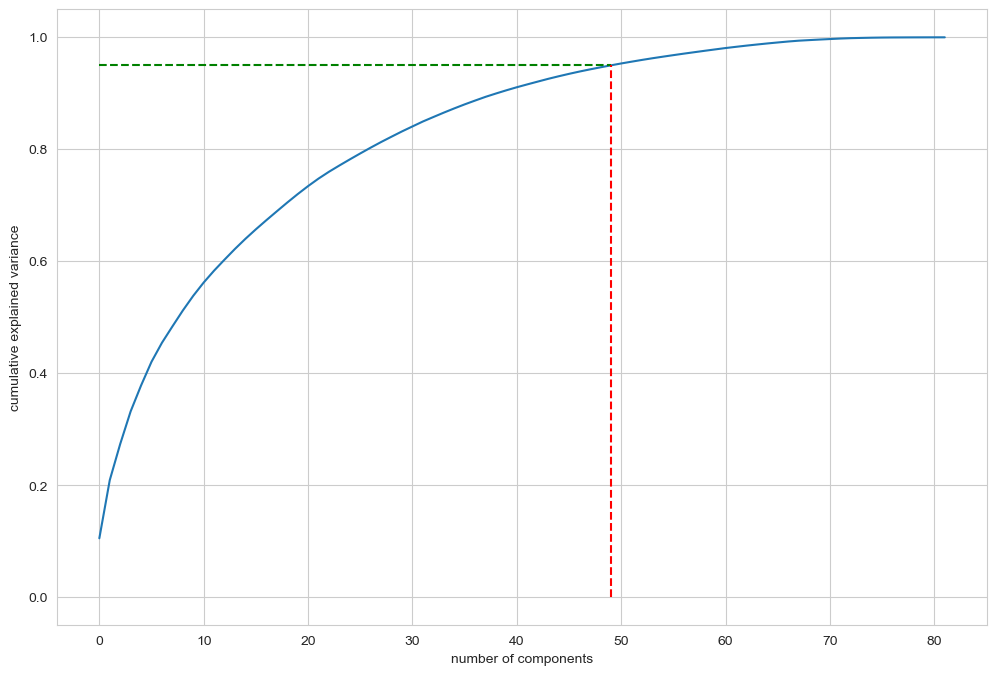

In [174]:
%matplotlib inline
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
plt.plot(var_cumu)
plt.hlines(y=0.95, xmax=49, xmin=0, colors="g", linestyles="--")
plt.vlines(x=49, ymax=0.95, ymin=0, colors="r", linestyles="--")  ##Optimal number of features-> 49, explains 95% variance
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [175]:
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
pca_final = IncrementalPCA(n_components=49)  ##Incremental PCA using 49 components
df_train_pca = pca_final.fit_transform(X_res)

In [176]:
df_train_pca.shape

(38522, 49)

In [177]:
corrmat = np.corrcoef(df_train_pca.transpose())  ##Correlation matrix
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

<Axes: >

In [178]:
df_test_pca = pca_final.transform(X_test)  #transform test set
df_test_pca.shape

(8986, 49)

In [179]:
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test

In [180]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()   ##No hyperparameter tuning and class is balanced using SMOTE
model_pca = learner_pca.fit(df_train_pca, y_res)

In [181]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [182]:
y_res_pred= pred_probs_train[:,1]   ##Getting churn probability values(1)
y_res_pred

array([0.01585347, 0.01047932, 0.07625801, ..., 0.95090102, 0.94417026,
       0.51755815], shape=(38522,))

In [183]:
y_res_pred_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_pred})
y_res_pred_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.015853       0
1      0    0.010479       1
2      0    0.076258       2
3      1    0.737657       3
4      0    0.002447       4

In [184]:
y_res_pred_final['predicted'] = y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.015853       0          0
1      0    0.010479       1          0
2      0    0.076258       2          0
3      1    0.737657       3          1
4      0    0.002447       4          0

In [185]:
confusion = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.predicted,'Logistic Regression (with PCA)')

Model: Logistic Regression (with PCA)
Accuracy: 0.8442
Precision: 0.8299
Recall: 0.8659
F1 Score: 0.8475
ROC AUC: 0.8442
Confusion Matrix:
[[15842  3419]
 [ 2583 16678]]




In [186]:
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.predicted))

0.8441929287160583


In [187]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC_AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [188]:
fpr, tpr, thresholds = metrics.roc_curve( y_res_pred_final.Churn, y_res_pred_final.Churn_Prob, drop_intermediate = False )

In [189]:
draw_roc(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

In [190]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_pred_final[i]= y_res_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.015853       0          0    1    0    0    0    0    0    0   
1      0    0.010479       1          0    1    0    0    0    0    0    0   
2      0    0.076258       2          0    1    0    0    0    0    0    0   
3      1    0.737657       3          1    1    1    1    1    1    1    1   
4      0    0.002447       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0

In [191]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.707180  0.971808  0.442552
0.2   0.2  0.767276  0.950210  0.584341
0.3   0.3  0.803723  0.926847  0.680598
0.4   0.4  0.828306  0.897928  0.758683
0.5   0.5  0.844193  0.865895  0.822491
0.6   0.6  0.848191  0.821089  0.875292
0.7   0.7  0.833887  0.752557  0.915217
0.8   0.8  0.785447  0.618971  0.951924
0.9   0.9  0.644515  0.305799  0.983230


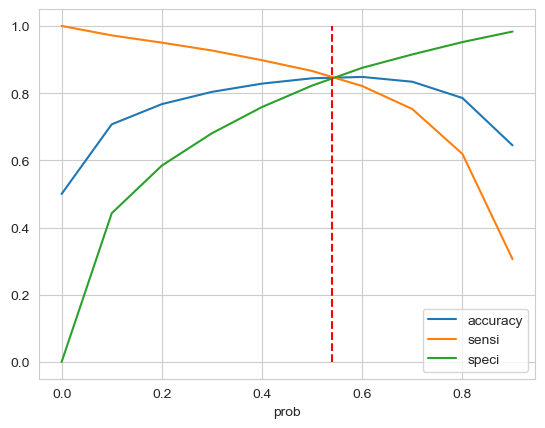

In [192]:
%matplotlib inline
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [193]:
y_res_pred_final['final_predicted'] = y_res_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_res_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.015853       0          0    1    0    0    0    0    0    0   
1      0    0.010479       1          0    1    0    0    0    0    0    0   
2      0    0.076258       2          0    1    0    0    0    0    0    0   
3      1    0.737657       3          1    1    1    1    1    1    1    1   
4      0    0.002447       4          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    0    0                1  
4    0    0    0                0

In [194]:
confusion_train_opt = metrics.confusion_matrix(y_res_pred_final.Churn, y_res_pred_final.final_predicted)
print_model_metrics(y_res_pred_final.Churn, y_res_pred_final.final_predicted,'Logistic Regression (with PCA)')

Model: Logistic Regression (with PCA)
Accuracy: 0.8461
Precision: 0.8448
Recall: 0.8481
F1 Score: 0.8464
ROC AUC: 0.8461
Confusion Matrix:
[[16259  3002]
 [ 2925 16336]]




In [195]:
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off)---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Logistic Regression Model with PCA):')
print(metrics.accuracy_score(y_res_pred_final.Churn, y_res_pred_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_pred_final.Churn, y_res_pred_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_opt))
print("******************************************************************")
print('ROC of Train Set: (Logistic Regression Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)))

**Evaluation Metrics: Train Set (Optimal Cut-off)---[using PCA for feature selection]**
******************************************************************
Accuracy of Train Set: (Logistic Regression Model with PCA):
0.8461398681273039
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.85      0.84      0.85     19261
     Churned       0.84      0.85      0.85     19261

    accuracy                           0.85     38522
   macro avg       0.85      0.85      0.85     38522
weighted avg       0.85      0.85      0.85     38522

******************************************************************
Sensitivity/Recall: 0.8481
Specificity: 0.8441
Precision: 0.8448
Negative Predictive Value: 0.8475
F1 Score: 0.8464
******************************************************************
ROC of Train Set: (Logistic Regression Model with PCA):
0.912


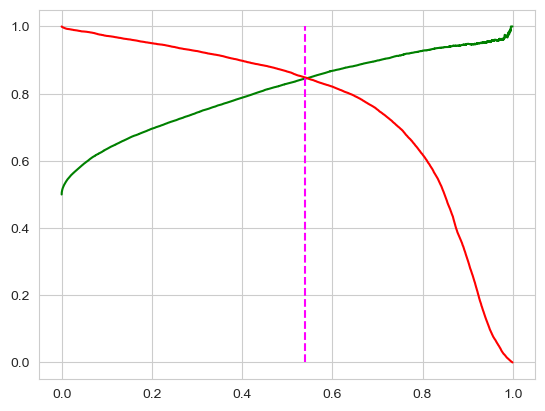

In [196]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_res_pred_final.Churn, y_res_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")  ##Precision: green-line
plt.plot(thresholds, r[:-1], "r-")  ##Recall: red-line
plt.vlines(x=0.54, ymax=1, ymin=0, colors='magenta', linestyles="--")
plt.show()

In [197]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [198]:
y_test_pred= pred_probs_test[:,1]   ##Getting churn probability values(1)
y_test_pred

array([4.06842975e-01, 3.35377511e-05, 5.09857608e-01, ...,
       1.63883502e-01, 2.33761787e-02, 2.78441332e-01], shape=(8986,))

In [199]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.406843   73764
1      0    0.000034   18280
2      0    0.509858   43793
3      0    0.171900   69530
4      0    0.026904   71555

In [200]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)  ##optimal cut-off is 0.54
y_test_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.406843   73764          0
1      0    0.000034   18280          0
2      0    0.509858   43793          0
3      0    0.171900   69530          0
4      0    0.026904   71555          0

In [201]:
confusion_test_opt = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print_model_metrics(y_test_pred_final.Churn, y_test_pred_final.predicted, 'Logistic Regression (with PCA)')

Model: Logistic Regression (with PCA)
Accuracy: 0.8418
Precision: 0.3157
Recall: 0.7940
F1 Score: 0.4518
ROC AUC: 0.8200
Confusion Matrix:
[[6978 1270]
 [ 152  586]]




In [202]:
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Logistic Regression Model with PCA):')
accuracy_score_pca_no_hyp = metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(accuracy_score_pca_no_hyp)
print("******************************************************************")

from sklearn.metrics import classification_report
class_rep_pc_no_hyp = classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted,\
                                         target_names=['Not Churned','Churned'])
print(class_rep_pc_no_hyp)  # target_names=target_names
print("******************************************************************")

confusion_test_opt_pca_no_hyp = confusion_test_opt
print(other_metrics_logistic_model(confusion_test_opt_pca_no_hyp))
print("******************************************************************")
print('ROC of Test Set: (Logistic Regression Model with PCA):')
auc_roc_pca_no_hyp = metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)
print("{:2.3}".format(auc_roc_pca_no_hyp))

**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**
******************************************************************
Accuracy of Test Set: (Logistic Regression Model with PCA):
0.8417538393055864
******************************************************************
              precision    recall  f1-score   support

 Not Churned       0.98      0.85      0.91      8248
     Churned       0.32      0.79      0.45       738

    accuracy                           0.84      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.92      0.84      0.87      8986

******************************************************************
Sensitivity/Recall: 0.7940
Specificity: 0.8460
Precision: 0.3157
Negative Predictive Value: 0.9787
F1 Score: 0.4518
******************************************************************
ROC of Test Set: (Logistic Regression Model with PCA):
0.895


In [203]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# First, ensure X and y have the same number of samples
# This is a critical step - you need to make sure df_train_pca and y_res have the same length
# Option 1: If you're using resampling techniques (like SMOTE), apply them correctly
# Option 2: If one dataset has more samples, align them

# Assuming you have df_train_pca and y_res already defined but with different lengths
# Here's how you might align them (choose the appropriate method for your case):

# Method 1: Use only the common indices
common_indices = min(len(df_train_pca), len(y_res))
df_train_pca_aligned = df_train_pca[:common_indices]
y_res_aligned = y_res[:common_indices]

# Method 2: If y_res was created from df_train_pca but got modified:
# Recreate y_res from the same source as df_train_pca

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = np.logspace(-3, 3, 10)   # Lambda = 1/c_values (Here, c_values range from 0.001 to 1000)

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)

# Use the aligned datasets
grid_result = grid_search.fit(X=df_train_pca_aligned, y=y_res_aligned)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.843624 using {'C': np.float64(0.021544346900318832), 'penalty': 'l2', 'solver': 'lbfgs'}
0.839466 (0.005768) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'newton-cg'}
0.839465 (0.005760) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'lbfgs'}
0.838160 (0.005748) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'liblinear'}
0.839474 (0.005738) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'sag'}
0.842478 (0.005727) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'newton-cg'}
0.842435 (0.005727) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'lbfgs'}
0.842251 (0.005775) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'liblinear'}
0.842444 (0.005742) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'sag'}
0.843581 (0.005891) with: {'C': np.float64(0.021544346900318832), 'penalty': 'l2', 'solver': 'newton-cg'}
0.843624 (0.005927) with: {'C

In [204]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# First, ensure X and y have the same number of samples
# This is a critical step - you need to make sure df_train_pca and y_res have the same length
# Option 1: If you're using resampling techniques (like SMOTE), apply them correctly
# Option 2: If one dataset has more samples, align them

# Assuming you have df_train_pca and y_res already defined but with different lengths
# Here's how you might align them (choose the appropriate method for your case):

# Method 1: Use only the common indices
common_indices = min(len(df_train_pca), len(y_res))
df_train_pca_aligned = df_train_pca[:common_indices]
y_res_aligned = y_res[:common_indices]

# Method 2: If y_res was created from df_train_pca but got modified:
# Recreate y_res from the same source as df_train_pca

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = np.logspace(-3, 3, 10)   # Lambda = 1/c_values (Here, c_values range from 0.001 to 1000)

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)

# Use the aligned datasets
grid_result = grid_search.fit(X=df_train_pca_aligned, y=y_res_aligned)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.843624 using {'C': np.float64(0.021544346900318832), 'penalty': 'l2', 'solver': 'lbfgs'}
0.839466 (0.005768) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'newton-cg'}
0.839465 (0.005760) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'lbfgs'}
0.838160 (0.005748) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'liblinear'}
0.839474 (0.005738) with: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'sag'}
0.842478 (0.005727) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'newton-cg'}
0.842435 (0.005727) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'lbfgs'}
0.842251 (0.005775) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'liblinear'}
0.842426 (0.005748) with: {'C': np.float64(0.004641588833612777), 'penalty': 'l2', 'solver': 'sag'}
0.843581 (0.005891) with: {'C': np.float64(0.021544346900318832), 'penalty': 'l2', 'solver': 'newton-cg'}
0.843624 (0.005927) with: {'C

In [205]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn import metrics
from imblearn.combine import SMOTETomek

# Define helper functions
def printbold(text):
    print('\033[1m' + text + '\033[0m')

def other_metrics_logistic_model(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    return pd.DataFrame({
        'Metric': ['Sensitivity', 'Specificity', 'Precision', 'F1 Score'],
        'Value': [round(sensitivity, 4), round(specificity, 4), round(precision, 4), round(f1, 4)]
    })

# Assuming you have your data loaded
# Replace these with your actual data loading code
# For example:
# df_train = pd.read_csv('train_data.csv')
# df_test = pd.read_csv('test_data.csv')
# X_train = df_train.drop('target', axis=1)
# y_train = df_train['target']
# X_test = df_test.drop('target', axis=1)
# y_test = df_test['target']

# For demonstration, creating dummy data
np.random.seed(42)
X_train = pd.DataFrame(np.random.rand(100, 10))
y_train = pd.Series(np.random.randint(0, 2, 100))
X_test = pd.DataFrame(np.random.rand(50, 10))
y_test = pd.Series(np.random.randint(0, 2, 50))

# Apply PCA
pca = PCA(n_components=5)
df_train_pca = pca.fit_transform(X_train)
df_test_pca = pca.transform(X_test)

# Apply SMOTETomek for handling class imbalance
smote_tomek = SMOTETomek(random_state=42)
df_train_pca_res, y_res = smote_tomek.fit_resample(df_train_pca, y_train)

# Train baseline model (before SMOTE)
base_model = LogisticRegression(random_state=42)
base_model.fit(df_train_pca, y_train)

# Baseline model predictions
base_train_pred = base_model.predict(df_train_pca)
base_test_pred = base_model.predict(df_test_pca)

# Classification reports for baseline model
classification_report_base_mod_train = classification_report(y_train, base_train_pred, target_names=['Not Churned', 'Churned'])
classification_report_base_mod_test = classification_report(y_test, base_test_pred, target_names=['Not Churned', 'Churned'])

# Define threshold for classification
THRESHOLD = 0.5

# Train Lasso model with balanced data
lassoclf = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
lassoclf.fit(df_train_pca_res, y_res)

printbold("**For Logistic Regression Model (with PCA and Hyperparameter Tuning):**")
print('L2 Regularisation(lasso)    Optimal Threshold:', THRESHOLD)
print("*"*70)

##Baseline Model (Train Data Performance: Before SMOTE):
printbold('**Baseline Model (Class Imbalance Dataset: Before SMOTE):**')
print("For Train Set (Class Imbalance Dataset):\n", classification_report_base_mod_train)
print("-"*70)
print("For Test Set (Prediction: Class Imbalance Dataset):\n", classification_report_base_mod_test)
print("*"*70)

# predict using train data (After SMOTE: Oversampled Minority Class)
train_pred_prob = lassoclf.predict_proba(df_train_pca_res)  # Using df_train_pca_res for consistency
train_pred_prob_val = pd.DataFrame((train_pred_prob)[:,1]).values.reshape(-1)
train_pred = np.where(train_pred_prob[:,1] > THRESHOLD, 1, 0)

printbold("**For Training Set (Class Balanced: After SMOTETomek:):**")
print("ROC_AUC_Score:", round(roc_auc_score(y_res, train_pred_prob_val),4))
print("Accuracy:", round(accuracy_score(y_res, train_pred),4))
print(classification_report(y_res, train_pred, target_names=['Not Churned','Churned']))
print("-"*70)
confusion_train_log_pca = metrics.confusion_matrix(y_res, train_pred)
print(other_metrics_logistic_model(confusion_train_log_pca))
    
# predict using test data
print("*"*70)
test_pred_prob = lassoclf.predict_proba(df_test_pca)  # Using df_test_pca consistently
test_pred_prob_val = pd.DataFrame((test_pred_prob)[:,1]).values.reshape(-1)
test_pred = np.where(test_pred_prob[:,1] > THRESHOLD, 1, 0)
printbold("**For Test Set (Prediction):**")
print("ROC_AUC_Score:", round(roc_auc_score(y_test, test_pred_prob_val),4))
print("Accuracy:", round(accuracy_score(y_test, test_pred),4))
print(classification_report(y_test, test_pred, target_names=['Not Churned','Churned']))
print("-"*70)

confusion_test_log_pca = metrics.confusion_matrix(y_test, test_pred)
print(other_metrics_logistic_model(confusion_test_log_pca))
print("*"*70)

**For Logistic Regression Model (with PCA and Hyperparameter Tuning):**
L2 Regularisation(lasso)    Optimal Threshold: 0.5
**********************************************************************
**Baseline Model (Class Imbalance Dataset: Before SMOTE):**
For Train Set (Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.57      0.67      0.62        52
     Churned       0.56      0.46      0.51        48

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.56       100
weighted avg       0.57      0.57      0.56       100

----------------------------------------------------------------------
For Test Set (Prediction: Class Imbalance Dataset):
               precision    recall  f1-score   support

 Not Churned       0.35      0.36      0.35        25
     Churned       0.33      0.32      0.33        25

    accuracy                           0.34        50
   macro avg       0.34      0.34  

In [206]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [207]:
# There are two ways to fix this error:

# Option 1: Resize y_res to match df_train_pca (84 samples)
y_res = y_res[:84]  # Slice y_res to match the 84 samples in df_train_pca

# OR

# Option 2: Resize df_train_pca to match y_res (100 samples)
# If df_train_pca originally had 100 samples but was incorrectly sliced:
# df_train_pca = original_df_train_pca  # Use the original 100 samples

# Then fit the model with matching dimensions
rfc.fit(df_train_pca, y_res)

ValueError: Found input variables with inconsistent numbers of samples: [100, 84]

In [ ]:
rf_predictions = rfc.predict(df_test_pca)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,rf_predictions,target_names=['Not Churned','Churned']))


In [ ]:
print(accuracy_score(y_test,rf_predictions))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(4, 40, 4)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Import matplotlib.pyplot library first
import matplotlib.pyplot as plt

# Now the plotting code will work
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("max_depth")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 600, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("min_samples_leaf")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 600, 100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)


In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("n_estimators")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(0, 800, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test f1 macro")
#plt.vlines(x=24, ymax=1, ymin=0.825, colors='magenta', linestyles="--")
#plt.vlines(x=28, ymax=1, ymin=0.825, colors='red', linestyles="--")
plt.xlabel("max_samples_split")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

In [ ]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

##Note: Copy these variables for future models using pca
X_train_pca = df_train_pca
y_train_pca = y_res
X_test_pca = df_test_pca
y_test_pca = y_test


# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X=df_train_pca, y=y_res)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_leaf_nodes': range(0, 100, 13)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1_macro", return_train_score=True)
rf.fit(df_train_pca,y_res)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting f1 score with 'max_leaf_nodes'
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_leaf_nodes"], 
         scores["mean_train_score"], 
         label="training f1 macro")
plt.plot(scores["param_max_leaf_nodes"], 
         scores["mean_test_score"], 
         label="test f1 macro")
plt.xlabel("max_leaf_nodes")
plt.ylabel("f1 macro")
plt.legend()
plt.show()

In [ ]:
my_df= pd.DataFrame()
my_df['mean_train_score']=rf.cv_results_['mean_train_score'] 
my_df['mean_test_score']=rf.cv_results_['mean_test_score'] 
my_df['diff'] = my_df['mean_train_score'] - my_df['mean_test_score']
#my_df.sort_values(by='diff', ascending= False)
my_df

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [7],  
    'max_depth': [24,25],
    'min_samples_leaf': [100, 200, 300],
    'n_estimators': [300],
    'min_samples_split': [250,350,450],
    'max_leaf_nodes': [25,27]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= 'f1_macro',  ##scoring= 'f1_macro'
                          cv = 5, n_jobs = -1,verbose = 1)

In [ ]:
grid_search.fit(df_train_pca, y_res)

In [ ]:
print('We can get f1_macro of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
rf_final = RandomForestClassifier(bootstrap=True,
                             max_depth=24,
                             max_features=7,
                             max_leaf_nodes=27,
                             min_samples_leaf=100, 
                             min_samples_split=250,
                             n_estimators=300)

In [ ]:
rf_final.fit(df_train_pca, y_res)

In [ ]:
predrf_probs_train = rf_final.predict_proba(df_train_pca)

In [ ]:
y_res_predrf = predrf_probs_train[:,1]##Getting churn probability values(1)

In [ ]:
y_res_predrf_final = pd.DataFrame({'Churn':y_res.values, 'Churn_Prob':y_res_predrf})
y_res_predrf_final['CustID'] = y_res.index    ##CustID is the record index ID
y_res_predrf_final.head()

In [ ]:
y_res_predrf_final['predicted'] = y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_res_predrf_final.head()

In [ ]:
# First, define the print_model_metrics function
def print_model_metrics(y_true, y_pred, model_name):
    """
    Function to print classification metrics
    
    Parameters:
    y_true: actual values
    y_pred: predicted values
    model_name: name of the model for display
    """
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {metrics.precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {metrics.recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {metrics.f1_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(metrics.classification_report(y_true, y_pred))
    
# Now use the function
confusion = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.predicted)
print_model_metrics(y_res_predrf_final.Churn, y_res_predrf_final.predicted, 'Random Forest (with PCA)')

In [ ]:
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.predicted))

In [ ]:
# First, define the draw_roc function
def draw_roc(y_true, y_pred_prob):
    """
    Function to draw ROC curve
    
    Parameters:
    y_true: True labels
    y_pred_prob: Predicted probabilities
    """
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Now use the function
fpr_rf, tp_rf, thresholds_rf = metrics.roc_curve(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob, drop_intermediate=False)
# ROC curve for train data
draw_roc(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_res_predrf_final[i]= y_res_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_res_predrf_final.head()

In [ ]:
cutoffrf_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoffrf_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoffrf_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
cutoffrf_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.45, ymax=1, ymin=0, colors="r", linestyles="-")
plt.show()

In [ ]:
y_res_predrf_final['final_predicted'] = y_res_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_res_predrf_final.head()

In [ ]:
confusion_train_optrf = metrics.confusion_matrix(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted)
print_model_metrics(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted,'Random Forest (with PCA)')

In [ ]:
printbold('**Evaluation Metrics: Train Set (Optimal Cut-off) ---[using PCA for feature selection]**')
print("******************************************************************")
print('Accuracy of Train Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_res_predrf_final.Churn, y_res_predrf_final.final_predicted, target_names=['Not Churned','Churned']))
print("******************************************************************")

print(other_metrics_logistic_model(confusion_train_optrf))
print("******************************************************************")
print('ROC of Train Set: (Random Forest Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_res_predrf_final.Churn, y_res_predrf_final.Churn_Prob)))

In [ ]:
pred_probs_testrf = rf_final.predict_proba(df_test_pca)

In [ ]:
y_test_predrf = pred_probs_testrf[:,1]   ##Getting churn probability values(1)
y_test_pred = y_test_predrf  # Define y_test_pred using the value from y_test_predrf

# Alternatively, you could just use y_test_predrf directly instead of creating a new variable
# Or if you meant to do something else with y_test_pred, you need to define it properly

In [ ]:
y_test_predrf_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['CustID'] = y_test.index    ##CustID is the record index ID
y_test_predrf_final.head()

In [ ]:
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)  ##optimal cut-off is 0.45
y_test_predrf_final.head()

In [ ]:
confusion_test_optrf = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
print_model_metrics(y_test_predrf_final.Churn, y_test_predrf_final.predicted, 'Random Forest (with PCA)')


In [ ]:
printbold('**Evaluation Metrics: Test Set (Optimal Cut-off)---[using PCA for Feature Selection]**')
print("******************************************************************")
print('Accuracy of Test Set: (Random Forest Model with PCA):')
print(metrics.accuracy_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print("******************************************************************")

from sklearn.metrics import classification_report
print(classification_report(y_test_predrf_final.Churn, y_test_predrf_final.predicted, target_names=['Not Churned','Churned']))  # target_names=target_names
print("******************************************************************")

print(other_metrics_logistic_model(confusion_test_optrf))
print("******************************************************************")
print('ROC of Test Set: (Random Forest Model with PCA):')
print("{:2.3}".format(metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.Churn_Prob)))

In [ ]:
# First, install the xgboost package
!pip install xgboost

# Then import it
import xgboost as xgb

# You may need to restart your kernel after installation
# for the changes to take effect

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)